In [93]:
import numpy as np
from numpy import array, newaxis, expand_dims
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf as pdflib
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import statistics

In [4]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

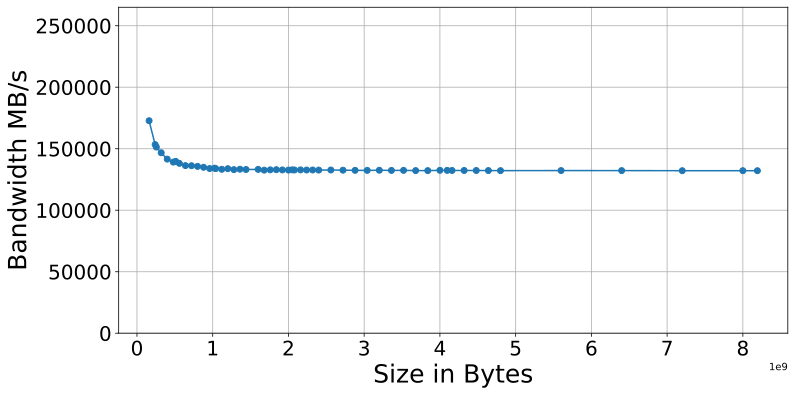

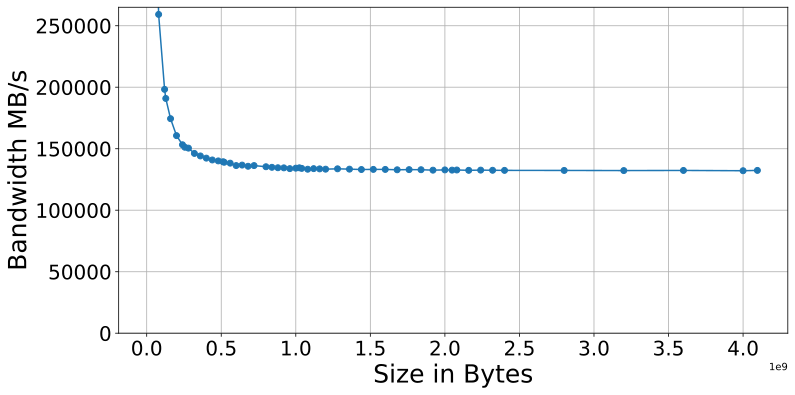

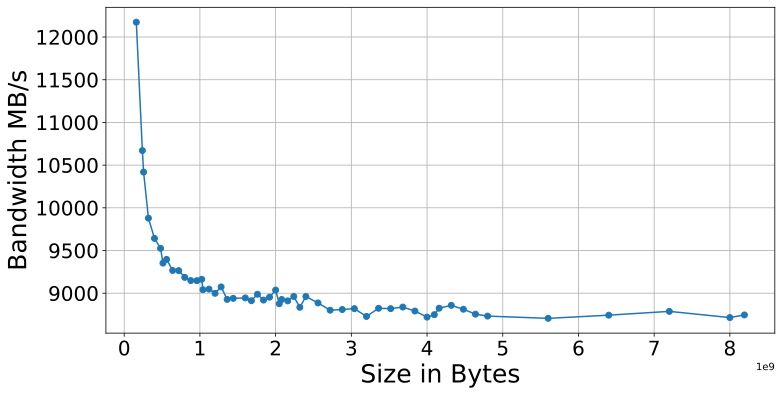

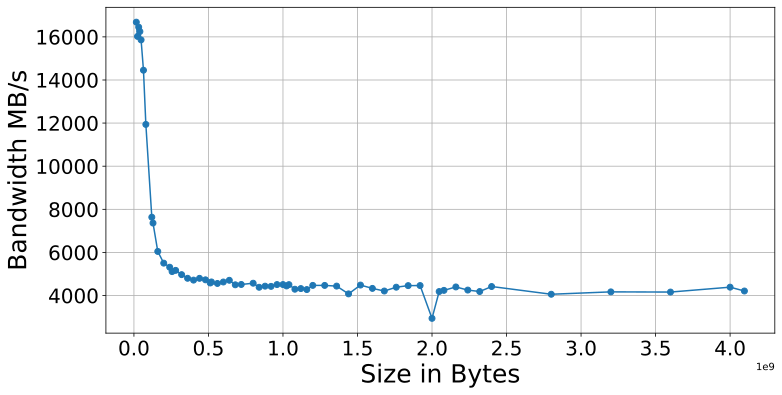

In [5]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")
skylake_res = skylake_res[skylake_res["Size"] >= 16000000]
pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_double_precision.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_single_precision.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
ax.set_ylim(0, 265000)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()



pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_double_precision.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
# ax.set_ylim(0, 265000)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_single_precision.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(True)
# ax.set_ylim(0, 265000)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()



# scal_res = skylake_res[(skylake_res["Operation"] == "Scale") & (skylake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# add_res = skylake_res[(skylake_res["Operation"] == "Add") & (skylake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# triad_res = skylake_res[(skylake_res["Operation"] == "Triad") & (skylake_res["DataType"] == 8].sort_values(by="Size").reset_index()


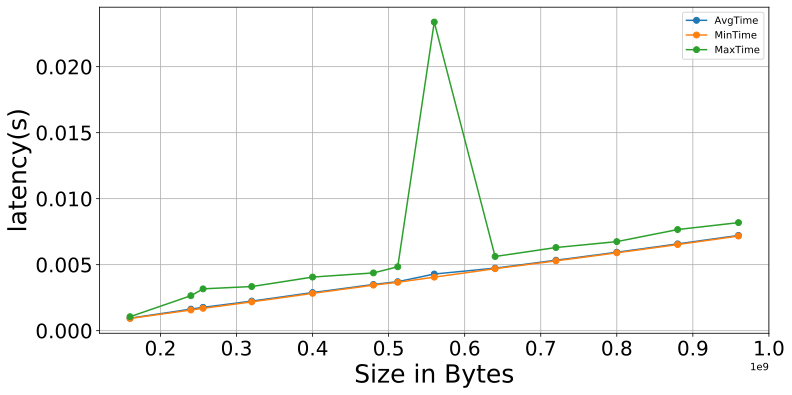

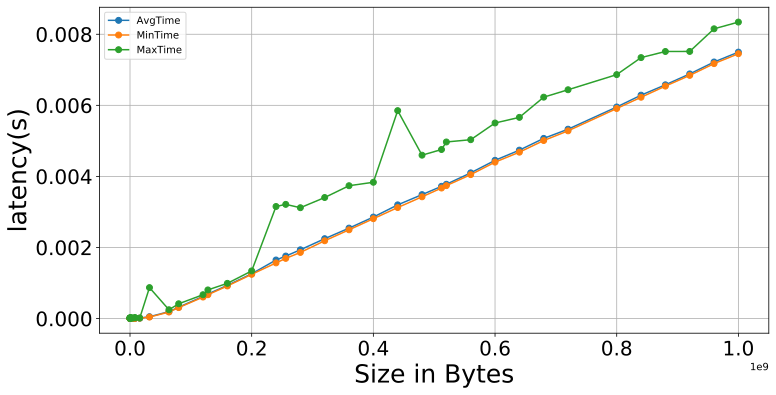

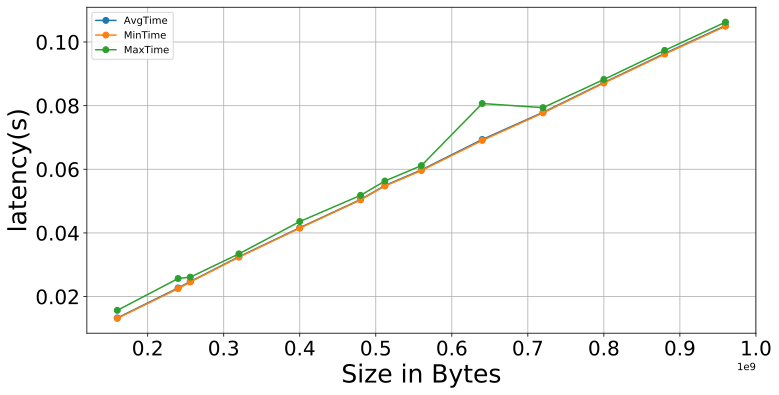

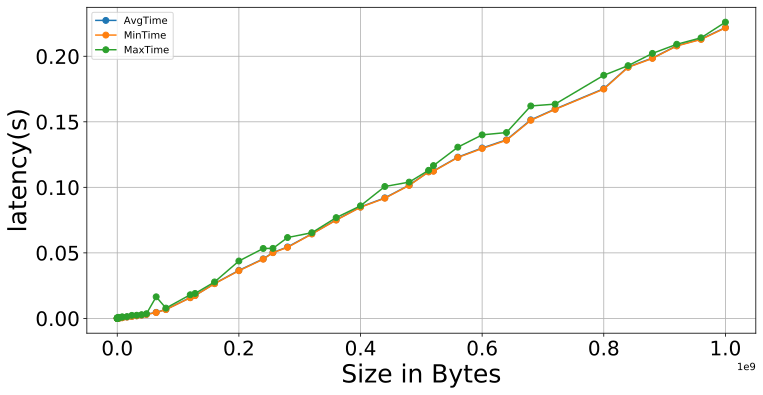

In [53]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")
pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_double_precision_time.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
copy_res = copy_res[copy_res["Size"] <= 1000000000]
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/skylake_mpi_copy_single_precision_time.pdf")
copy_res = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
copy_res = copy_res[copy_res["Size"] <= 1000000000]
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_double_precision_time.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res[random_copy_res["Size"] <= 1000000000]
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

pdf = pdflib.PdfPages("figures/stream/skylake_mpi_random_copy_single_precision_time.pdf")
random_copy_res = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
random_copy_res = random_copy_res[random_copy_res["Size"] <= 1000000000]
random_copy_res = random_copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = random_copy_res.plot(kind="line", ax=ax1, x="Size", y=["AvgTime", "MinTime", "MaxTime"], style="-o", figsize=(12,6), fontsize=20)
ax.set_ylabel("latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

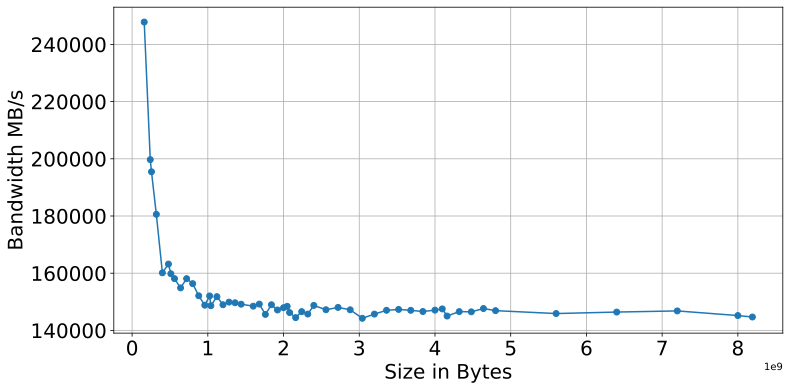

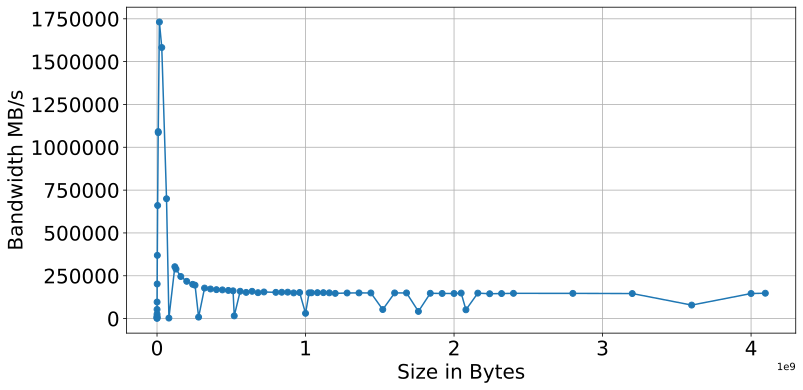

In [54]:
cascade_lake_res = pd.read_csv("../../STREAM/Results/CASCADE_LAKE.csv")
pdf = pdflib.PdfPages("figures/stream/cascade_lake_mpi_copy_double_precision.pdf")
copy_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Copy") & (cascade_lake_res["DataType"] == 8)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=20)
ax.set_xlabel("Size in Bytes", fontsize=20)
ax.grid(True)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/stream/cascade_lake_mpi_copy_single_precision.pdf")
copy_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Copy") & (cascade_lake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
copy_res = copy_res.groupby("Size").mean().reset_index()

fig1,ax1 = plt.subplots()
ax = copy_res.plot(kind="line", ax=ax1, x="Size", y="Bandwidth_MBS", style="-o", legend=False, figsize=(12,6), fontsize=20)
ax.set_ylabel("Bandwidth MB/s", fontsize=20)
ax.set_xlabel("Size in Bytes", fontsize=20)
ax.grid(True)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


# scal_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Scale") & (cascade_lake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# add_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Add") & (cascade_lake_res["DataType"] == 8].sort_values(by="Size").reset_index()
# triad_res = cascade_lake_res[(cascade_lake_res["Operation"] == "Triad") & (cascade_lake_res["DataType"] == 8].sort_values(by="Size").reset_index()


# OSU Benchmark

# Cascade Lake

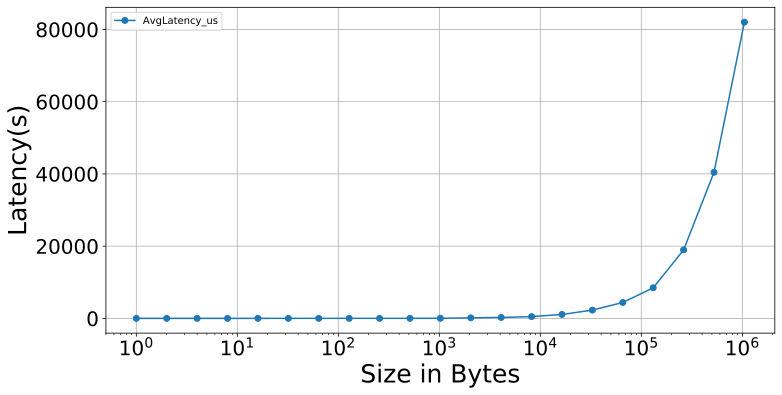

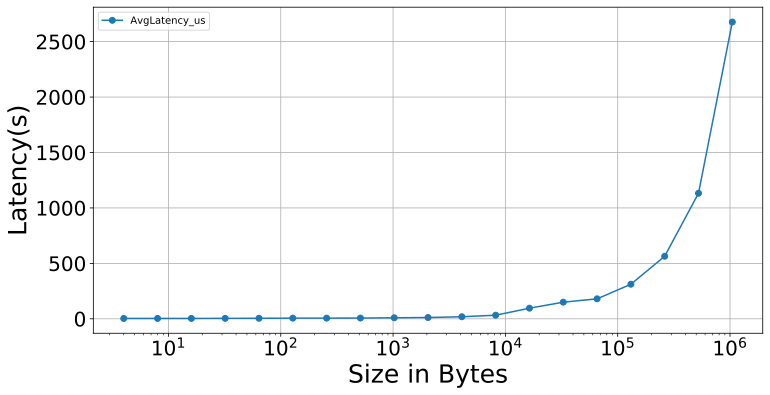

In [55]:
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/cascade_allgatherv.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()

pdf = pdflib.PdfPages("figures/osu/cascade_lake_mpi_allgatherv.pdf")
fig1,ax1 = plt.subplots()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/osu/cascade_lake_mpi_allreduce.pdf")
fig1,ax1 = plt.subplots()
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/cascade_allreduce.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

# Skylake

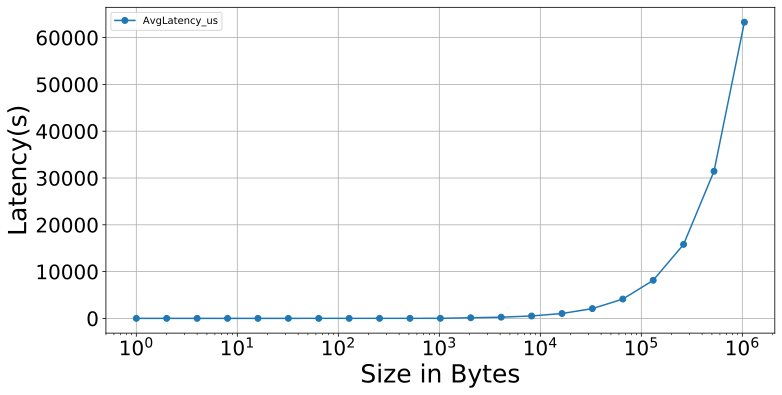

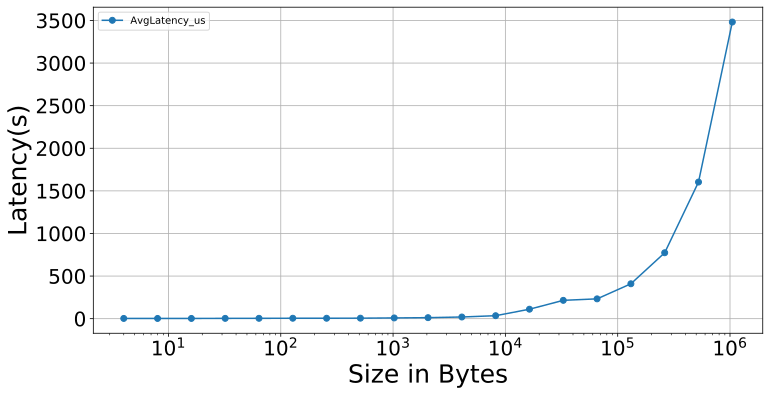

In [56]:
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/skylake_allgatherv.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()

pdf = pdflib.PdfPages("figures/osu/skylake_mpi_allgatherv.pdf")
fig1,ax1 = plt.subplots()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()


pdf = pdflib.PdfPages("figures/osu/skylake_mpi_allreduce.pdf")
fig1,ax1 = plt.subplots()
seq_bandwidth = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/skylake_allreduce.csv")
seq_bandwidth = seq_bandwidth.groupby("Size").mean().reset_index()
ax = seq_bandwidth.plot(kind="line", ax=ax1, x="Size", y="AvgLatency_us", figsize=(12,6), fontsize=20, style="-o", logx=True)
ax.set_ylabel("Latency(s)", fontsize=25)
ax.set_xlabel("Size in Bytes", fontsize=25)
ax.grid(True)
# ax.set_ylim(0, 265000)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
pdf.savefig(fig1, bbox_inches = 'tight')
pdf.close()

In [57]:
seq_bandwidth

,Size,AvgLatency_us
0,4,2.87
1,8,2.69
2,16,2.72
3,32,3.68
4,64,4.29
5,128,5.09
6,256,5.02
7,512,5.92
8,1024,8.73
9,2048,11.91


# FMA FLOPS

# MPI

42.83539999999999
85.66865000000001


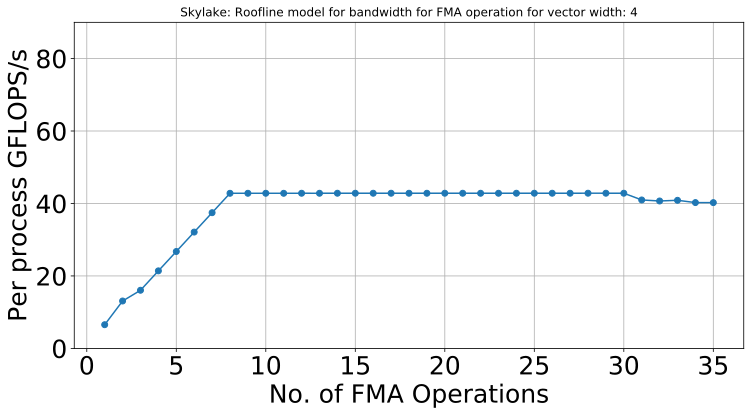

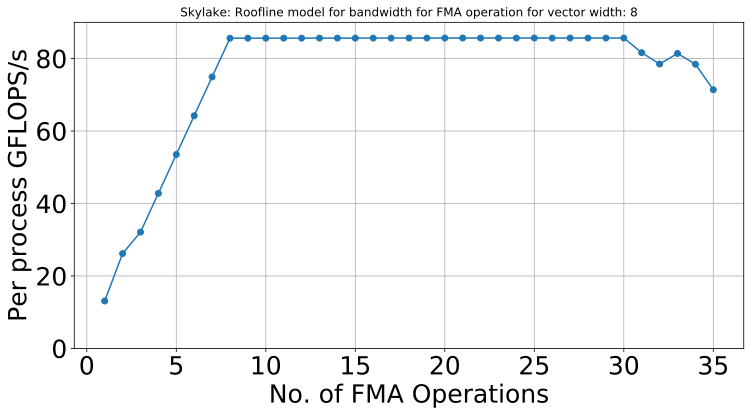

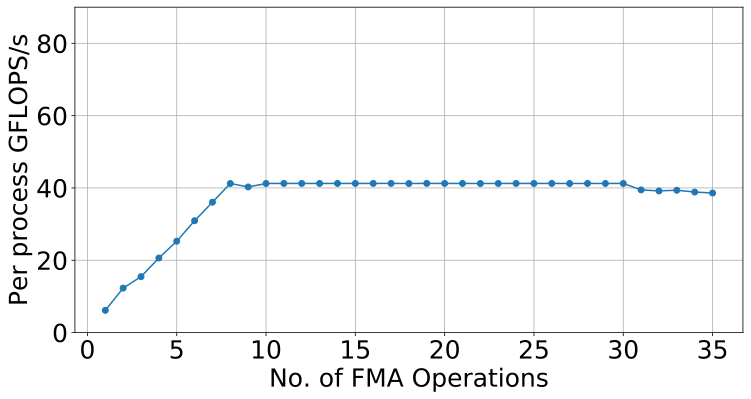

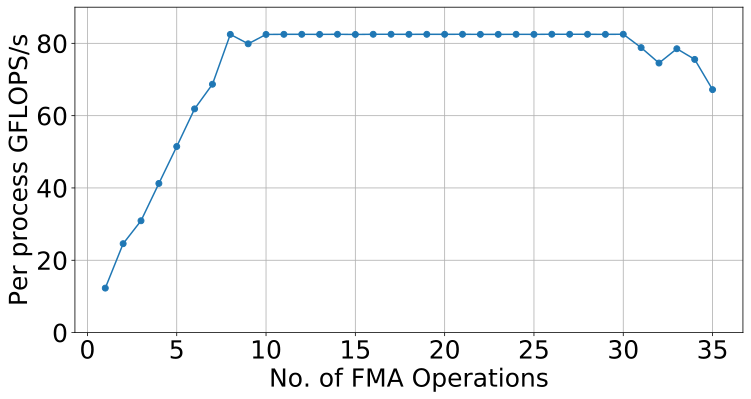

In [58]:
fmaRes = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/FMA_ON_SKYLAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/skylake_mpi_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig1,ax1 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax1, x="ChainedFMAs", legend=False, y="AvgGFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,90)
    ax.set_ylabel("Per process GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    ax.set_title("Skylake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig1, bbox_inches = 'tight')
    pdf.close()
    print(max(vec_data["AvgGFLOPSPerSec"]))
    
fmaRes = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/FMA_ON_CASCADE_LAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/cascade_lake_mpi_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig2,ax2 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax2, x="ChainedFMAs", legend=False, y="AvgGFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,90)
    ax.set_ylabel("Per process GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
#     ax.set_title("Cascade Lake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig2, bbox_inches = 'tight')
    pdf.close()
    
    

# OpenMP

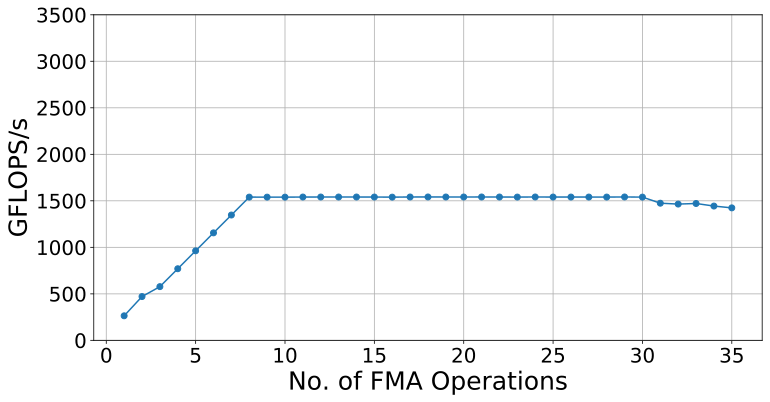

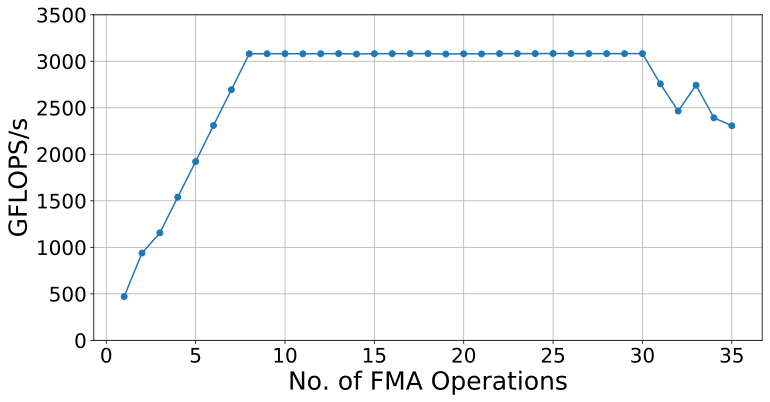

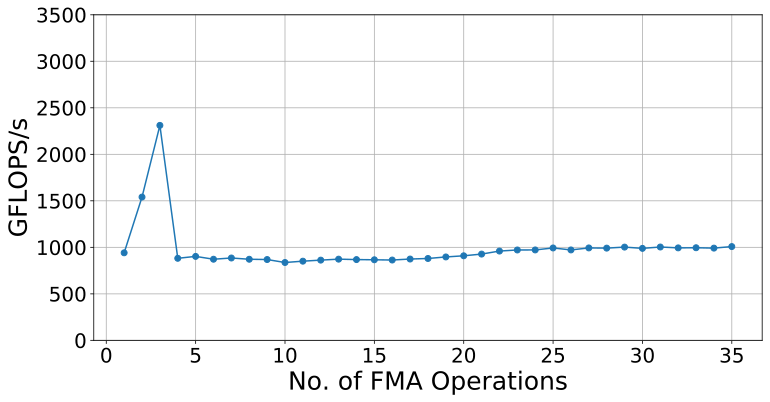

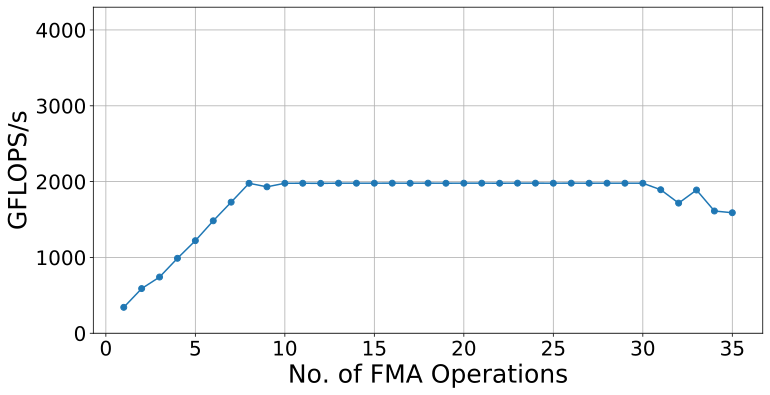

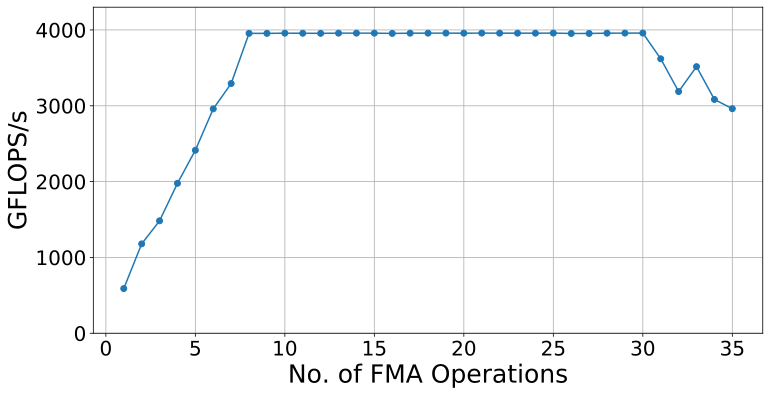

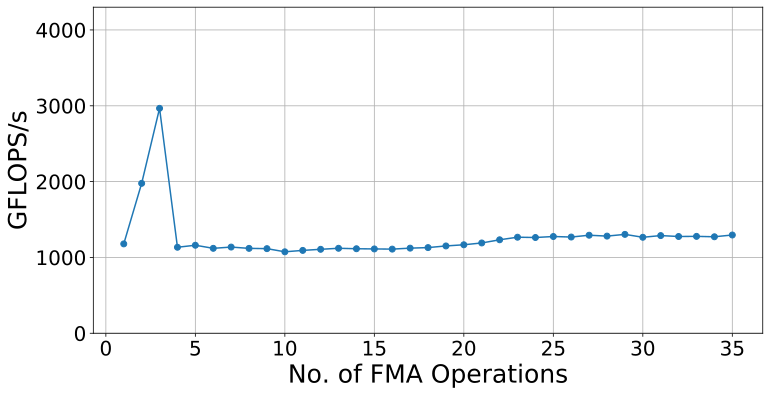

In [59]:
fmaRes = pd.read_csv("../../SpMVMicroBenchmark/omp/Results/FMA_ON_SKYLAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()

for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/skylake_omp_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig1,ax1 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", ax=ax1, style="-o", x="ChainedFMAs", legend=False, y="GFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,3500)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel("GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
#     ax.set_title("Skylake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    pdf.savefig(fig1, bbox_inches = 'tight')
    pdf.close()

fmaRes = pd.read_csv("../../SpMVMicroBenchmark/omp/Results/FMA_ON_CASCADE_LAKE.csv")
fmaRes = fmaRes.groupby(["ChainedFMAs", "VectorWidth"]).mean().reset_index()
for vec,vec_data in fmaRes.groupby("VectorWidth"):
    pdf = pdflib.PdfPages("figures/fma/cascade_lake_omp_fma_roofline_model_for_vec_" + str(vec) + ".pdf")
    fig2,ax2 = plt.subplots()
    vec_data = vec_data.sort_values(by="ChainedFMAs").reset_index(drop=True)
    ax = vec_data.plot(kind="line", style="-o", ax=ax2, x="ChainedFMAs", legend=False, y="GFLOPSPerSec", figsize=(12,6))
    ax.grid(True)
    ax.set_ylim(0,4300)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_ylabel("GFLOPS/s", fontsize=25)
    ax.set_xlabel("No. of FMA Operations", fontsize=25)
#     ax.set_title("Cascade Lake: Roofline model for bandwidth for FMA operation for vector width: " + str(vec))
    
    pdf.savefig(fig2, bbox_inches = 'tight')
    pdf.close()
    

# Build-Up SpMV Model

# Metrices

In [6]:
test_matrices = [
#     "delaunay_n20"
#     , "NACA0015"
#     , "belgium"
     "AS365"
#     , "roadNet-TX"
    , "road_central"
    , "NLR"
    , "hugetrace-00010"
#     , "nlpkkt200"
#     , "nlpkkt240"
#     , "nlpkkt160"
#     , "uk2002"
#     , "uk-2002"
    , "333SP"
    , "M6"
#     , "af_shell10" 
#     , "cage15" 
#     , "in-2004" 
#     , "kkt_power" 
    , "road_usa"
    
#     , "asia" 
#     , "aumikw1" 
#     , "com-lj" 
#     , "delaunay_n21" 
#     , "delaunay_n22" 
#     , "delaunay_n23" 
#     , "delaunay_n24" 
#     , "europe" 
#     , "germany" 
#     , "great-britain" 
#     , "hugebubbles-00000" 
#     , "hugebubbles-00010" 
#     , "hugebubbles-00020" 
#     , "hugetrace-00000" 
#     , "hugetrace-00020" 
#     , "hugetric-00000" 
#     , "hugetric-00020" 
#     , "italy" 
#     , "ldoor"
]

random_test_matrices = [
#     "delaunay_n20_random"
#     , "NACA0015_random"
#     , "belgium_random"
     "AS365_random"
    , "roadNet-TX_random"
    , "road_central_random"
    , "NLR_random"
    , "hugetrace-00010_random"
#     , "nlpkkt200_random"
#     , "nlpkkt240_random"
#     , "nlpkkt160_random"
    , "uk2002_random"
    , "uk-2002_random"
    , "333SP_random"
    , "M6_random"
#     , "af_shell10_random" 
#     , "cage15_random" 
#     , "in-2004_random" 
#     , "kkt_power_random" 
    , "road_usa_random"
    
#     , "asia_random" 
#     , "aumikw1_random" 
#     , "com-lj_random" 
#     , "delaunay_n21_random" 
#     , "delaunay_n22_random" 
#     , "delaunay_n23_random" 
#     , "delaunay_n24_random" 
#     , "europe_random" 
#     , "germany_random" 
#     , "great-britain_random" 
#     , "hugebubbles-00000_random" 
#     , "hugebubbles-00010_random" 
#     , "hugebubbles-00020_random" 
#     , "hugetrace-00000_random" 
#     , "hugetrace-00020_random" 
#     , "hugetric-00000_random" 
#     , "hugetric-00020_random" 
#     , "italy_random" 
#     , "ldoor_random"
]

random_to_org_map = {
    "delaunay_n20_random"        : "delaunay_n20"
    , "NACA0015_random"          : "NACA0015"
    , "belgium_random"           : "belgium"
    , "AS365_random"             : "AS365"
    , "roadNet-TX_random"        : "roadNet-TX"
    , "road_central_random"      : "road_central"
    , "NLR_random"               : "NLR"
    , "hugetrace-00010_random"   : "hugetrace-00010"
#     , "nlpkkt200_random"         : "nlpkkt200"
#     , "nlpkkt240_random"         : "nlpkkt240"
#     , "nlpkkt160_random"         : "nlpkkt160"
    , "uk2002_random"            : "uk2002"
    , "uk-2002_random"           : "uk-2002"
    , "333SP_random"             : "333SP"
    , "M6_random"                : "M6"
#     , "af_shell10_random"        : "af_shell10"
#     , "cage15_random"            : "cage15"
#     , "in-2004_random"           : "in-2004"
    , "kkt_power_random"         : "kkt_power"
    , "road_usa_random"          : "road_usa"
    
#     , "asia_random"              : "asia"
#     , "aumikw1_random"           : "aumikw1"
#     , "com-lj_random"            : "com-lj"
#     , "delaunay_n21_random"      : "delaunay_n21"
#     , "delaunay_n22_random"      : "delaunay_n22" 
#     , "delaunay_n23_random"      : "delaunay_n23"
#     , "delaunay_n24_random"      : "delaunay_n24"
#     , "europe_random"            : "europe"
#     , "germany_random"           : "germany"
#     , "great-britain_random"     : "great-britain"
#     , "hugebubbles-00000_random" : "hugebubbles-00000" 
#     , "hugebubbles-00010_random" : "hugebubbles-00010"
#     , "hugebubbles-00020_random" : "hugebubbles-00020"
#     , "hugetrace-00000_random"   : "hugetrace-00000"
#     , "hugetrace-00020_random"   : "hugetrace-00020"
#     , "hugetric-00000_random"    : "hugetric-00000"
#     , "hugetric-00020_random"    : "hugetric-00020"
#     , "italy_random"             : "italy"
#     , "ldoor_random"             : "ldoor"
}

# MPI Communication

,Size,Nodes,Process,PPN,Latency_us
0,1,4,12,3,1.69
1,1,5,13,3,2.27
2,1,6,14,3,1.64
3,1,7,15,3,0.59
4,1,8,16,2,2.80
...,...,...,...,...,...
100,1048576,4,12,3,265.44
101,1048576,5,13,3,255.75
102,1048576,6,14,3,265.20
103,1048576,7,15,3,265.04


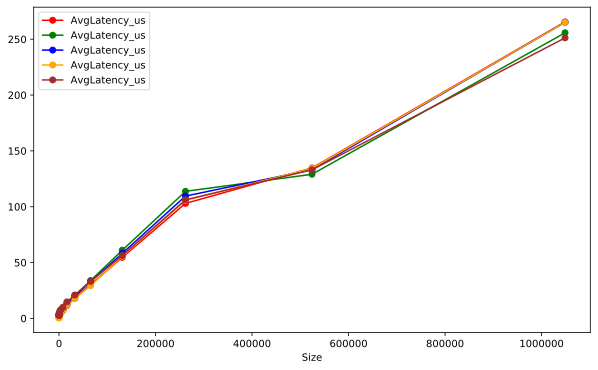

In [7]:
skl_bcast_n4_p12 = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/bcast_skylake_n4_ppn3_t12.csv")
skl_bcast_n4_p12 = skl_bcast_n4_p12.groupby("Size").mean().reset_index()

skl_bcast_n5_p13 = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/bcast_skylake_n5_ppn3_t13.csv")
skl_bcast_n5_p13 = skl_bcast_n5_p13.groupby("Size").mean().reset_index()

skl_bcast_n6_p14 = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/bcast_skylake_n6_ppn3_t14.csv")
skl_bcast_n6_p14 = skl_bcast_n6_p14.groupby("Size").mean().reset_index()

skl_bcast_n7_p15 = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/bcast_skylake_n7_ppn3_t15.csv")
skl_bcast_n7_p15 = skl_bcast_n7_p15.groupby("Size").mean().reset_index()

skl_bcast_n8_p16 = pd.read_csv("../../SpMVMicroBenchmark/mpi/Results/bcast_skylake_n8_ppn2_t16.csv")
skl_bcast_n8_p16 = skl_bcast_n8_p16.groupby("Size").mean().reset_index()
size_list = skl_bcast_n8_p16["Size"]

_node= []
_p = []
_lat = []
_s = []
_ppn = []
for msg_s in size_list:
    #     Node:4 and process:12
    _s.append(msg_s)
    _node.append(4)
    _p.append(12)
    _ppn.append(3)
    _lat.append(skl_bcast_n4_p12[skl_bcast_n4_p12["Size"] == msg_s].reset_index()["AvgLatency_us"].iloc[0])

    #     Node:5 and process:13
    _s.append(msg_s)
    _node.append(5)
    _p.append(13)
    _ppn.append(3)
    _lat.append(skl_bcast_n5_p13[skl_bcast_n5_p13["Size"] == msg_s].reset_index()["AvgLatency_us"].iloc[0])
    
    #     Node:4 and process:12
    _s.append(msg_s)
    _node.append(6)
    _p.append(14)
    _ppn.append(3)
    _lat.append(skl_bcast_n6_p14[skl_bcast_n6_p14["Size"] == msg_s].reset_index()["AvgLatency_us"].iloc[0])
    
    #     Node:4 and process:12
    _s.append(msg_s)
    _node.append(7)
    _p.append(15)
    _ppn.append(3)
    _lat.append(skl_bcast_n7_p15[skl_bcast_n7_p15["Size"] == msg_s].reset_index()["AvgLatency_us"].iloc[0])
    
    #     Node:4 and process:12
    _s.append(msg_s)
    _node.append(8)
    _p.append(16)
    _ppn.append(2)
    _lat.append(skl_bcast_n8_p16[skl_bcast_n8_p16["Size"] == msg_s].reset_index()["AvgLatency_us"].iloc[0])
skl_bcast_data = pd.DataFrame()
skl_bcast_data["Size"] = _s
skl_bcast_data["Nodes"] = _node
skl_bcast_data["Process"] = _p
skl_bcast_data["PPN"] = _ppn
skl_bcast_data["Latency_us"] = _lat
ax1 = skl_bcast_n4_p12.plot(kind="line", x="Size", color="r", y="AvgLatency_us", style="-o", figsize=(10,6))
skl_bcast_n5_p13.plot(kind="line", ax=ax1, x="Size", color="g", y="AvgLatency_us", style="-o", figsize=(10,6))
skl_bcast_n6_p14.plot(kind="line", ax=ax1, x="Size", color="b", y="AvgLatency_us", style="-o", figsize=(10,6))
skl_bcast_n7_p15.plot(kind="line", ax=ax1, x="Size", color="orange", y="AvgLatency_us", style="-o", figsize=(10,6))
skl_bcast_n8_p16.plot(kind="line", ax=ax1, x="Size", color="brown", y="AvgLatency_us", style="-o", figsize=(10,6))
skl_bcast_data

# CSR (2D and GK) Cache Friendliness

In [8]:
cache_data = pd.read_csv("../../ShMemGraph/src/util/Results/CACHE_FRIENDLINESS.csv")
cache_data = cache_data.groupby(["FileName", "Process", "Rank", "DataType", "CacheType", "Architecture"]).mean().reset_index()
kway_cache_data = cache_data[cache_data["FileName"].isin(test_matrices)].reset_index(drop=True)
random_cache_data = cache_data[cache_data["FileName"].isin(random_test_matrices)].reset_index(drop=True)
kway_L3_data = kway_cache_data[(kway_cache_data["CacheType"] == "L3") & (kway_cache_data["Architecture"] == "Skylake")]
rand_L3_data = random_cache_data[(random_cache_data["CacheType"] == "L3") & (random_cache_data["Architecture"] == "Skylake")]

TestMatL3Cache = pd.DataFrame()
_mat = []
_p = []
_miss = []
_hit = []
_rpn = []
_nnnzpn = []
_avg_row = []
_avg_nnz = []
_access = []
for p,p_data in rand_L3_data.groupby(["Process"]):
    for f,data in p_data.groupby(["FileName"]):
        ppn = 36
        data = data.reset_index()
        prcs = p
        node = int(prcs/ppn)
        if len(data) < ppn:
            print("******* ", f, " does not has sufficient data for process: ", p, " *******")
            continue
        _mat.append(random_to_org_map[f])
        _avg_nnz.append(data["NNZ"].mean())
        _avg_row.append(data["Vtx"].mean())
        _p.append(p)
        prcs = ppn*node
        if prcs > len(data):
            print(f, " not fully done! [found", len(data), "of", prcs, "] for process: ", p)
            node = int(len(data)/ppn)
            prcs = node*ppn
            print("Node count: ", node, " process count: ", prcs)
        data = data.iloc[0:prcs]
        nnz = int(data["NNZ"].sum()/node)

        avg_cache_miss = data["CacheMiss"].sum()
        avg_cache_hit = data["CacheHit"].sum()

        avg_cache_miss = avg_cache_miss/node
        avg_cache_hit = avg_cache_hit/node

        _nnnzpn.append(data["NNZ"].sum()/node)
        _rpn.append(data["Vtx"].sum()/node)
        _miss.append(avg_cache_miss)
        _hit.append(avg_cache_hit)
        _access.append(avg_cache_miss + avg_cache_hit)
    
#     print("Node: ", node, " Process: ", prcs)
#     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
TestMatL3Cache["Matrices"] = _mat
TestMatL3Cache["Process"] = _p
TestMatL3Cache["AvgRows"] = _avg_row
TestMatL3Cache["AvgNNZ"] = _avg_nnz
TestMatL3Cache["RowsPerNode"] = _rpn
TestMatL3Cache["NNZPerNode"] = _nnnzpn
TestMatL3Cache["CacheMissPerNode"] = _miss
TestMatL3Cache["CacheHitPerNode"] = _hit
TestMatL3Cache["CacheAccessPerNode"] = _access
TestMatL3Cache


TestKwayMatL3Cache = pd.DataFrame()
_mat = []
_p = []
_miss = []
_hit = []
_rpn = []
_nnnzpn = []
_avg_row = []
_avg_nnz = []
_access = []
for p,p_data in kway_L3_data.groupby(["Process"]):
    for f,data in p_data.groupby(["FileName"]):
        ppn = 36
        data = data.reset_index()
        prcs = p
        node = int(prcs/ppn)
        if len(data) < ppn:
            print("******* ", f, " does not has sufficient kway data for process: ", p, " *******")
            continue
        _mat.append(f)
        _avg_nnz.append(data["NNZ"].mean())
        _avg_row.append(data["Vtx"].mean())
        _p.append(p)
        prcs = ppn*node
        if prcs > len(data):
            print(f, " not fully done! [found", len(data), "of", prcs, "] for process: ", p)
            node = int(len(data)/ppn)
            prcs = node*ppn
            print("Node count: ", node, " process count: ", prcs)
        data = data.iloc[0:prcs]
        nnz = int(data["NNZ"].sum()/node)

        avg_cache_miss = data["CacheMiss"].sum()
        avg_cache_hit = data["CacheHit"].sum()

        avg_cache_miss = avg_cache_miss/node
        avg_cache_hit = avg_cache_hit/node

        _nnnzpn.append(data["NNZ"].sum()/node)
        _rpn.append(data["Vtx"].sum()/node)
        _miss.append(avg_cache_miss)
        _hit.append(avg_cache_hit)
        _access.append(avg_cache_miss + avg_cache_hit)
    
#     print("Node: ", node, " Process: ", prcs)
#     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
TestKwayMatL3Cache["Matrices"] = _mat
TestKwayMatL3Cache["Process"] = _p
TestKwayMatL3Cache["AvgRows"] = _avg_row
TestKwayMatL3Cache["AvgNNZ"] = _avg_nnz
TestKwayMatL3Cache["RowsPerNode"] = _rpn
TestKwayMatL3Cache["NNZPerNode"] = _nnnzpn
TestKwayMatL3Cache["CacheMissPerNode"] = _miss
TestKwayMatL3Cache["CacheHitPerNode"] = _hit
TestKwayMatL3Cache["CacheAccessPerNode"] = _access
TestKwayMatL3Cache


,Matrices,Process,AvgRows,AvgNNZ,RowsPerNode,NNZPerNode,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode
0,333SP,144,25783.437500,154286.569444,9.282038e+05,5.554316e+06,69054.250000,5.485262e+06,5.554316e+06
1,AS365,144,26383.854167,157889.944444,9.498188e+05,5.684038e+06,75173.250000,5.608865e+06,5.684038e+06
2,M6,144,24317.888889,145860.222222,8.754440e+05,5.250968e+06,70532.500000,5.180436e+06,5.250968e+06
3,NLR,144,28915.020833,173444.111111,1.040941e+06,6.243988e+06,82567.000000,6.161421e+06,6.243988e+06
4,hugetrace-00010,144,83732.229167,251141.375000,3.014360e+06,9.041090e+06,207038.250000,8.834051e+06,9.041090e+06
5,road_central,144,97790.388889,235186.291667,3.520454e+06,8.466706e+06,224468.750000,8.242238e+06,8.466706e+06
6,road_usa,144,166301.020833,400754.333333,5.986837e+06,1.442716e+07,378466.750000,1.404869e+07,1.442716e+07
7,333SP,169,21969.319527,131463.112426,7.926078e+05,4.740976e+06,59326.750000,4.681649e+06,4.740976e+06
8,AS365,169,22480.917160,134533.443787,8.099950e+05,4.850331e+06,65520.250000,4.784810e+06,4.850331e+06
9,M6,169,20720.568047,124283.266272,7.458615e+05,4.473610e+06,61385.000000,4.412225e+06,4.473610e+06


# COO (2D and GK) Cache Friendliness

In [9]:
coo_cache_data = pd.read_csv("../../ShMemGraph/src/util/Results/CACHE_FRIENDLINESS_COO.csv")
coo_cache_data = coo_cache_data.groupby(["FileName", "Array", "Process", "Rank", "DataType", "CacheType", "Architecture"]).mean().reset_index()
coo_kway_cache_data = coo_cache_data[coo_cache_data["FileName"].isin(test_matrices)].reset_index(drop=True)
coo_random_cache_data = coo_cache_data[coo_cache_data["FileName"].isin(random_test_matrices)].reset_index(drop=True)
coo_kway_L3_data = coo_kway_cache_data[(coo_kway_cache_data["CacheType"] == "L3") & (coo_kway_cache_data["Architecture"] == "Skylake")].reset_index(drop=True)
coo_rand_L3_data = coo_random_cache_data[(coo_random_cache_data["CacheType"] == "L3") & (coo_random_cache_data["Architecture"] == "Skylake")].reset_index(drop=True)

COOTestMatL3Cache = pd.DataFrame()
_mat = []
_p = []
_a = []
_miss = []
_hit = []
_rpn = []
_nnnzpn = []
_avg_row = []
_avg_nnz = []
_access = []
for p,p_data in coo_rand_L3_data.groupby(["Process"]):
    for a,a_data in p_data.groupby(["Array"]):
        for f,data in a_data.groupby(["FileName"]):
            ppn = 36
            data = data.reset_index()
            prcs = p
            node = int(prcs/ppn)
            if len(data) < ppn:
                print("******* ", f, " does not has sufficient data for process: ", p, " array: ", a, " *******")
                continue
            _mat.append(random_to_org_map[f])
            _avg_nnz.append(data["NNZ"].mean())
            _avg_row.append(data["Vtx"].mean())
            _p.append(p)
            _a.append(a)
            prcs = ppn*node
            if prcs > len(data):
                print(f, " not fully done! [found", len(data), "of", prcs, "] for process: ", p, " array: ", a)
                node = int(len(data)/ppn)
                prcs = node*ppn
                print("Node count: ", node, " process count: ", prcs)
            data = data.iloc[0:prcs]
            nnz = int(data["NNZ"].sum()/node)

            avg_cache_miss = data["CacheMiss"].sum()
            avg_cache_hit = data["CacheHit"].sum()

            avg_cache_miss = avg_cache_miss/node
            avg_cache_hit = avg_cache_hit/node

            _nnnzpn.append(data["NNZ"].sum()/node)
            _rpn.append(data["Vtx"].sum()/node)
            _miss.append(avg_cache_miss)
            _hit.append(avg_cache_hit)
            _access.append(avg_cache_miss + avg_cache_hit)
    
#     print("Node: ", node, " Process: ", prcs)
#     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
COOTestMatL3Cache["Matrices"] = _mat
COOTestMatL3Cache["Array"] = _a
COOTestMatL3Cache["Process"] = _p
COOTestMatL3Cache["AvgRows"] = _avg_row
COOTestMatL3Cache["AvgNNZ"] = _avg_nnz
COOTestMatL3Cache["RowsPerNode"] = _rpn
COOTestMatL3Cache["NNZPerNode"] = _nnnzpn
COOTestMatL3Cache["CacheMissPerNode"] = _miss
COOTestMatL3Cache["CacheHitPerNode"] = _hit
COOTestMatL3Cache["CacheAccessPerNode"] = _access
COOTestMatL3Cache


COOTestKwayMatL3Cache = pd.DataFrame()
_mat = []
_p = []
_a = []
_miss = []
_hit = []
_rpn = []
_nnnzpn = []
_avg_row = []
_avg_nnz = []
_access = []
for p,p_data in coo_kway_L3_data.groupby(["Process"]):
    for a,a_data in p_data.groupby(["Array"]):
        for f,data in a_data.groupby(["FileName"]):
            ppn = 36
            data = data.reset_index()
            prcs = p
            node = int(prcs/ppn)
            if len(data) < ppn:
                print("******* ", f, " does not has sufficient data for process: ", p, " array: ", a, " *******")
                continue
            _mat.append(f)
            _avg_nnz.append(data["NNZ"].mean())
            _avg_row.append(data["Vtx"].mean())
            _p.append(p)
            _a.append(a)
            prcs = ppn*node
            if prcs > len(data):
                print(f, " not fully done! [found", len(data), "of", prcs, "] for process: ", p, " array: ", a)
                node = int(len(data)/ppn)
                prcs = node*ppn
                print("Node count: ", node, " process count: ", prcs)
            data = data.iloc[0:prcs]
            nnz = int(data["NNZ"].sum()/node)

            avg_cache_miss = data["CacheMiss"].sum()
            avg_cache_hit = data["CacheHit"].sum()

            avg_cache_miss = avg_cache_miss/node
            avg_cache_hit = avg_cache_hit/node

            _nnnzpn.append(data["NNZ"].sum()/node)
            _rpn.append(data["Vtx"].sum()/node)
            _miss.append(avg_cache_miss)
            _hit.append(avg_cache_hit)
            _access.append(avg_cache_miss + avg_cache_hit)
    
#     print("Node: ", node, " Process: ", prcs)
#     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
COOTestKwayMatL3Cache["Matrices"] = _mat
COOTestKwayMatL3Cache["Array"] = _a
COOTestKwayMatL3Cache["Process"] = _p
COOTestKwayMatL3Cache["AvgRows"] = _avg_row
COOTestKwayMatL3Cache["AvgNNZ"] = _avg_nnz
COOTestKwayMatL3Cache["RowsPerNode"] = _rpn
COOTestKwayMatL3Cache["NNZPerNode"] = _nnnzpn
COOTestKwayMatL3Cache["CacheMissPerNode"] = _miss
COOTestKwayMatL3Cache["CacheHitPerNode"] = _hit
COOTestKwayMatL3Cache["CacheAccessPerNode"] = _access
COOTestKwayMatL3Cache

,Matrices,Array,Process,AvgRows,AvgNNZ,RowsPerNode,NNZPerNode,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode
0,333SP,ColA,144,25783.437500,154286.569444,9.282038e+05,5.554316e+06,69054.250000,5.485262e+06,5.554316e+06
1,AS365,ColA,144,26383.854167,157889.944444,9.498188e+05,5.684038e+06,75173.250000,5.608865e+06,5.684038e+06
2,M6,ColA,144,24317.888889,145860.222222,8.754440e+05,5.250968e+06,70532.500000,5.180436e+06,5.250968e+06
3,NLR,ColA,144,28915.020833,173444.111111,1.040941e+06,6.243988e+06,82567.000000,6.161421e+06,6.243988e+06
4,hugetrace-00010,ColA,144,83732.229167,251141.375000,3.014360e+06,9.041090e+06,207038.250000,8.834051e+06,9.041090e+06
5,road_central,ColA,144,97790.388889,235186.291667,3.520454e+06,8.466706e+06,224468.750000,8.242238e+06,8.466706e+06
6,road_usa,ColA,144,166301.020833,400754.333333,5.986837e+06,1.442716e+07,378466.750000,1.404869e+07,1.442716e+07
7,333SP,RowA,144,25783.437500,154286.569444,9.282038e+05,5.554316e+06,58028.000000,5.496288e+06,5.554316e+06
8,AS365,RowA,144,26383.854167,157889.944444,9.498188e+05,5.684038e+06,59379.750000,5.624658e+06,5.684038e+06
9,M6,RowA,144,24317.888889,145860.222222,8.754440e+05,5.250968e+06,54730.750000,5.196237e+06,5.250968e+06


# Memory Access Model on Skylake(Single Precision)

# Prepare CSR 2D SpMV Data

In [10]:
csr = {
    min: 218861,
    max: 1995613
}
csr = {
    min: 218861,
    max: 1995613
}

In [11]:
tmp = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_COO_2D_SpMV.csv")
tmp = tmp[tmp["Name"].isin(test_matrices)].reset_index(drop=True)
min(tmp["AvgRow"])

218861

In [12]:
csr_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
csr_2d_spmv = csr_2d_spmv[~csr_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_2d_ref = csr_2d_spmv[["Name", "Nodes", "nProcess", "DataType", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "AvgTime", "AvgBcastTime", "AvgMatmulTime", "AvgReduceTime"]]
csr_2d_ref = csr_2d_ref.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by=["Name", "Nodes", "nProcess", "DataType"]).reset_index(drop=True)
csr_2d_test = pd.DataFrame()
csr_2d_test["Name"] = csr_2d_ref["Name"]
csr_2d_test["Nodes"] = csr_2d_ref["Nodes"]
csr_2d_test["nProcess"] = csr_2d_ref["nProcess"]
csr_2d_test["AvgRow"] = csr_2d_ref["AvgRow"]
csr_2d_test["NonZeroPerRow"] = csr_2d_ref["NonZeroPerRow"]
csr_2d_test["NNZ"] = csr_2d_ref["NNZ"]
csr_2d_test["AvgTime"] = csr_2d_ref["AvgTime"]/1000
csr_2d_test["AvgBcastTime"] = csr_2d_ref["AvgBcastTime"]/1000
csr_2d_test["AvgMatmulTime"] = csr_2d_ref["AvgMatmulTime"]/1000
csr_2d_test["AvgReduceTime"] = csr_2d_ref["AvgReduceTime"]/1000
csr_2d_test["Size"] = 36*((12*csr_2d_ref["AvgRow"]) + (8*csr_2d_ref["NNZ"])) 
csr_2d_test["BcastSize"] = 4*csr_2d_ref["AvgRow"]
csr_2d_test["ReduceSize"] = 4*csr_2d_ref["AvgRow"]
csr_2d_test = csr_2d_test[csr_2d_test["Size"] >= 100000000].reset_index(drop=True).sort_values(by="AvgRow").reset_index(drop=True)
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
csr_2d_test["TimeForFLOPS"] = (1.0e-9 * csr_2d_test["NNZ"] * VEC_WIDTH * FLOPS_PER_CAL)/FLOP_PER_SEC
csr_2d_test = csr_2d_test[csr_2d_test["Name"].isin(test_matrices)].reset_index(drop=True)

_miss = []
_hit = []
_access = []

for i,r in csr_2d_test.iterrows():
    cache_data = TestMatL3Cache[(TestMatL3Cache["Matrices"] == r["Name"]) & (TestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    if cache_data.shape[0] <= 0:
        print("Cache data not available for ", r["Name"], r["nProcess"])
        _miss.append(0)
        _hit.append(0)
        _access.append(0)
        continue
    _miss.append(cache_data["CacheMissPerNode"].iloc[0]*4)
    _hit.append(cache_data["CacheHitPerNode"].iloc[0]*4)
    _access.append(cache_data["CacheAccessPerNode"].iloc[0]*4)
csr_2d_test["CacheMissPerNode"] = _miss
csr_2d_test["CacheHitPerNode"] = _hit
csr_2d_test["CacheAccessPerNode"] = _access

csr_2d_test["SeqSize"] = csr_2d_test["Size"] + csr_2d_test["CacheHitPerNode"]
csr_2d_test["RandomSize"] = csr_2d_test["CacheMissPerNode"]
csr_2d_test

,Name,Nodes,nProcess,AvgRow,NonZeroPerRow,NNZ,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,Size,BcastSize,ReduceSize,TimeForFLOPS,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode,SeqSize,RandomSize
0,M6,8,256,218861,0.374879,82046,0.003967,0.000958,0.001573,0.001435,118177200,875444,875444,0.000015,3.134678e+06,8.680141e+06,1.181482e+07,1.268573e+08,3.134678e+06
1,333SP,8,256,232051,0.373996,86786,0.004235,0.001019,0.001692,0.001525,125240400,928204,928204,0.000016,3.749885e+06,8.747425e+06,1.249731e+07,1.339878e+08,3.749885e+06
2,M6,7,225,233452,0.399870,93350,0.004356,0.001021,0.001761,0.001573,127736064,933808,933808,0.000017,4.015929e+06,9.426485e+06,1.344241e+07,1.371625e+08,4.015929e+06
3,AS365,8,256,237455,0.374021,88813,0.004371,0.001043,0.001738,0.001590,128158704,949820,949820,0.000017,4.006044e+06,8.783337e+06,1.278938e+07,1.369420e+08,4.006044e+06
4,333SP,7,225,247521,0.398929,98743,0.004739,0.001087,0.001894,0.001759,135367056,990084,990084,0.000018,4.743762e+06,9.475434e+06,1.421920e+07,1.448425e+08,4.743762e+06
5,AS365,7,225,253285,0.398956,101049,0.004683,0.001113,0.001949,0.001620,138521232,1013140,1013140,0.000019,5.046069e+06,9.504933e+06,1.455100e+07,1.480262e+08,5.046069e+06
6,NLR,8,256,260236,0.374899,97562,0.004813,0.001150,0.001960,0.001703,140519808,1040944,1040944,0.000018,5.134838e+06,8.913890e+06,1.404873e+07,1.494337e+08,5.134838e+06
7,M6,5,169,269368,0.461388,124283,0.005272,0.001066,0.002478,0.001727,152160480,1077472,1077472,0.000023,6.712645e+06,1.118448e+07,1.789713e+07,1.633450e+08,6.712645e+06
8,NLR,7,225,277585,0.399893,111004,0.005410,0.001224,0.002416,0.001770,151885872,1110340,1110340,0.000021,6.361668e+06,9.623634e+06,1.598530e+07,1.615095e+08,6.361668e+06
9,333SP,5,169,285602,0.460302,131463,0.005701,0.001134,0.002751,0.001816,161241408,1142408,1142408,0.000025,7.721183e+06,1.120866e+07,1.892984e+07,1.724501e+08,7.721183e+06


# Predict CSR 2D SpMV model Based on STREAM 

sequential Bandwidth:  133970825000.00002  Random Bandwidth:  4356041499.999998


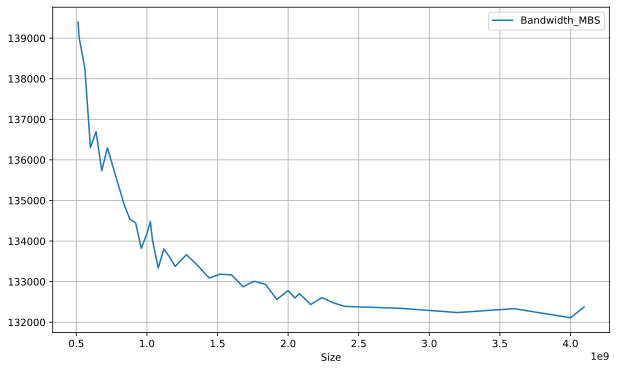

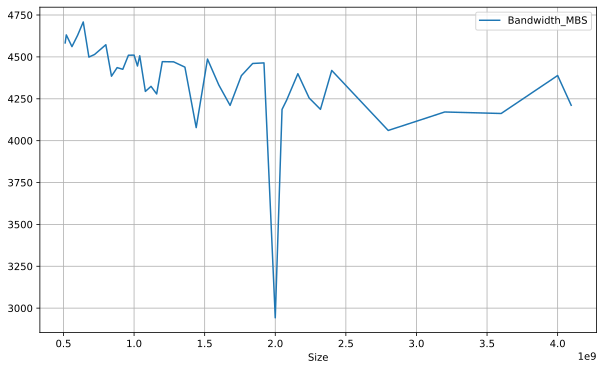

In [13]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")

dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_copy = dp_copy[dp_copy["Size"] >= 500000000]
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()

dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_random_copy = dp_random_copy[dp_random_copy["Size"] >= 500000000]
dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()

ax = dp_copy.plot(kind="line", x="Size", y="Bandwidth_MBS", figsize=(10,6))
ax.grid(True)
ax = dp_random_copy.plot(kind="line", x="Size", y="Bandwidth_MBS", figsize=(10,6))
ax.grid(True)
seq_mean_bw = dp_copy["Bandwidth_MBS"].mean() * 1.0E06
rand_mean_bw = dp_random_copy["Bandwidth_MBS"].mean() * 1.0E06
print("sequential Bandwidth: ", seq_mean_bw, " Random Bandwidth: ", rand_mean_bw)

In [14]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")

_min_range = min(csr_2d_test["SeqSize"])
_max_range = max(csr_2d_test["SeqSize"])

dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_copy = dp_copy[(dp_copy["Size"] >= _min_range) & (dp_copy["Size"] <= _max_range)]
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_random_copy = dp_random_copy[(dp_random_copy["Size"] >= _min_range) & (dp_random_copy["Size"] <= _max_range)]
dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


_bandwidth = dp_copy["Bandwidth_MBS"].mean() * 1.0E06
_random_bandwidth = dp_random_copy["Bandwidth_MBS"].mean() * 1.0E06

csr_2d_matmul_pred = csr_2d_test
csr_2d_matmul_pred["SeqLatency"] = csr_2d_test["SeqSize"] /(_bandwidth)
csr_2d_matmul_pred["RandomLatency"] = csr_2d_test["RandomSize"] /(_random_bandwidth)
csr_2d_matmul_pred["PredictedTime"] = csr_2d_matmul_pred["SeqLatency"] + csr_2d_matmul_pred["RandomLatency"]
csr_2d_matmul_pred["Error"] = ((csr_2d_test["AvgMatmulTime"] - csr_2d_matmul_pred["PredictedTime"])/csr_2d_test["AvgMatmulTime"])*100
csr_2d_matmul_pred = csr_2d_matmul_pred.sort_values(by=["Name", "nProcess"]).reset_index(drop=True)
for i,r in csr_2d_matmul_pred.iterrows():
    print(r["Name"], " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.2E}'.format(r["AvgMatmulTime"]), " & ", '{0:,.2E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(abs(r["Error"])), " \\\\ \hline")
    
print("Max error: ", abs(csr_2d_matmul_pred["Error"]).max(), " Avg Error: ", abs(csr_2d_matmul_pred["Error"]).mean())

333SP  &  4  &  144  &  3.20E-03  &  3.34E-03  &  4.5  \\ \hline
333SP  &  5  &  169  &  2.75E-03  &  2.76E-03  &  0.4  \\ \hline
333SP  &  7  &  225  &  1.89E-03  &  1.97E-03  &  3.8  \\ \hline
333SP  &  8  &  256  &  1.69E-03  &  1.69E-03  &  0.2  \\ \hline
AS365  &  4  &  144  &  3.29E-03  &  3.47E-03  &  5.7  \\ \hline
AS365  &  5  &  169  &  2.83E-03  &  2.88E-03  &  1.5  \\ \hline
AS365  &  7  &  225  &  1.95E-03  &  2.05E-03  &  5.2  \\ \hline
AS365  &  8  &  256  &  1.74E-03  &  1.76E-03  &  1.4  \\ \hline
M6  &  4  &  144  &  2.98E-03  &  3.03E-03  &  1.6  \\ \hline
M6  &  5  &  169  &  2.48E-03  &  2.49E-03  &  0.7  \\ \hline
M6  &  7  &  225  &  1.76E-03  &  1.77E-03  &  0.2  \\ \hline
M6  &  8  &  256  &  1.57E-03  &  1.51E-03  &  3.7  \\ \hline
NLR  &  4  &  144  &  3.67E-03  &  4.03E-03  &  9.7  \\ \hline
NLR  &  5  &  169  &  3.18E-03  &  3.35E-03  &  5.4  \\ \hline
NLR  &  7  &  225  &  2.42E-03  &  2.41E-03  &  0.2  \\ \hline
NLR  &  8  &  256  &  1.96E-03  &  2.08E-03

# CSR MPI Communication

In [75]:
csr_2d_test_data

,index,Name,Nodes,nProcess,DataType,MatrixSize,AvgRow,NNZ,NonZeroPerRow,AvgNPRSD,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun,Density
0,23,M6,8,256,4,3501776,218861,82046,0.374879,0.595216,155.887635,0.958379,1.57282,1.43547,20,1.712855e-06
1,3,333SP,8,256,4,3712815,232051,86786,0.373996,0.593676,166.449341,1.018790,1.69188,1.52475,20,1.611695e-06
2,22,M6,7,225,4,3501776,233452,93350,0.399870,0.613502,171.169589,1.021080,1.76100,1.57346,20,1.712849e-06
3,11,AS365,8,256,4,3799275,237455,88813,0.374021,0.594594,171.789340,1.043380,1.73796,1.58995,20,1.575121e-06
4,2,333SP,7,225,4,3712815,247521,98743,0.398929,0.611855,186.245220,1.086530,1.89390,1.75871,20,1.611693e-06
5,10,AS365,7,225,4,3799275,253285,101049,0.398956,0.612859,184.021269,1.112810,1.94942,1.62031,20,1.575118e-06
6,31,NLR,8,256,4,4163763,260236,97562,0.374899,0.595241,189.161234,1.149600,1.96031,1.70343,20,1.440608e-06
7,21,M6,5,169,4,3501776,269368,124283,0.461388,0.655906,207.180781,1.065960,2.47846,1.72744,20,1.712852e-06
8,30,NLR,7,225,4,4163763,277585,111004,0.399893,0.613578,212.613133,1.223750,2.41591,1.77043,20,1.440611e-06
9,1,333SP,5,169,4,3712815,285602,131463,0.460302,0.654063,224.055931,1.134480,2.75122,1.81556,20,1.611688e-06


# MPI Broadcast

In [15]:
csr_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
csr_2d_spmv = csr_2d_spmv[~csr_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_2d_spmv = csr_2d_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()

csr_2d_bcast_data = csr_2d_spmv[csr_2d_spmv["DataType"] == 4][["Name", "MatrixSize", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgBcastTime"]].sort_values(by="AvgRow").reset_index(drop=True)
csr_2d_bcast_data = csr_2d_bcast_data.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
if min(csr_2d_bcast_data["AvgBcastTime"]) < 1.0:
    min_time_factor = 1/min(csr_2d_bcast_data["AvgBcastTime"])
for i,r in csr_2d_bcast_data.iterrows():
    csr_2d_bcast_data.at[i, "AvgBcastTime"] = min_time_factor*r["AvgBcastTime"]
    density.append(float(r["NNZ"])/float(r["AvgRow"] * r["AvgRow"]))
csr_2d_bcast_data["Density"] = density

csr_2d_train_data = csr_2d_bcast_data[~csr_2d_bcast_data["Name"].isin(test_matrices)].reset_index(drop=True)
csr_2d_test_data = csr_2d_bcast_data[csr_2d_bcast_data["Name"].isin(test_matrices)].reset_index(drop=True)

# attributes = ["AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRow", "NNZ", "Nodes", "nProcess"]
csr_2d_train = csr_2d_train_data[attributes].to_numpy()
csr_2d_test = csr_2d_test_data[attributes].to_numpy()
column = "AvgBcastTime"

csr_2d_X = np.concatenate((csr_2d_train, csr_2d_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_2d_X = scaler.fit_transform(csr_2d_X)
X = csr_2d_X[0:len(csr_2d_train)]
csr_2d_test_X = csr_2d_X[len(csr_2d_train):]
train_y = np.array(csr_2d_train_data[column])
test_y = np.array(csr_2d_test_data[column])

# best_param = _train_model(X, train_y)
csr_2d_bcast_best_param = {"C" : 58000, "epsilon": 0.1}
svr_model = SVR(kernel='poly', C=csr_2d_bcast_best_param['C'], gamma='auto', degree=3, epsilon=csr_2d_bcast_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(csr_2d_test_X)


csr_dyn_2d_bcast_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []

max_err = 0
avg_err = 0
for i,row in csr_2d_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRow"])
    nnz_r.append(row["NonZeroPerRow"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR 2D Partition")
    m_size.append(row["MatrixSize"])
csr_dyn_2d_bcast_pred["Name"] = mat
csr_dyn_2d_bcast_pred["Model"] = spmv_model
csr_dyn_2d_bcast_pred["Nodes"] = node
csr_dyn_2d_bcast_pred["Process"] = prcs
csr_dyn_2d_bcast_pred["Matrix Size"] = m_size
csr_dyn_2d_bcast_pred["Avg Row"] = rows
csr_dyn_2d_bcast_pred["Nonzero per Row"] = nnz_r
csr_dyn_2d_bcast_pred["Actual Time"] = a_time
csr_dyn_2d_bcast_pred["Predicted Time"] = p_time
csr_dyn_2d_bcast_pred["Error"] = err

print("max error: ", csr_dyn_2d_bcast_pred["Error"].max(), " avg error: ", csr_dyn_2d_bcast_pred["Error"].mean())

M6 & 9.584E-01 & 9.908E-01 & 3.4\% \\ \hline
333SP & 1.019E+00 & 1.050E+00 & 3.0\% \\ \hline
M6 & 1.021E+00 & 1.065E+00 & 4.3\% \\ \hline
AS365 & 1.043E+00 & 1.074E+00 & 2.9\% \\ \hline
333SP & 1.087E+00 & 1.127E+00 & 3.7\% \\ \hline
AS365 & 1.113E+00 & 1.152E+00 & 3.5\% \\ \hline
NLR & 1.150E+00 & 1.176E+00 & 2.3\% \\ \hline
M6 & 1.066E+00 & 1.248E+00 & 1.7e+01\% \\ \hline
NLR & 1.224E+00 & 1.259E+00 & 2.9\% \\ \hline
333SP & 1.134E+00 & 1.322E+00 & 1.6e+01\% \\ \hline
M6 & 1.613E+00 & 1.429E+00 & 1.1e+01\% \\ \hline
AS365 & 1.162E+00 & 1.352E+00 & 1.6e+01\% \\ \hline
333SP & 1.716E+00 & 1.513E+00 & 1.2e+01\% \\ \hline
AS365 & 1.752E+00 & 1.547E+00 & 1.2e+01\% \\ \hline
NLR & 1.282E+00 & 1.479E+00 & 1.5e+01\% \\ \hline
NLR & 1.924E+00 & 1.690E+00 & 1.2e+01\% \\ \hline
hugetrace-00010 & 3.423E+00 & 3.430E+00 & 0.2\% \\ \hline
hugetrace-00010 & 3.633E+00 & 3.580E+00 & 1.5\% \\ \hline
road_central & 3.998E+00 & 4.018E+00 & 0.49\% \\ \hline
hugetrace-00010 & 3.449E+00 & 4.119E+00 & 1.9e+0

# MPI Reduce

In [16]:
csr_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
csr_2d_spmv = csr_2d_spmv[~csr_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_2d_spmv = csr_2d_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()

csr_2d_reduce_data = csr_2d_spmv[csr_2d_spmv["DataType"] == 4][["Name", "MatrixSize", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgReduceTime"]].sort_values(by="AvgRow").reset_index(drop=True)
csr_2d_reduce_data = csr_2d_reduce_data.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)

density = []
column = "AvgReduceTime"
min_time_factor = 1.0
if min(csr_2d_reduce_data[column]) < 1.0:
    min_time_factor = 1/min(csr_2d_reduce_data[column])
for i,r in csr_2d_reduce_data.iterrows():
    csr_2d_reduce_data.at[i, column] = min_time_factor*r[column]
    density.append(float(r["NNZ"])/float(r["AvgRow"] * r["AvgRow"]))
csr_2d_reduce_data["Density"] = density

csr_2d_train_data = csr_2d_reduce_data[~csr_2d_reduce_data["Name"].isin(test_matrices)].reset_index(drop=True)
csr_2d_test_data = csr_2d_reduce_data[csr_2d_reduce_data["Name"].isin(test_matrices)].reset_index(drop=True)


# attributes = ["AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRow", "NNZ", "Nodes", "nProcess"]
csr_2d_train = csr_2d_train_data[attributes].to_numpy()
csr_2d_test = csr_2d_test_data[attributes].to_numpy()


csr_2d_X = np.concatenate((csr_2d_train, csr_2d_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_2d_X = scaler.fit_transform(csr_2d_X)
X = csr_2d_X[0:len(csr_2d_train)]
csr_2d_test_X = csr_2d_X[len(csr_2d_train):]
train_y = np.array(csr_2d_train_data[column])
test_y = np.array(csr_2d_test_data[column])

# best_param = _train_model(X, train_y)
csr_2d_reduce_best_param = {"C" : 4000, "epsilon": 0.1}
svr_model = SVR(kernel='poly', C=csr_2d_reduce_best_param['C'], gamma='auto', degree=3, epsilon=csr_2d_reduce_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(csr_2d_test_X)


csr_dyn_2d_reduce_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []

max_err = 0
avg_err = 0
for i,row in csr_2d_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRow"])
    nnz_r.append(row["NonZeroPerRow"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR 2D Partition")
    m_size.append(row["MatrixSize"])
csr_dyn_2d_reduce_pred["Name"] = mat
csr_dyn_2d_reduce_pred["Model"] = spmv_model
csr_dyn_2d_reduce_pred["Nodes"] = node
csr_dyn_2d_reduce_pred["Process"] = prcs
csr_dyn_2d_reduce_pred["Matrix Size"] = m_size
csr_dyn_2d_reduce_pred["Avg Row"] = rows
csr_dyn_2d_reduce_pred["Nonzero per Row"] = nnz_r
csr_dyn_2d_reduce_pred["Actual Time"] = a_time
csr_dyn_2d_reduce_pred["Predicted Time"] = p_time
csr_dyn_2d_reduce_pred["Error"] = err

print("max error: ", csr_dyn_2d_reduce_pred["Error"].max(), " avg error: ", csr_dyn_2d_reduce_pred["Error"].mean())

M6 & 1.435E+00 & 1.474E+00 & 2.7\% \\ \hline
333SP & 1.525E+00 & 1.560E+00 & 2.3\% \\ \hline
M6 & 1.573E+00 & 1.730E+00 & 9.9\% \\ \hline
AS365 & 1.590E+00 & 1.596E+00 & 0.36\% \\ \hline
333SP & 1.759E+00 & 1.829E+00 & 4.0\% \\ \hline
AS365 & 1.620E+00 & 1.870E+00 & 1.5e+01\% \\ \hline
NLR & 1.703E+00 & 1.746E+00 & 2.5\% \\ \hline
M6 & 1.727E+00 & 2.020E+00 & 1.7e+01\% \\ \hline
NLR & 1.770E+00 & 2.042E+00 & 1.5e+01\% \\ \hline
333SP & 1.816E+00 & 2.138E+00 & 1.8e+01\% \\ \hline
M6 & 2.185E+00 & 2.129E+00 & 2.6\% \\ \hline
AS365 & 1.850E+00 & 2.186E+00 & 1.8e+01\% \\ \hline
333SP & 2.314E+00 & 2.251E+00 & 2.7\% \\ \hline
AS365 & 2.372E+00 & 2.302E+00 & 3.0\% \\ \hline
NLR & 2.017E+00 & 2.390E+00 & 1.8e+01\% \\ \hline
NLR & 2.626E+00 & 2.513E+00 & 4.3\% \\ \hline
hugetrace-00010 & 4.538E+00 & 4.848E+00 & 6.8\% \\ \hline
hugetrace-00010 & 6.653E+00 & 5.577E+00 & 1.6e+01\% \\ \hline
road_central & 5.266E+00 & 5.617E+00 & 6.7\% \\ \hline
hugetrace-00010 & 7.881E+00 & 6.576E+00 & 1.7e+01\% 

# Overall CSR 2D Performacne

In [17]:
csr_2d_matmul_pred = csr_2d_matmul_pred.sort_values(by=["Name", "Nodes", "nProcess"]).reset_index(drop=True)
csr_dyn_2d_bcast_pred = csr_dyn_2d_bcast_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
csr_dyn_2d_reduce_pred = csr_dyn_2d_reduce_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
csr_2d_matmul_pred["BcastPredictedTime"] = csr_dyn_2d_bcast_pred["Predicted Time"]/1000
csr_2d_matmul_pred["ReducePredictedTime"] = csr_dyn_2d_reduce_pred["Predicted Time"]/1000
csr_2d_matmul_pred["TotalPredictedTime"] = csr_2d_matmul_pred["PredictedTime"] + csr_2d_matmul_pred["BcastPredictedTime"] + csr_2d_matmul_pred["ReducePredictedTime"]
csr_2d_matmul_pred["TotalError"] = abs(csr_2d_matmul_pred["TotalPredictedTime"] - csr_2d_matmul_pred["AvgTime"])/csr_2d_matmul_pred["AvgTime"]*100

    
with open("table/bench_model_csr_2d_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Matrices} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{2}{| c |}{Time(s)} & \\multirow{2}{*}{Error\%} \\\\ \\cline{4-5} \n")
    f.write("  &  &  & Actual & Predicted &  \\\\ \\hline \n")
    for m,m_data in csr_2d_matmul_pred.groupby("Name"):
        size = len(m_data)
        tokens = m.split("_")
        name = tokens[0]
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for i,r in m_data.iterrows():
            print( " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.1E}'.format(r["AvgTime"]), " & ", '{0:,.1E}'.format(r["TotalPredictedTime"]), " & ", '{0:,.1f}'.format(r["TotalError"]), end=" ")
            f.write(" & " + str(r["Nodes"]) + " & " + str(r["nProcess"]) + " & " + '{0:,.1E}'.format(r["AvgTime"]) + " & " + '{0:,.1E}'.format(r["TotalPredictedTime"]) + " & " + '{0:,.1f}'.format(r["TotalError"]))
            if cnt == size:
                print("\% \\\\ \hline")
                f.write("\% \\\\ \hline \n")
            else:
                print("\% \\\\ \cline{2-6}")
                f.write("\% \\\\ \cline{2-6} \n")
            cnt += 1
    f.write("\\end{tabular} \n")
            
print("Max Error: ", abs(csr_2d_matmul_pred["TotalError"]).max(), " Avg Error: ", abs(csr_2d_matmul_pred["TotalError"]).mean())  




\multirow{4}{*}{333SP}  &  4  &  144  &  7.2E-03  &  7.1E-03  &  1.7 \% \\ \cline{2-6}
 &  5  &  169  &  5.7E-03  &  6.2E-03  &  9.2 \% \\ \cline{2-6}
 &  7  &  225  &  4.7E-03  &  4.9E-03  &  3.9 \% \\ \cline{2-6}
 &  8  &  256  &  4.2E-03  &  4.3E-03  &  1.5 \% \\ \hline
\multirow{4}{*}{AS365}  &  4  &  144  &  7.4E-03  &  7.3E-03  &  1.2 \% \\ \cline{2-6}
 &  5  &  169  &  5.8E-03  &  6.4E-03  &  9.8 \% \\ \cline{2-6}
 &  7  &  225  &  4.7E-03  &  5.1E-03  &  8.3 \% \\ \cline{2-6}
 &  8  &  256  &  4.4E-03  &  4.4E-03  &  1.4 \% \\ \hline
\multirow{4}{*}{M6}  &  4  &  144  &  6.8E-03  &  6.6E-03  &  2.8 \% \\ \cline{2-6}
 &  5  &  169  &  5.3E-03  &  5.8E-03  &  9.3 \% \\ \cline{2-6}
 &  7  &  225  &  4.4E-03  &  4.6E-03  &  4.7 \% \\ \cline{2-6}
 &  8  &  256  &  4.0E-03  &  4.0E-03  &  0.3 \% \\ \hline
\multirow{4}{*}{NLR}  &  4  &  144  &  8.2E-03  &  8.2E-03  &  0.1 \% \\ \cline{2-6}
 &  5  &  169  &  6.5E-03  &  7.2E-03  &  11.4 \% \\ \cline{2-6}
 &  7  &  225  &  5.4E-03  &  5

# Prepare COO 2D SpMV Data

In [18]:
coo_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_COO_2D_SpMV.csv")
coo_2d_spmv = coo_2d_spmv[~coo_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
coo_2d_ref = coo_2d_spmv[["Name", "Nodes", "nProcess", "DataType", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "AvgTime", "AvgBcastTime", "AvgMatmulTime", "AvgReduceTime"]]
coo_2d_ref = coo_2d_ref.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by=["Name", "Nodes", "nProcess", "DataType"]).reset_index(drop=True)
coo_2d_test = pd.DataFrame()
coo_2d_test["Name"] = coo_2d_ref["Name"]
coo_2d_test["Nodes"] = coo_2d_ref["Nodes"]
coo_2d_test["nProcess"] = coo_2d_ref["nProcess"]
coo_2d_test["AvgRow"] = coo_2d_ref["AvgRow"]
coo_2d_test["NonZeroPerRow"] = coo_2d_ref["NonZeroPerRow"]
coo_2d_test["NNZ"] = coo_2d_ref["NNZ"]
coo_2d_test["AvgTime"] = coo_2d_ref["AvgTime"]/1000
coo_2d_test["AvgBcastTime"] = coo_2d_ref["AvgBcastTime"]/1000
coo_2d_test["AvgMatmulTime"] = coo_2d_ref["AvgMatmulTime"]/1000
coo_2d_test["AvgReduceTime"] = coo_2d_ref["AvgReduceTime"]/1000
coo_2d_test["Size"] = 36*(12*coo_2d_ref["NNZ"])
coo_2d_test["BcastSize"] = 4*coo_2d_ref["AvgRow"]
coo_2d_test["ReduceSize"] = 4*coo_2d_ref["AvgRow"]
# coo_2d_test = coo_2d_test[coo_2d_test["Size"] >= 100000000].reset_index(drop=True).sort_values(by="AvgRow").reset_index(drop=True)
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
coo_2d_test["TimeForFLOPS"] = (1.0e-9 * coo_2d_test["NNZ"] * VEC_WIDTH * FLOPS_PER_CAL)/FLOP_PER_SEC
coo_2d_test = coo_2d_test[coo_2d_test["Name"].isin(test_matrices)].reset_index(drop=True)

_miss = []
_hit = []
_access = []

for i,r in coo_2d_test.iterrows():
    col_cache_data = COOTestMatL3Cache[(COOTestMatL3Cache["Array"] == "ColA") & (COOTestMatL3Cache["Matrices"] == r["Name"]) & (COOTestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    row_cache_data = COOTestMatL3Cache[(COOTestMatL3Cache["Array"] == "RowA") & (COOTestMatL3Cache["Matrices"] == r["Name"]) & (COOTestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    _sum_miss = 0
    _sum_hit = 0
    _sum_access = 0
    if col_cache_data.shape[0] <= 0:
        print("ColA Cache data not available for ", r["Name"], r["nProcess"])
    else:
        _sum_miss += col_cache_data["CacheMissPerNode"].iloc[0]*4
        _sum_hit += col_cache_data["CacheHitPerNode"].iloc[0]*4
        _sum_access += col_cache_data["CacheAccessPerNode"].iloc[0]*4
    
    if row_cache_data.shape[0] <= 0:
        print("RowA Cache data not available for ", r["Name"], r["nProcess"])
    else:
        _sum_miss += row_cache_data["CacheMissPerNode"].iloc[0]*4
        _sum_hit += row_cache_data["CacheHitPerNode"].iloc[0]*4
        _sum_access += row_cache_data["CacheAccessPerNode"].iloc[0]*4
    
    
    _miss.append(_sum_miss)
    _hit.append(_sum_hit)
    _access.append(_sum_access)
coo_2d_test["CacheMissPerNode"] = _miss
coo_2d_test["CacheHitPerNode"] = _hit
coo_2d_test["CacheAccessPerNode"] = _access

coo_2d_test["SeqSize"] = coo_2d_test["Size"] + coo_2d_test["CacheHitPerNode"]
coo_2d_test["RandomSize"] = coo_2d_test["CacheMissPerNode"]
coo_2d_test

,Name,Nodes,nProcess,AvgRow,NonZeroPerRow,NNZ,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,Size,BcastSize,ReduceSize,TimeForFLOPS,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode,SeqSize,RandomSize
0,333SP,4,144,309402,0.498661,154286,0.005400,0.001704,0.001375,0.002321,66651552,1237608,1237608,0.000029,1.274144e+07,3.169309e+07,4.443453e+07,9.834464e+07,1.274144e+07
1,333SP,5,169,285602,0.460302,131463,0.004164,0.001130,0.001204,0.001831,56792016,1142408,1142408,0.000025,1.029046e+07,2.756923e+07,3.785969e+07,8.436124e+07,1.029046e+07
2,333SP,7,225,247521,0.398929,98743,0.003490,0.001087,0.000811,0.001592,42656976,990084,990084,0.000018,6.968501e+06,2.146989e+07,2.843839e+07,6.412687e+07,6.968501e+06
3,333SP,8,256,232051,0.373996,86786,0.003375,0.001029,0.000679,0.001666,37491552,928204,928204,0.000016,5.834034e+06,1.916059e+07,2.499462e+07,5.665214e+07,5.834034e+06
4,AS365,4,144,316607,0.498694,157889,0.005535,0.001740,0.001416,0.002379,68208048,1266428,1266428,0.000029,1.330210e+07,3.217021e+07,4.547230e+07,1.003783e+08,1.330210e+07
5,AS365,5,169,292252,0.460334,134533,0.004278,0.001161,0.001270,0.001847,58118256,1169008,1169008,0.000025,1.077257e+07,2.797495e+07,3.874752e+07,8.609321e+07,1.077257e+07
6,AS365,7,225,253285,0.398956,101049,0.003648,0.001115,0.000836,0.001698,43653168,1013140,1013140,0.000019,7.322511e+06,2.177949e+07,2.910200e+07,6.543266e+07,7.322511e+06
7,AS365,8,256,237455,0.374021,88813,0.003618,0.001063,0.000706,0.001849,38367216,949820,949820,0.000017,6.138652e+06,1.944011e+07,2.557876e+07,5.780733e+07,6.138652e+06
8,M6,4,144,291815,0.499838,145860,0.005044,0.001600,0.001265,0.002179,63011520,1167260,1167260,0.000027,1.138568e+07,3.062206e+07,4.200774e+07,9.363358e+07,1.138568e+07
9,M6,5,169,269368,0.461388,124283,0.003909,0.001063,0.001095,0.001750,53690256,1077472,1077472,0.000023,9.135905e+06,2.665835e+07,3.579425e+07,8.034860e+07,9.135905e+06


# Predict COO 2D SpMV model Based on STREAM

In [19]:
print("Max: ", coo_2d_test["SeqSize"].max(), " Min: ", min(coo_2d_test["SeqSize"]))

Max:  218593828.0  Min:  53973163.428571425


In [20]:
seq_mean_bw

133970825000.00002

In [21]:
_bandwidth

144748260869.56522

In [22]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")
_min_range = min(coo_2d_test["SeqSize"])
_max_range = max(coo_2d_test["SeqSize"])
dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_copy = dp_copy[(dp_copy["Size"] >= _min_range) & (dp_copy["Size"] <= _max_range)]
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_random_copy = dp_random_copy[(dp_random_copy["Size"] >= _min_range) & (dp_random_copy["Size"] <= _max_range)]
dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


_bandwidth = dp_copy["Bandwidth_MBS"].mean() * 1.0E06
_random_bandwidth = dp_random_copy["Bandwidth_MBS"].mean() * 1.0E06

coo_2d_matmul_pred = coo_2d_test
coo_2d_matmul_pred["SeqLatency"] = coo_2d_test["SeqSize"] /(_bandwidth)
coo_2d_matmul_pred["RandomLatency"] = coo_2d_test["RandomSize"] /(_random_bandwidth)
coo_2d_matmul_pred["PredictedTime"] = coo_2d_matmul_pred["SeqLatency"] + coo_2d_matmul_pred["RandomLatency"]
coo_2d_matmul_pred["Error"] = ((coo_2d_test["AvgMatmulTime"] - coo_2d_matmul_pred["PredictedTime"])/coo_2d_test["AvgMatmulTime"])*100
coo_2d_matmul_pred = coo_2d_matmul_pred.sort_values(by=["Name", "nProcess"]).reset_index(drop=True)
for i,r in coo_2d_matmul_pred.iterrows():
    print(r["Name"], " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.2E}'.format(r["AvgMatmulTime"]), " & ", '{0:,.2E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(abs(r["Error"])), " \\\\ \hline")
    
print("Max error: ", abs(coo_2d_matmul_pred["Error"]).max(), " Avg Error: ", abs(coo_2d_matmul_pred["Error"]).mean())

333SP  &  4  &  144  &  1.38E-03  &  1.89E-03  &  37.3  \\ \hline
333SP  &  5  &  169  &  1.20E-03  &  1.55E-03  &  28.5  \\ \hline
333SP  &  7  &  225  &  8.11E-04  &  1.08E-03  &  33.0  \\ \hline
333SP  &  8  &  256  &  6.79E-04  &  9.17E-04  &  35.0  \\ \hline
AS365  &  4  &  144  &  1.42E-03  &  1.96E-03  &  38.4  \\ \hline
AS365  &  5  &  169  &  1.27E-03  &  1.61E-03  &  26.7  \\ \hline
AS365  &  7  &  225  &  8.36E-04  &  1.12E-03  &  34.6  \\ \hline
AS365  &  8  &  256  &  7.06E-04  &  9.56E-04  &  35.5  \\ \hline
M6  &  4  &  144  &  1.27E-03  &  1.71E-03  &  35.4  \\ \hline
M6  &  5  &  169  &  1.10E-03  &  1.40E-03  &  27.6  \\ \hline
M6  &  7  &  225  &  7.46E-04  &  9.68E-04  &  29.8  \\ \hline
M6  &  8  &  256  &  6.12E-04  &  8.21E-04  &  34.2  \\ \hline
NLR  &  4  &  144  &  1.63E-03  &  2.27E-03  &  39.7  \\ \hline
NLR  &  5  &  169  &  1.44E-03  &  1.88E-03  &  30.0  \\ \hline
NLR  &  7  &  225  &  9.87E-04  &  1.32E-03  &  34.1  \\ \hline
NLR  &  8  &  256  &  8.34E-

# COO MPI Communication

# MPI Broadcast

In [23]:
coo_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_COO_2D_SpMV.csv")
coo_2d_spmv = coo_2d_spmv[~coo_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
coo_2d_spmv = coo_2d_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()

coo_2d_bcast_data = coo_2d_spmv[coo_2d_spmv["DataType"] == 4][["Name", "MatrixSize", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgBcastTime"]].sort_values(by="AvgRow").reset_index(drop=True)
coo_2d_bcast_data = coo_2d_bcast_data.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
if min(coo_2d_bcast_data["AvgBcastTime"]) < 1.0:
    min_time_factor = 1/min(coo_2d_bcast_data["AvgBcastTime"])
for i,r in coo_2d_bcast_data.iterrows():
    coo_2d_bcast_data.at[i, "AvgBcastTime"] = min_time_factor*r["AvgBcastTime"]
    density.append(float(r["NNZ"])/float(r["AvgRow"] * r["AvgRow"]))
coo_2d_bcast_data["Density"] = density

coo_2d_train_data = coo_2d_bcast_data[~coo_2d_bcast_data["Name"].isin(test_matrices)].reset_index(drop=True)
coo_2d_test_data = coo_2d_bcast_data[coo_2d_bcast_data["Name"].isin(test_matrices)].reset_index(drop=True)

# attributes = ["AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRow", "NNZ", "Nodes", "nProcess"]
coo_2d_train = coo_2d_train_data[attributes].to_numpy()
coo_2d_test = coo_2d_test_data[attributes].to_numpy()
column = "AvgBcastTime"

coo_2d_X = np.concatenate((coo_2d_train, coo_2d_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
coo_2d_X = scaler.fit_transform(coo_2d_X)
X = coo_2d_X[0:len(coo_2d_train)]
coo_2d_test_X = coo_2d_X[len(coo_2d_train):]
train_y = np.array(coo_2d_train_data[column])
test_y = np.array(coo_2d_test_data[column])

# best_param = _train_model(X, train_y)
coo_2d_bcast_best_param = {"C" : 58000, "epsilon": 0.1}
svr_model = SVR(kernel='poly', C=coo_2d_bcast_best_param['C'], gamma='auto', degree=3, epsilon=coo_2d_bcast_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(coo_2d_test_X)


coo_dyn_2d_bcast_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []

max_err = 0
avg_err = 0
for i,row in coo_2d_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRow"])
    nnz_r.append(row["NonZeroPerRow"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("COO 2D Partition")
    m_size.append(row["MatrixSize"])
coo_dyn_2d_bcast_pred["Name"] = mat
coo_dyn_2d_bcast_pred["Model"] = spmv_model
coo_dyn_2d_bcast_pred["Nodes"] = node
coo_dyn_2d_bcast_pred["Process"] = prcs
coo_dyn_2d_bcast_pred["Matrix Size"] = m_size
coo_dyn_2d_bcast_pred["Avg Row"] = rows
coo_dyn_2d_bcast_pred["Nonzero per Row"] = nnz_r
coo_dyn_2d_bcast_pred["Actual Time"] = a_time
coo_dyn_2d_bcast_pred["Predicted Time"] = p_time
coo_dyn_2d_bcast_pred["Error"] = err

print("max error: ", coo_dyn_2d_bcast_pred["Error"].max(), " avg error: ", coo_dyn_2d_bcast_pred["Error"].mean())

M6 & 9.777E-01 & 9.857E-01 & 0.82\% \\ \hline
333SP & 1.029E+00 & 1.044E+00 & 1.4\% \\ \hline
M6 & 1.023E+00 & 1.060E+00 & 3.7\% \\ \hline
AS365 & 1.063E+00 & 1.068E+00 & 0.46\% \\ \hline
333SP & 1.087E+00 & 1.122E+00 & 3.3\% \\ \hline
AS365 & 1.115E+00 & 1.148E+00 & 3.0\% \\ \hline
NLR & 1.163E+00 & 1.169E+00 & 0.56\% \\ \hline
M6 & 1.063E+00 & 1.223E+00 & 1.5e+01\% \\ \hline
NLR & 1.225E+00 & 1.255E+00 & 2.5\% \\ \hline
333SP & 1.130E+00 & 1.296E+00 & 1.5e+01\% \\ \hline
M6 & 1.600E+00 & 1.381E+00 & 1.4e+01\% \\ \hline
AS365 & 1.161E+00 & 1.325E+00 & 1.4e+01\% \\ \hline
333SP & 1.704E+00 & 1.461E+00 & 1.4e+01\% \\ \hline
AS365 & 1.740E+00 & 1.494E+00 & 1.4e+01\% \\ \hline
NLR & 1.279E+00 & 1.451E+00 & 1.3e+01\% \\ \hline
NLR & 1.909E+00 & 1.632E+00 & 1.5e+01\% \\ \hline
hugetrace-00010 & 3.425E+00 & 3.424E+00 & 0.033\% \\ \hline
hugetrace-00010 & 3.638E+00 & 3.612E+00 & 0.71\% \\ \hline
road_central & 3.998E+00 & 4.020E+00 & 0.54\% \\ \hline
hugetrace-00010 & 3.440E+00 & 4.076E+00 & 

# MPI Reduce

In [24]:
coo_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
coo_2d_spmv = coo_2d_spmv[~coo_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
coo_2d_spmv = coo_2d_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()

coo_2d_reduce_data = coo_2d_spmv[coo_2d_spmv["DataType"] == 4][["Name", "MatrixSize", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgReduceTime"]].sort_values(by="AvgRow").reset_index(drop=True)
coo_2d_reduce_data = coo_2d_reduce_data.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)

density = []
column = "AvgReduceTime"
min_time_factor = 1.0
if min(coo_2d_reduce_data[column]) < 1.0:
    min_time_factor = 1/min(coo_2d_reduce_data[column])
for i,r in coo_2d_reduce_data.iterrows():
    coo_2d_reduce_data.at[i, column] = min_time_factor*r[column]
    density.append(float(r["NNZ"])/float(r["AvgRow"] * r["AvgRow"]))
coo_2d_reduce_data["Density"] = density

coo_2d_train_data = coo_2d_reduce_data[~coo_2d_reduce_data["Name"].isin(test_matrices)].reset_index(drop=True)
coo_2d_test_data = coo_2d_reduce_data[coo_2d_reduce_data["Name"].isin(test_matrices)].reset_index(drop=True)


# attributes = ["AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRow", "NNZ", "Nodes", "nProcess"]
coo_2d_train = coo_2d_train_data[attributes].to_numpy()
coo_2d_test = coo_2d_test_data[attributes].to_numpy()


coo_2d_X = np.concatenate((coo_2d_train, coo_2d_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
coo_2d_X = scaler.fit_transform(coo_2d_X)
X = coo_2d_X[0:len(coo_2d_train)]
coo_2d_test_X = coo_2d_X[len(coo_2d_train):]
train_y = np.array(coo_2d_train_data[column])
test_y = np.array(coo_2d_test_data[column])

# best_param = _train_model(X, train_y)
coo_2d_reduce_best_param = {"C" : 4000, "epsilon": 0.1}
svr_model = SVR(kernel='poly', C=coo_2d_reduce_best_param['C'], gamma='auto', degree=3, epsilon=coo_2d_reduce_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(coo_2d_test_X)


coo_dyn_2d_reduce_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []

max_err = 0
avg_err = 0
for i,row in coo_2d_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRow"])
    nnz_r.append(row["NonZeroPerRow"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR 2D Partition")
    m_size.append(row["MatrixSize"])
coo_dyn_2d_reduce_pred["Name"] = mat
coo_dyn_2d_reduce_pred["Model"] = spmv_model
coo_dyn_2d_reduce_pred["Nodes"] = node
coo_dyn_2d_reduce_pred["Process"] = prcs
coo_dyn_2d_reduce_pred["Matrix Size"] = m_size
coo_dyn_2d_reduce_pred["Avg Row"] = rows
coo_dyn_2d_reduce_pred["Nonzero per Row"] = nnz_r
coo_dyn_2d_reduce_pred["Actual Time"] = a_time
coo_dyn_2d_reduce_pred["Predicted Time"] = p_time
coo_dyn_2d_reduce_pred["Error"] = err

print("max error: ", coo_dyn_2d_reduce_pred["Error"].max(), " avg error: ", coo_dyn_2d_reduce_pred["Error"].mean())

M6 & 1.435E+00 & 1.474E+00 & 2.7\% \\ \hline
333SP & 1.525E+00 & 1.560E+00 & 2.3\% \\ \hline
M6 & 1.573E+00 & 1.730E+00 & 9.9\% \\ \hline
AS365 & 1.590E+00 & 1.596E+00 & 0.36\% \\ \hline
333SP & 1.759E+00 & 1.829E+00 & 4.0\% \\ \hline
AS365 & 1.620E+00 & 1.870E+00 & 1.5e+01\% \\ \hline
NLR & 1.703E+00 & 1.746E+00 & 2.5\% \\ \hline
M6 & 1.727E+00 & 2.020E+00 & 1.7e+01\% \\ \hline
NLR & 1.770E+00 & 2.042E+00 & 1.5e+01\% \\ \hline
333SP & 1.816E+00 & 2.138E+00 & 1.8e+01\% \\ \hline
M6 & 2.185E+00 & 2.129E+00 & 2.6\% \\ \hline
AS365 & 1.850E+00 & 2.186E+00 & 1.8e+01\% \\ \hline
333SP & 2.314E+00 & 2.251E+00 & 2.7\% \\ \hline
AS365 & 2.372E+00 & 2.302E+00 & 3.0\% \\ \hline
NLR & 2.017E+00 & 2.390E+00 & 1.8e+01\% \\ \hline
NLR & 2.626E+00 & 2.513E+00 & 4.3\% \\ \hline
hugetrace-00010 & 4.538E+00 & 4.848E+00 & 6.8\% \\ \hline
hugetrace-00010 & 6.653E+00 & 5.577E+00 & 1.6e+01\% \\ \hline
road_central & 5.266E+00 & 5.617E+00 & 6.7\% \\ \hline
hugetrace-00010 & 7.881E+00 & 6.576E+00 & 1.7e+01\% 

# Overall COO 2D SpMV Performance

In [25]:
coo_2d_matmul_pred = coo_2d_matmul_pred.sort_values(by=["Name", "Nodes", "nProcess"]).reset_index(drop=True)
coo_dyn_2d_bcast_pred = coo_dyn_2d_bcast_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
coo_dyn_2d_reduce_pred = coo_dyn_2d_reduce_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
coo_2d_matmul_pred["BcastPredictedTime"] = coo_dyn_2d_bcast_pred["Predicted Time"]/1000
coo_2d_matmul_pred["ReducePredictedTime"] = coo_dyn_2d_reduce_pred["Predicted Time"]/1000
coo_2d_matmul_pred["TotalPredictedTime"] = coo_2d_matmul_pred["PredictedTime"] + coo_2d_matmul_pred["BcastPredictedTime"] + coo_2d_matmul_pred["ReducePredictedTime"]
coo_2d_matmul_pred["TotalError"] = abs(coo_2d_matmul_pred["TotalPredictedTime"] - coo_2d_matmul_pred["AvgTime"])/coo_2d_matmul_pred["AvgTime"]*100
        
        
with open("table/bench_model_coo_2d_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Matrices} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{2}{| c |}{Time(s)} & \\multirow{2}{*}{Error\%} \\\\ \\cline{4-5} \n")
    f.write("  &  &  & Actual & Predicted &  \\\\ \\hline \n")
    for m,m_data in coo_2d_matmul_pred.groupby("Name"):
        size = len(m_data)
        tokens = m.split("_")
        name = tokens[0]
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for i,r in m_data.iterrows():
            print( " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.1E}'.format(r["AvgTime"]), " & ", '{0:,.1E}'.format(r["TotalPredictedTime"]), " & ", '{0:,.1f}'.format(r["TotalError"]), end=" ")
            f.write(" & " + str(r["Nodes"]) + " & " + str(r["nProcess"]) + " & " + '{0:,.1E}'.format(r["AvgTime"]) + " & " + '{0:,.1E}'.format(r["TotalPredictedTime"]) + " & " + '{0:,.1f}'.format(r["TotalError"]))
            if cnt == size:
                print("\% \\\\ \hline")
                f.write("\% \\\\ \hline \n")
            else:
                print("\% \\\\ \cline{2-6}")
                f.write("\% \\\\ \cline{2-6} \n")
            cnt += 1
    f.write("\\end{tabular} \n")
        
print("Max Error: ", abs(coo_2d_matmul_pred["TotalError"]).max(), " Avg Error: ", abs(coo_2d_matmul_pred["TotalError"]).mean())  


\multirow{4}{*}{333SP}  &  4  &  144  &  5.4E-03  &  5.6E-03  &  3.7 \% \\ \cline{2-6}
 &  5  &  169  &  4.2E-03  &  5.0E-03  &  19.6 \% \\ \cline{2-6}
 &  7  &  225  &  3.5E-03  &  4.0E-03  &  15.5 \% \\ \cline{2-6}
 &  8  &  256  &  3.4E-03  &  3.5E-03  &  4.3 \% \\ \hline
\multirow{4}{*}{AS365}  &  4  &  144  &  5.5E-03  &  5.8E-03  &  4.0 \% \\ \cline{2-6}
 &  5  &  169  &  4.3E-03  &  5.1E-03  &  19.7 \% \\ \cline{2-6}
 &  7  &  225  &  3.6E-03  &  4.1E-03  &  13.6 \% \\ \cline{2-6}
 &  8  &  256  &  3.6E-03  &  3.6E-03  &  0.1 \% \\ \hline
\multirow{4}{*}{M6}  &  4  &  144  &  5.0E-03  &  5.2E-03  &  3.5 \% \\ \cline{2-6}
 &  5  &  169  &  3.9E-03  &  4.6E-03  &  18.7 \% \\ \cline{2-6}
 &  7  &  225  &  3.4E-03  &  3.8E-03  &  9.7 \% \\ \cline{2-6}
 &  8  &  256  &  3.3E-03  &  3.3E-03  &  0.8 \% \\ \hline
\multirow{4}{*}{NLR}  &  4  &  144  &  6.1E-03  &  6.4E-03  &  4.9 \% \\ \cline{2-6}
 &  5  &  169  &  4.8E-03  &  5.7E-03  &  19.6 \% \\ \cline{2-6}
 &  7  &  225  &  4.0E-03 

# Prepare CSR Global 1D-Kway SpMV Data

In [26]:
csr_gk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_KWAY_SpMV.csv")
csr_gk_spmv = csr_gk_spmv[~csr_gk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_gk_ref = csr_gk_spmv[["Name", "Nodes", "nProcess", "DataType", "AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "AvgTime", "AvgGatherTime", "AvgMatmulTime"]]
csr_gk_ref = csr_gk_ref.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by=["Name", "Nodes", "nProcess", "DataType"]).reset_index(drop=True)
csr_gk_test = pd.DataFrame()
csr_gk_test["Name"] = csr_gk_ref["Name"]
csr_gk_test["Nodes"] = csr_gk_ref["Nodes"]
csr_gk_test["nProcess"] = csr_gk_ref["nProcess"]
csr_gk_test["AvgRow"] = csr_gk_ref["AvgRows"]
csr_gk_test["NonZeroPerRow"] = csr_gk_ref["AvgNPR"]
csr_gk_test["NNZ"] = csr_gk_ref["AvgNNZ"]
csr_gk_test["Size"] = 36*((12*csr_gk_ref["AvgRows"]) + (8*csr_gk_ref["AvgNNZ"]))
csr_gk_test["AvgTime"] = csr_gk_ref["AvgTime"]/1000
csr_gk_test["AvgGatherTime"] = csr_gk_ref["AvgGatherTime"]/1000
csr_gk_test["AvgMatmulTime"] = csr_gk_ref["AvgMatmulTime"]/1000
# csr_gk_test = csr_gk_test[csr_gk_test["Size"] >= 100000000].reset_index(drop=True).sort_values(by="AvgRow").reset_index(drop=True)
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
csr_gk_test["TimeForFLOPS"] = (1.0e-9 * csr_gk_test["NNZ"] * VEC_WIDTH * FLOPS_PER_CAL)/FLOP_PER_SEC
csr_gk_test = csr_gk_test[csr_gk_test["Name"].isin(test_matrices)].reset_index(drop=True)

                                                                               
_miss = []
_hit = []
_access = []

for i,r in csr_gk_test.iterrows():
    cache_data = TestKwayMatL3Cache[(TestKwayMatL3Cache["Matrices"] == r["Name"]) & (TestKwayMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    if cache_data.shape[0] <= 0:
        print("Cache data not available for ", r["Name"], r["nProcess"])
        _miss.append(0)
        _hit.append(0)
        _access.append(0)
        continue
    _miss.append(cache_data["CacheMissPerNode"].iloc[0]*4)
    _hit.append(cache_data["CacheHitPerNode"].iloc[0]*4)
    _access.append(cache_data["CacheAccessPerNode"].iloc[0]*4)
csr_gk_test["CacheMissPerNode"] = _miss
csr_gk_test["CacheHitPerNode"] = _hit
csr_gk_test["CacheAccessPerNode"] = _access

csr_gk_test["SeqSize"] = csr_gk_test["Size"] + csr_gk_test["CacheHitPerNode"]
csr_gk_test["RandomSize"] = csr_gk_test["CacheMissPerNode"]
                                                                               
csr_gk_test



,Name,Nodes,nProcess,AvgRow,NonZeroPerRow,NNZ,Size,AvgTime,AvgGatherTime,AvgMatmulTime,TimeForFLOPS,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode,SeqSize,RandomSize
0,333SP,4,144,25783,5.98414,154286,55572624,0.026168,0.025730,0.000438,0.000029,2.762170e+05,2.194105e+07,2.221727e+07,7.751367e+07,2.762170e+05
1,333SP,5,169,21969,5.98414,131463,47351952,0.019998,0.019657,0.000340,0.000025,2.373070e+05,1.872660e+07,1.896390e+07,6.607855e+07,2.373070e+05
2,333SP,7,225,16501,5.98415,98743,35566416,0.019463,0.019211,0.000251,0.000018,1.867767e+05,1.401988e+07,1.420666e+07,4.958630e+07,1.867767e+05
3,333SP,8,256,14503,5.98397,86786,31259664,0.023632,0.023405,0.000227,0.000016,1.663651e+05,1.233077e+07,1.249713e+07,4.359043e+07,1.663651e+05
4,AS365,4,144,26383,5.98399,157889,56869488,0.026738,0.026283,0.000456,0.000029,3.006930e+05,2.243546e+07,2.273615e+07,7.930495e+07,3.006930e+05
5,AS365,5,169,22480,5.98398,134533,48456864,0.020554,0.020198,0.000356,0.000025,2.620810e+05,1.913924e+07,1.940132e+07,6.759611e+07,2.620810e+05
6,AS365,7,225,16885,5.98395,101049,36396432,0.019748,0.019490,0.000258,0.000019,2.030273e+05,1.434921e+07,1.455223e+07,5.074564e+07,2.030273e+05
7,AS365,8,256,14840,5.98406,88813,31989024,0.024177,0.023936,0.000241,0.000017,1.816051e+05,1.260587e+07,1.278747e+07,4.459489e+07,1.816051e+05
8,M6,4,144,24317,5.99808,145860,52512624,0.024721,0.024296,0.000424,0.000027,2.821300e+05,2.072174e+07,2.100387e+07,7.323437e+07,2.821300e+05
9,M6,5,169,20720,5.99808,124283,44744544,0.019067,0.018735,0.000332,0.000023,2.455400e+05,1.764890e+07,1.789444e+07,6.239344e+07,2.455400e+05


# Predict CSR Global 1D-Kway SpMV Mat-Mul based on STREAM

In [27]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")

_min_range = min(csr_gk_test["SeqSize"])
_max_range = max(csr_gk_test["SeqSize"])

dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
# dp_copy = dp_copy[(dp_copy["Size"] >= 40000000) & (dp_copy["Size"] <= 250000000)]
dp_copy = dp_copy[(dp_copy["Size"] >= _min_range) & (dp_copy["Size"] <= _max_range)]
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
# dp_random_copy = dp_random_copy[(dp_random_copy["Size"] >= 40000000) & (dp_random_copy["Size"] <= 250000000)]
dp_random_copy = dp_random_copy[(dp_random_copy["Size"] >= _min_range) & (dp_random_copy["Size"] <= _max_range)]
dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


_bandwidth = dp_copy["Bandwidth_MBS"].mean() * 1.0E06
_random_bandwidth = dp_random_copy["Bandwidth_MBS"].mean() * 1.0E06

csr_gk_matmul_pred = csr_gk_test
csr_gk_matmul_pred["SeqLatency"] = csr_gk_test["SeqSize"] /(_bandwidth)
csr_gk_matmul_pred["RandomLatency"] = csr_gk_test["RandomSize"] /(_random_bandwidth)
csr_gk_matmul_pred["PredictedTime"] = csr_gk_test["SeqLatency"] + csr_gk_test["RandomLatency"]
csr_gk_matmul_pred["Error"] = ((csr_gk_test["AvgMatmulTime"] - csr_gk_test["PredictedTime"])/csr_gk_test["AvgMatmulTime"])*100
csr_gk_matmul_pred = csr_gk_test.sort_values(by=["Name", "nProcess"]).reset_index(drop=True)
for i,r in csr_gk_matmul_pred.iterrows():
    print(r["Name"], " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.2E}'.format(r["AvgMatmulTime"]), " & ", '{0:,.2E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(abs(r["Error"])), " \\\\ \hline")
    
print("Max error: ", abs(csr_gk_matmul_pred["Error"]).max(), " Min error: ", abs(csr_gk_matmul_pred["Error"]).min(), " Avg Error: ", abs(csr_gk_matmul_pred["Error"]).mean())

333SP  &  4  &  144  &  4.38E-04  &  3.96E-04  &  9.6  \\ \hline
333SP  &  5  &  169  &  3.40E-04  &  3.37E-04  &  0.9  \\ \hline
333SP  &  7  &  225  &  2.51E-04  &  2.54E-04  &  1.1  \\ \hline
333SP  &  8  &  256  &  2.27E-04  &  2.24E-04  &  1.5  \\ \hline
AS365  &  4  &  144  &  4.56E-04  &  4.07E-04  &  10.8  \\ \hline
AS365  &  5  &  169  &  3.56E-04  &  3.47E-04  &  2.5  \\ \hline
AS365  &  7  &  225  &  2.58E-04  &  2.61E-04  &  1.4  \\ \hline
AS365  &  8  &  256  &  2.41E-04  &  2.30E-04  &  4.5  \\ \hline
M6  &  4  &  144  &  4.24E-04  &  3.76E-04  &  11.4  \\ \hline
M6  &  5  &  169  &  3.32E-04  &  3.21E-04  &  3.4  \\ \hline
M6  &  7  &  225  &  2.46E-04  &  2.42E-04  &  1.9  \\ \hline
M6  &  8  &  256  &  2.21E-04  &  2.13E-04  &  3.8  \\ \hline
NLR  &  4  &  144  &  4.96E-04  &  4.47E-04  &  10.0  \\ \hline
NLR  &  5  &  169  &  3.86E-04  &  3.81E-04  &  1.3  \\ \hline
NLR  &  7  &  225  &  2.80E-04  &  2.87E-04  &  2.4  \\ \hline
NLR  &  8  &  256  &  2.68E-04  &  2.53E

# MPI All_Gatherv

In [28]:
csr_gk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_KWAY_SpMV.csv")
csr_gk_spmv = csr_gk_spmv[~csr_gk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_gk_spmv = csr_gk_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()

csr_gk_gather_data = csr_gk_spmv[csr_gk_spmv["DataType"] == 4][["Name", "AvgRows", "AvgNPR", "AvgNNZ", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgGatherTime"]].sort_values(by="AvgRows").reset_index(drop=True)
csr_gk_gather_data = csr_gk_gather_data.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
column = "AvgGatherTime"
if min(csr_gk_gather_data[column]) < 1.0:
    min_time_factor = 1/min(csr_gk_gather_data[column])
for i,r in csr_gk_gather_data.iterrows():
    csr_gk_gather_data.at[i, column] = min_time_factor*r[column]
    density.append(float(r["AvgNNZ"])/float(r["AvgRows"] * r["AvgRows"]))
csr_gk_gather_data["Density"] = density

csr_gk_train_data = csr_gk_gather_data[~csr_gk_gather_data["Name"].isin(test_matrices)].reset_index(drop=True)
csr_gk_test_data = csr_gk_gather_data[csr_gk_gather_data["Name"].isin(test_matrices)].reset_index(drop=True)

# attributes = ["AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRows", "AvgNNZ", "Nodes", "nProcess"]
csr_gk_train = csr_gk_train_data[attributes].to_numpy()
csr_gk_test = csr_gk_test_data[attributes].to_numpy()


csr_gk_X = np.concatenate((csr_gk_train, csr_gk_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_gk_X = scaler.fit_transform(csr_gk_X)
X = csr_gk_X[0:len(csr_gk_train)]
csr_gk_test_X = csr_gk_X[len(csr_gk_train):]
train_y = np.array(csr_gk_train_data[column])
test_y = np.array(csr_gk_test_data[column])

# best_param = _train_model(X, train_y)
csr_gk_gather_best_param = {"C" : 1078, "epsilon": 0.1}
svr_model = SVR(kernel='poly', C=csr_gk_gather_best_param['C'], gamma='auto', degree=3, epsilon=csr_gk_gather_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(csr_gk_test_X)


csr_dyn_gk_gather_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []

max_err = 0
avg_err = 0
for i,row in csr_gk_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRows"])
    nnz_r.append(row["AvgNPR"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR GK 1D-Partition")
csr_dyn_gk_gather_pred["Name"] = mat
csr_dyn_gk_gather_pred["Model"] = spmv_model
csr_dyn_gk_gather_pred["Nodes"] = node
csr_dyn_gk_gather_pred["Process"] = prcs
csr_dyn_gk_gather_pred["Avg Row"] = rows
csr_dyn_gk_gather_pred["Nonzero per Row"] = nnz_r
csr_dyn_gk_gather_pred["Actual Time"] = a_time
csr_dyn_gk_gather_pred["Predicted Time"] = p_time
csr_dyn_gk_gather_pred["Error"] = err

print("max error: ", csr_dyn_gk_gather_pred["Error"].max(), " avg error: ", csr_dyn_gk_gather_pred["Error"].mean())

M6 & 2.209E+01 & 1.740E+01 & 2.1e+01\% \\ \hline
333SP & 2.341E+01 & 1.840E+01 & 2.1e+01\% \\ \hline
AS365 & 2.394E+01 & 1.881E+01 & 2.1e+01\% \\ \hline
M6 & 1.793E+01 & 1.711E+01 & 4.6\% \\ \hline
NLR & 2.615E+01 & 2.054E+01 & 2.1e+01\% \\ \hline
333SP & 1.921E+01 & 1.812E+01 & 5.7\% \\ \hline
AS365 & 1.949E+01 & 1.854E+01 & 4.9\% \\ \hline
NLR & 2.118E+01 & 2.030E+01 & 4.2\% \\ \hline
M6 & 1.873E+01 & 1.813E+01 & 3.2\% \\ \hline
333SP & 1.966E+01 & 1.922E+01 & 2.2\% \\ \hline
AS365 & 2.020E+01 & 1.966E+01 & 2.7\% \\ \hline
M6 & 2.430E+01 & 1.960E+01 & 1.9e+01\% \\ \hline
NLR & 2.204E+01 & 2.154E+01 & 2.3\% \\ \hline
333SP & 2.573E+01 & 2.074E+01 & 1.9e+01\% \\ \hline
AS365 & 2.628E+01 & 2.121E+01 & 1.9e+01\% \\ \hline
NLR & 2.875E+01 & 2.320E+01 & 1.9e+01\% \\ \hline
hugetrace-00010 & 7.289E+01 & 5.625E+01 & 2.3e+01\% \\ \hline
hugetrace-00010 & 6.321E+01 & 5.671E+01 & 1e+01\% \\ \hline
road_central & 8.520E+01 & 6.519E+01 & 2.3e+01\% \\ \hline
road_central & 7.343E+01 & 6.586E+01 & 

# Overall CSR GK Performance

In [29]:
csr_gk_matmul_pred = csr_gk_matmul_pred.sort_values(by=["Name", "Nodes", "nProcess"]).reset_index(drop=True)
csr_dyn_gk_gather_pred = csr_dyn_gk_gather_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
csr_gk_matmul_pred["AllGathervPredictedTime"] = csr_dyn_gk_gather_pred["Predicted Time"]/1000
csr_gk_matmul_pred["TotalPredictedTime"] = csr_gk_matmul_pred["PredictedTime"] + csr_gk_matmul_pred["AllGathervPredictedTime"] 
csr_gk_matmul_pred["TotalError"] = abs(csr_gk_matmul_pred["TotalPredictedTime"] - csr_gk_matmul_pred["AvgTime"])/csr_gk_matmul_pred["AvgTime"]*100
  
        
with open("table/bench_model_global_csr_1d_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Matrices} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{2}{| c |}{Time(s)} & \\multirow{2}{*}{Error\%} \\\\ \\cline{4-5} \n")
    f.write("  &  &  & Actual & Predicted &  \\\\ \\hline \n")
    for m,m_data in csr_gk_matmul_pred.groupby("Name"):
        size = len(m_data)
        tokens = m.split("_")
        name = tokens[0]
        j=1
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for i,r in m_data.iterrows():
            print( " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.1E}'.format(r["AvgTime"]), " & ", '{0:,.1E}'.format(r["TotalPredictedTime"]), " & ", '{0:,.1f}'.format(r["TotalError"]), end=" ")
            f.write(" & " + str(r["Nodes"]) + " & " + str(r["nProcess"]) + " & " + '{0:,.1E}'.format(r["AvgTime"]) + " & " + '{0:,.1E}'.format(r["TotalPredictedTime"]) + " & " + '{0:,.1f}'.format(r["TotalError"]))
            if cnt == size:
                print("\% \\\\ \hline")
                f.write("\% \\\\ \hline \n")
            else:
                print("\% \\\\ \cline{2-6}")
                f.write("\% \\\\ \cline{2-6} \n")
            cnt += 1
    f.write("\\end{tabular} \n")
            
print("Max Error: ", abs(csr_gk_matmul_pred["TotalError"]).max(), " Avg Error: ", abs(csr_gk_matmul_pred["TotalError"]).mean())  


\multirow{4}{*}{333SP}  &  4  &  144  &  2.6E-02  &  2.1E-02  &  19.2 \% \\ \cline{2-6}
 &  5  &  169  &  2.0E-02  &  2.0E-02  &  2.2 \% \\ \cline{2-6}
 &  7  &  225  &  1.9E-02  &  1.8E-02  &  5.6 \% \\ \cline{2-6}
 &  8  &  256  &  2.4E-02  &  1.9E-02  &  21.2 \% \\ \hline
\multirow{4}{*}{AS365}  &  4  &  144  &  2.7E-02  &  2.2E-02  &  19.2 \% \\ \cline{2-6}
 &  5  &  169  &  2.1E-02  &  2.0E-02  &  2.7 \% \\ \cline{2-6}
 &  7  &  225  &  2.0E-02  &  1.9E-02  &  4.8 \% \\ \cline{2-6}
 &  8  &  256  &  2.4E-02  &  1.9E-02  &  21.2 \% \\ \hline
\multirow{4}{*}{M6}  &  4  &  144  &  2.5E-02  &  2.0E-02  &  19.2 \% \\ \cline{2-6}
 &  5  &  169  &  1.9E-02  &  1.8E-02  &  3.2 \% \\ \cline{2-6}
 &  7  &  225  &  1.8E-02  &  1.7E-02  &  4.5 \% \\ \cline{2-6}
 &  8  &  256  &  2.2E-02  &  1.8E-02  &  21.1 \% \\ \hline
\multirow{4}{*}{NLR}  &  4  &  144  &  2.9E-02  &  2.4E-02  &  19.1 \% \\ \cline{2-6}
 &  5  &  169  &  2.2E-02  &  2.2E-02  &  2.3 \% \\ \cline{2-6}
 &  7  &  225  &  2.1E-02

# Prepare COO Global 1D-Kway SpMV Data

In [30]:
coo_gk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_KWAY_COO_SpMV.csv")
coo_gk_spmv = coo_gk_spmv[~coo_gk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
coo_gk_ref = coo_gk_spmv[["Name", "Nodes", "nProcess", "DataType", "AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "AvgTime", "AvgGatherTime", "AvgMatmulTime"]]
coo_gk_ref = coo_gk_ref.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by=["Name", "Nodes", "nProcess", "DataType"]).reset_index(drop=True)
coo_gk_test = pd.DataFrame()
coo_gk_test["Name"] = coo_gk_ref["Name"]
coo_gk_test["Nodes"] = coo_gk_ref["Nodes"]
coo_gk_test["nProcess"] = coo_gk_ref["nProcess"]
coo_gk_test["AvgRow"] = coo_gk_ref["AvgRows"]
coo_gk_test["NonZeroPerRow"] = coo_gk_ref["AvgNPR"]
coo_gk_test["NNZ"] = coo_gk_ref["AvgNNZ"]
coo_gk_test["Size"] = 36*(12*coo_gk_ref["AvgNNZ"])
coo_gk_test["AvgTime"] = coo_gk_ref["AvgTime"]/1000
coo_gk_test["AvgGatherTime"] = coo_gk_ref["AvgGatherTime"]/1000
coo_gk_test["AvgMatmulTime"] = coo_gk_ref["AvgMatmulTime"]/1000
# coo_gk_test = coo_gk_test[coo_gk_test["Size"] >= 100000000].reset_index(drop=True).sort_values(by="AvgRow").reset_index(drop=True)
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
coo_gk_test["TimeForFLOPS"] = (1.0e-9 * coo_gk_test["NNZ"] * VEC_WIDTH * FLOPS_PER_CAL)/FLOP_PER_SEC
coo_gk_test = coo_gk_test[coo_gk_test["Name"].isin(test_matrices)].reset_index(drop=True)

                                                                               
_miss = []
_hit = []
_access = []

for i,r in coo_gk_test.iterrows():
    col_cache_data = COOTestKwayMatL3Cache[(COOTestKwayMatL3Cache["Array"] == "ColA") & (COOTestKwayMatL3Cache["Matrices"] == r["Name"]) & (COOTestKwayMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    row_cache_data = COOTestKwayMatL3Cache[(COOTestKwayMatL3Cache["Array"] == "RowA") & (COOTestKwayMatL3Cache["Matrices"] == r["Name"]) & (COOTestKwayMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    
    _sum_miss = 0
    _sum_hit = 0
    _sum_access = 0
    if col_cache_data.shape[0] <= 0:
        print("ColA Cache data not available for ", r["Name"], r["nProcess"])
    else:
        _sum_miss += col_cache_data["CacheMissPerNode"].iloc[0]*4
        _sum_hit += col_cache_data["CacheHitPerNode"].iloc[0]*4
        _sum_access += col_cache_data["CacheAccessPerNode"].iloc[0]*4
    
    if row_cache_data.shape[0] <= 0:
        print("RowA Cache data not available for ", r["Name"], r["nProcess"])
    else:
        _sum_miss += row_cache_data["CacheMissPerNode"].iloc[0]*4
        _sum_hit += row_cache_data["CacheHitPerNode"].iloc[0]*4
        _sum_access += row_cache_data["CacheAccessPerNode"].iloc[0]*4
    
    
    _miss.append(_sum_miss)
    _hit.append(_sum_hit)
    _access.append(_sum_access)
    
coo_gk_test["CacheMissPerNode"] = _miss
coo_gk_test["CacheHitPerNode"] = _hit
coo_gk_test["CacheAccessPerNode"] = _access

coo_gk_test["SeqSize"] = coo_gk_test["Size"] + coo_gk_test["CacheHitPerNode"]
coo_gk_test["RandomSize"] = coo_gk_test["CacheMissPerNode"]
                                                                               
coo_gk_test


,Name,Nodes,nProcess,AvgRow,NonZeroPerRow,NNZ,Size,AvgTime,AvgGatherTime,AvgMatmulTime,TimeForFLOPS,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode,SeqSize,RandomSize
0,333SP,4,144,25783,5.98414,154286,66651552,0.032563,0.025700,0.006863,0.000029,5.083290e+05,4.392620e+07,4.443453e+07,1.105778e+08,5.083290e+05
1,333SP,5,169,21969,5.98414,131463,56792016,0.026709,0.020878,0.005832,0.000025,4.355230e+05,3.749228e+07,3.792781e+07,9.428430e+07,4.355230e+05
2,333SP,7,225,16501,5.98415,98743,42656976,0.024324,0.019954,0.004370,0.000018,3.352100e+05,2.807811e+07,2.841332e+07,7.073508e+07,3.352100e+05
3,333SP,8,256,14503,5.98397,86786,37491552,0.027123,0.023276,0.003847,0.000016,2.969657e+05,2.469730e+07,2.499427e+07,6.218885e+07,2.969657e+05
4,AS365,4,144,26383,5.98399,157889,68208048,0.033306,0.026280,0.007026,0.000029,5.382120e+05,4.493409e+07,4.547230e+07,1.131421e+08,5.382120e+05
5,AS365,5,169,22480,5.98398,134533,58118256,0.027348,0.021374,0.005974,0.000025,4.646460e+05,3.833800e+07,3.880265e+07,9.645626e+07,4.646460e+05
6,AS365,7,225,16885,5.98395,101049,43653168,0.025025,0.020553,0.004472,0.000019,3.550893e+05,2.874938e+07,2.910447e+07,7.240254e+07,3.550893e+05
7,AS365,8,256,14840,5.98406,88813,38367216,0.027800,0.023860,0.003940,0.000017,3.152286e+05,2.525972e+07,2.557495e+07,6.362693e+07,3.152286e+05
8,M6,4,144,24317,5.99808,145860,63011520,0.031160,0.024668,0.006492,0.000027,5.010530e+05,4.150669e+07,4.200774e+07,1.045182e+08,5.010530e+05
9,M6,5,169,20720,5.99808,124283,53690256,0.025221,0.019720,0.005501,0.000023,4.320730e+05,3.535681e+07,3.578888e+07,8.904706e+07,4.320730e+05


# Predict COO Global 1D-Kway SpMV Mat-Mul based on STREAM

In [31]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")

# _min_range = 50000000 #min(coo_gk_test["SeqSize"])
# _max_range = 300000000 #max(coo_gk_test["SeqSize"])
_min_range = min(coo_gk_test["SeqSize"])
_max_range = max(coo_gk_test["SeqSize"])

dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_copy = dp_copy[(dp_copy["Size"] >= _min_range) & (dp_copy["Size"] <= _max_range)]
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_random_copy = dp_random_copy[(dp_random_copy["Size"] >= _min_range) & (dp_random_copy["Size"] <= _max_range)]
dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


_bandwidth = dp_copy["Bandwidth_MBS"].mean() * 1.0E06
_random_bandwidth = dp_random_copy["Bandwidth_MBS"].mean() * 1.0E06

coo_gk_matmul_pred = coo_gk_test
coo_gk_matmul_pred["SeqLatency"] = coo_gk_test["SeqSize"] /(_bandwidth)
coo_gk_matmul_pred["RandomLatency"] = coo_gk_test["RandomSize"] /(_random_bandwidth)
coo_gk_matmul_pred["PredictedTime"] = coo_gk_matmul_pred["SeqLatency"] + coo_gk_matmul_pred["RandomLatency"]
coo_gk_matmul_pred["Error"] = ((coo_gk_test["AvgMatmulTime"] - coo_gk_matmul_pred["PredictedTime"])/coo_gk_test["AvgMatmulTime"])*100
coo_gk_matmul_pred = coo_gk_matmul_pred.sort_values(by=["Name", "nProcess"]).reset_index(drop=True)
for i,r in coo_gk_matmul_pred.iterrows():
    print(r["Name"], " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.2E}'.format(r["AvgMatmulTime"]), " & ", '{0:,.2E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(abs(r["Error"])), " \\\\ \hline")
    
print("Max error: ", abs(coo_gk_matmul_pred["Error"]).max(), " Min error: ", abs(coo_gk_matmul_pred["Error"]).min(), " Avg Error: ", abs(coo_gk_matmul_pred["Error"]).mean())

333SP  &  4  &  144  &  6.86E-03  &  6.24E-04  &  90.9  \\ \hline
333SP  &  5  &  169  &  5.83E-03  &  5.32E-04  &  90.9  \\ \hline
333SP  &  7  &  225  &  4.37E-03  &  4.01E-04  &  90.8  \\ \hline
333SP  &  8  &  256  &  3.85E-03  &  3.52E-04  &  90.8  \\ \hline
AS365  &  4  &  144  &  7.03E-03  &  6.41E-04  &  90.9  \\ \hline
AS365  &  5  &  169  &  5.97E-03  &  5.47E-04  &  90.8  \\ \hline
AS365  &  7  &  225  &  4.47E-03  &  4.12E-04  &  90.8  \\ \hline
AS365  &  8  &  256  &  3.94E-03  &  3.62E-04  &  90.8  \\ \hline
M6  &  4  &  144  &  6.49E-03  &  5.93E-04  &  90.9  \\ \hline
M6  &  5  &  169  &  5.50E-03  &  5.06E-04  &  90.8  \\ \hline
M6  &  7  &  225  &  4.13E-03  &  3.81E-04  &  90.8  \\ \hline
M6  &  8  &  256  &  3.63E-03  &  3.35E-04  &  90.8  \\ \hline
NLR  &  4  &  144  &  7.72E-03  &  7.04E-04  &  90.9  \\ \hline
NLR  &  5  &  169  &  6.57E-03  &  6.00E-04  &  90.9  \\ \hline
NLR  &  7  &  225  &  4.92E-03  &  4.52E-04  &  90.8  \\ \hline
NLR  &  8  &  256  &  4.34E-

# COO MPI All_Gatherv

In [32]:
coo_gk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_KWAY_SpMV.csv")
coo_gk_spmv = coo_gk_spmv[~coo_gk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
coo_gk_spmv = coo_gk_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()

coo_gk_gather_data = coo_gk_spmv[coo_gk_spmv["DataType"] == 4][["Name", "AvgRows", "AvgNPR", "AvgNNZ", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgGatherTime"]].sort_values(by="AvgRows").reset_index(drop=True)
coo_gk_gather_data = coo_gk_gather_data.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
column = "AvgGatherTime"
if min(coo_gk_gather_data[column]) < 1.0:
    min_time_factor = 1/min(coo_gk_gather_data[column])
for i,r in coo_gk_gather_data.iterrows():
    coo_gk_gather_data.at[i, column] = min_time_factor*r[column]
    density.append(float(r["AvgNNZ"])/float(r["AvgRows"] * r["AvgRows"]))
coo_gk_gather_data["Density"] = density

coo_gk_train_data = coo_gk_gather_data[~coo_gk_gather_data["Name"].isin(test_matrices)].reset_index(drop=True)
coo_gk_test_data = coo_gk_gather_data[coo_gk_gather_data["Name"].isin(test_matrices)].reset_index(drop=True)

# attributes = ["AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRows", "AvgNNZ", "Nodes", "nProcess"]
coo_gk_train = coo_gk_train_data[attributes].to_numpy()
coo_gk_test = coo_gk_test_data[attributes].to_numpy()


coo_gk_X = np.concatenate((coo_gk_train, coo_gk_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
coo_gk_X = scaler.fit_transform(coo_gk_X)
X = coo_gk_X[0:len(coo_gk_train)]
coo_gk_test_X = coo_gk_X[len(coo_gk_train):]
train_y = np.array(coo_gk_train_data[column])
test_y = np.array(coo_gk_test_data[column])

# best_param = _train_model(X, train_y)
coo_gk_gather_best_param = {"C" : 1078, "epsilon": 0.1}
svr_model = SVR(kernel='poly', C=coo_gk_gather_best_param['C'], gamma='auto', degree=3, epsilon=coo_gk_gather_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(coo_gk_test_X)


coo_dyn_gk_gather_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []

max_err = 0
avg_err = 0
for i,row in coo_gk_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRows"])
    nnz_r.append(row["AvgNPR"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:,.2}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("COO GK 1D-Partition")
coo_dyn_gk_gather_pred["Name"] = mat
coo_dyn_gk_gather_pred["Model"] = spmv_model
coo_dyn_gk_gather_pred["Nodes"] = node
coo_dyn_gk_gather_pred["Process"] = prcs
coo_dyn_gk_gather_pred["Avg Row"] = rows
coo_dyn_gk_gather_pred["Nonzero per Row"] = nnz_r
coo_dyn_gk_gather_pred["Actual Time"] = a_time
coo_dyn_gk_gather_pred["Predicted Time"] = p_time
coo_dyn_gk_gather_pred["Error"] = err

print("max error: ", coo_dyn_gk_gather_pred["Error"].max(), " avg error: ", coo_dyn_gk_gather_pred["Error"].mean())

M6 & 2.209E+01 & 1.740E+01 & 2.1e+01\% \\ \hline
333SP & 2.341E+01 & 1.840E+01 & 2.1e+01\% \\ \hline
AS365 & 2.394E+01 & 1.881E+01 & 2.1e+01\% \\ \hline
M6 & 1.793E+01 & 1.711E+01 & 4.6\% \\ \hline
NLR & 2.615E+01 & 2.054E+01 & 2.1e+01\% \\ \hline
333SP & 1.921E+01 & 1.812E+01 & 5.7\% \\ \hline
AS365 & 1.949E+01 & 1.854E+01 & 4.9\% \\ \hline
NLR & 2.118E+01 & 2.030E+01 & 4.2\% \\ \hline
M6 & 1.873E+01 & 1.813E+01 & 3.2\% \\ \hline
333SP & 1.966E+01 & 1.922E+01 & 2.2\% \\ \hline
AS365 & 2.020E+01 & 1.966E+01 & 2.7\% \\ \hline
M6 & 2.430E+01 & 1.960E+01 & 1.9e+01\% \\ \hline
NLR & 2.204E+01 & 2.154E+01 & 2.3\% \\ \hline
333SP & 2.573E+01 & 2.074E+01 & 1.9e+01\% \\ \hline
AS365 & 2.628E+01 & 2.121E+01 & 1.9e+01\% \\ \hline
NLR & 2.875E+01 & 2.320E+01 & 1.9e+01\% \\ \hline
hugetrace-00010 & 7.289E+01 & 5.625E+01 & 2.3e+01\% \\ \hline
hugetrace-00010 & 6.321E+01 & 5.671E+01 & 1e+01\% \\ \hline
road_central & 8.520E+01 & 6.519E+01 & 2.3e+01\% \\ \hline
road_central & 7.343E+01 & 6.586E+01 & 

# Overall COO GK Performance

In [33]:
coo_gk_matmul_pred = coo_gk_matmul_pred.sort_values(by=["Name", "Nodes", "nProcess"]).reset_index(drop=True)
coo_dyn_gk_gather_pred = coo_dyn_gk_gather_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
coo_gk_matmul_pred["AllGathervPredictedTime"] = coo_dyn_gk_gather_pred["Predicted Time"]/1000
coo_gk_matmul_pred["TotalPredictedTime"] = coo_gk_matmul_pred["PredictedTime"] + coo_gk_matmul_pred["AllGathervPredictedTime"] 
coo_gk_matmul_pred["TotalError"] = abs(coo_gk_matmul_pred["TotalPredictedTime"] - coo_gk_matmul_pred["AvgTime"])/coo_gk_matmul_pred["AvgTime"]*100


with open("table/bench_model_global_coo_1d_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Matrices} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{2}{| c |}{Time(s)} & \\multirow{2}{*}{Error\%} \\\\ \\cline{4-5} \n")
    f.write("  &  &  & Actual & Predicted &  \\\\ \\hline \n")
    for m,m_data in coo_gk_matmul_pred.groupby("Name"):
        size = len(m_data)
        tokens = m.split("_")
        name = tokens[0]
        j=1
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for i,r in m_data.iterrows():
            print( " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.1E}'.format(r["AvgTime"]), " & ", '{0:,.1E}'.format(r["TotalPredictedTime"]), " & ", '{0:,.1f}'.format(r["TotalError"]), end=" ")
            f.write(" & " + str(r["Nodes"]) + " & " + str(r["nProcess"]) + " & " + '{0:,.1E}'.format(r["AvgTime"]) + " & " + '{0:,.1E}'.format(r["TotalPredictedTime"]) + " & " + '{0:,.1f}'.format(r["TotalError"]))
            if cnt == size:
                print("\% \\\\ \hline")
                f.write("\% \\\\ \hline \n")
            else:
                print("\% \\\\ \cline{2-6}")
                f.write("\% \\\\ \cline{2-6} \n")
            cnt += 1
    f.write("\\end{tabular} \n")
            
print("Max Error: ", coo_gk_matmul_pred["TotalError"].max(), " Avg Error: ", coo_gk_matmul_pred["TotalError"].mean())  


\multirow{4}{*}{333SP}  &  4  &  144  &  3.3E-02  &  2.1E-02  &  34.4 \% \\ \cline{2-6}
 &  5  &  169  &  2.7E-02  &  2.0E-02  &  26.0 \% \\ \cline{2-6}
 &  7  &  225  &  2.4E-02  &  1.9E-02  &  23.9 \% \\ \cline{2-6}
 &  8  &  256  &  2.7E-02  &  1.9E-02  &  30.9 \% \\ \hline
\multirow{4}{*}{AS365}  &  4  &  144  &  3.3E-02  &  2.2E-02  &  34.4 \% \\ \cline{2-6}
 &  5  &  169  &  2.7E-02  &  2.0E-02  &  26.1 \% \\ \cline{2-6}
 &  7  &  225  &  2.5E-02  &  1.9E-02  &  24.3 \% \\ \cline{2-6}
 &  8  &  256  &  2.8E-02  &  1.9E-02  &  31.0 \% \\ \hline
\multirow{4}{*}{M6}  &  4  &  144  &  3.1E-02  &  2.0E-02  &  35.2 \% \\ \cline{2-6}
 &  5  &  169  &  2.5E-02  &  1.9E-02  &  26.1 \% \\ \cline{2-6}
 &  7  &  225  &  2.3E-02  &  1.7E-02  &  23.9 \% \\ \cline{2-6}
 &  8  &  256  &  2.6E-02  &  1.8E-02  &  30.9 \% \\ \hline
\multirow{4}{*}{NLR}  &  4  &  144  &  3.6E-02  &  2.4E-02  &  34.5 \% \\ \cline{2-6}
 &  5  &  169  &  3.0E-02  &  2.2E-02  &  26.1 \% \\ \cline{2-6}
 &  7  &  225  &  

# CSR 1D Local SpMV L3 Cache

In [34]:
csr_lk_cache_data = pd.read_csv("../../ShMemGraph/src/util/Results/CACHE_FRIENDLINESS_LOCAL_CSR.csv")
csr_lk_cache_data = csr_lk_cache_data.groupby(["FileName", "Array", "Process", "Rank", "DataType", "CacheType", "Architecture"]).mean().reset_index()
csr_lk_cache_data = csr_lk_cache_data[csr_lk_cache_data["FileName"].isin(test_matrices)].reset_index(drop=True)
csr_lk_L3_data = csr_lk_cache_data[(csr_lk_cache_data["CacheType"] == "L3") & (csr_lk_cache_data["Architecture"] == "Skylake")].reset_index(drop=True)

CSRLKTestMatL3Cache = pd.DataFrame()

_mat = []
_p = []
_a = []
_miss = []
_hit = []
_rpn = []
_nnnzpn = []
_avg_row = []
_avg_nnz = []
_access = []
for p,p_data in csr_lk_L3_data.groupby(["Process"]):
    for a,a_data in p_data.groupby(["Array"]):
        for f,data in a_data.groupby(["FileName"]):
            ppn = 36
            data = data.reset_index()
            prcs = p
            node = int(prcs/ppn)
            if len(data) < ppn:
                print("******* ", f, " does not has sufficient data for process: ", p, " array: ", a, " *******")
                continue
            _mat.append(f)
            _avg_nnz.append(data["NNZ"].mean())
            _avg_row.append(data["Vtx"].mean())
            _p.append(p)
            _a.append(a)
            prcs = ppn*node
            if prcs > len(data):
                print(f, " not fully done! [found", len(data), "of", prcs, "] for process: ", p, " array: ", a)
                node = int(len(data)/ppn)
                prcs = node*ppn
                print("Node count: ", node, " process count: ", prcs)
            data = data.iloc[0:prcs]
            nnz = int(data["NNZ"].sum()/node)

            avg_cache_miss = data["CacheMiss"].sum()
            avg_cache_hit = data["CacheHit"].sum()

            avg_cache_miss = avg_cache_miss/node
            avg_cache_hit = avg_cache_hit/node

            _nnnzpn.append(data["NNZ"].sum()/node)
            _rpn.append(data["Vtx"].sum()/node)
            _miss.append(avg_cache_miss)
            _hit.append(avg_cache_hit)
            _access.append(avg_cache_miss + avg_cache_hit)
    
#     print("Node: ", node, " Process: ", prcs)
#     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
CSRLKTestMatL3Cache["Matrices"] = _mat
CSRLKTestMatL3Cache["Array"] = _a
CSRLKTestMatL3Cache["Process"] = _p
CSRLKTestMatL3Cache["AvgRows"] = _avg_row
CSRLKTestMatL3Cache["AvgNNZ"] = _avg_nnz
CSRLKTestMatL3Cache["RowsPerNode"] = _rpn
CSRLKTestMatL3Cache["NNZPerNode"] = _nnnzpn
CSRLKTestMatL3Cache["CacheMissPerNode"] = _miss
CSRLKTestMatL3Cache["CacheHitPerNode"] = _hit
CSRLKTestMatL3Cache["CacheAccessPerNode"] = _access
CSRLKTestMatL3Cache


,Matrices,Array,Process,AvgRows,AvgNNZ,RowsPerNode,NNZPerNode,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode
0,333SP,Global,144,25783.437500,154286.569444,9.282038e+05,5.554316e+06,11013.750000,1.739325e+04,2.840700e+04
1,AS365,Global,144,26383.854167,157889.944444,9.498188e+05,5.684038e+06,15777.250000,2.589825e+04,4.167550e+04
2,M6,Global,144,24317.888889,145860.222222,8.754440e+05,5.250968e+06,15788.000000,2.599000e+04,4.177800e+04
3,NLR,Global,144,28915.020833,173444.111111,1.040941e+06,6.243988e+06,17478.750000,2.875675e+04,4.623550e+04
4,hugetrace-00010,Global,144,83732.229167,251141.375000,3.014360e+06,9.041090e+06,18609.000000,4.923000e+03,2.353200e+04
5,road_central,Global,144,97790.388889,235186.291667,3.520454e+06,8.466706e+06,4407.500000,2.625000e+02,4.670000e+03
6,road_usa,Global,144,166301.020833,400754.333333,5.986837e+06,1.442716e+07,4256.000000,6.845000e+02,4.940500e+03
7,333SP,Local,144,25783.437500,154286.569444,9.282038e+05,5.554316e+06,58046.250000,5.467863e+06,5.525910e+06
8,AS365,Local,144,26383.854167,157889.944444,9.498188e+05,5.684038e+06,59398.750000,5.582964e+06,5.642362e+06
9,M6,Local,144,24317.888889,145860.222222,8.754440e+05,5.250968e+06,54747.750000,5.154442e+06,5.209190e+06


# Prepare CSR Local 1D-Kway SpMV Data

In [35]:
csr_lk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_Local_KWAY_CSR_SpMV_Comm.csv")
csr_lk_spmv = csr_lk_spmv[csr_lk_spmv["DataType"] == 4].reset_index()
csr_lk_spmv = csr_lk_spmv[~csr_lk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_lk_ref = csr_lk_spmv[["Name", "Nodes", "nProcess", "DataType", "AvgRows", "AvgNNZ", "AvgLocalNNZ", "AvgGlobalNNZ", "AvgNPR", "AvgNPRSD", "AvgTime", "AvgMatMulTime", "AvgCommTime", "AvgInterProcessCall", "AvgDataSend"]]
csr_lk_ref = csr_lk_ref.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by=["Name", "Nodes", "nProcess", "DataType"]).reset_index(drop=True)
csr_lk_test = pd.DataFrame()
csr_lk_test["Name"] = csr_lk_ref["Name"]
csr_lk_test["Nodes"] = csr_lk_ref["Nodes"]
csr_lk_test["nProcess"] = csr_lk_ref["nProcess"]
csr_lk_test["AvgRow"] = csr_lk_ref["AvgRows"]
csr_lk_test["NonZeroPerRow"] = csr_lk_ref["AvgNPR"]
csr_lk_test["NNZ"] = csr_lk_ref["AvgNNZ"]
csr_lk_test["AvgLocalNNZ"] = csr_lk_ref["AvgLocalNNZ"]
csr_lk_test["AvgGlobalNNZ"] = csr_lk_ref["AvgGlobalNNZ"]
csr_lk_test["Size"] = 36*((24*csr_lk_ref["AvgRows"]) + (8*csr_lk_ref["AvgNNZ"]))
csr_lk_test["AvgTime"] = csr_lk_ref["AvgTime"]/1000
csr_lk_test["AvgMatmulTime"] = csr_lk_ref["AvgMatMulTime"]/1000
csr_lk_test["AvgCommTime"] = csr_lk_ref["AvgCommTime"]/1000
csr_lk_test["AvgInterProcessCall"] = csr_lk_ref["AvgInterProcessCall"]
csr_lk_test["AvgDataSend"] = csr_lk_ref["AvgDataSend"]
# coo_gk_test = coo_gk_test[coo_gk_test["Size"] >= 100000000].reset_index(drop=True).sort_values(by="AvgRow").reset_index(drop=True)
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
csr_lk_test["TimeForFLOPS"] = (1.0e-9 * csr_lk_test["NNZ"] * VEC_WIDTH * FLOPS_PER_CAL)/FLOP_PER_SEC
csr_lk_test = csr_lk_test[csr_lk_test["Name"].isin(test_matrices)].reset_index(drop=True)


_miss = []
_hit = []
_access = []

for i,r in csr_lk_test.iterrows():
    local_cache_data = CSRLKTestMatL3Cache[(CSRLKTestMatL3Cache["Array"] == "Local") & (CSRLKTestMatL3Cache["Matrices"] == r["Name"]) & (CSRLKTestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    global_cache_data = CSRLKTestMatL3Cache[(CSRLKTestMatL3Cache["Array"] == "Global") & (CSRLKTestMatL3Cache["Matrices"] == r["Name"]) & (CSRLKTestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    
    _sum_miss = 0
    _sum_hit = 0
    _sum_access = 0
    if local_cache_data.shape[0] <= 0:
        print("Local Cache data not available for ", r["Name"], r["nProcess"])
    else:
        _sum_miss += local_cache_data["CacheMissPerNode"].iloc[0]*4
        _sum_hit += local_cache_data["CacheHitPerNode"].iloc[0]*4
        _sum_access += local_cache_data["CacheAccessPerNode"].iloc[0]*4
    
    if global_cache_data.shape[0] <= 0:
        print("Global Cache data not available for ", r["Name"], r["nProcess"])
    else:
        _sum_miss += global_cache_data["CacheMissPerNode"].iloc[0]*4
        _sum_hit += global_cache_data["CacheHitPerNode"].iloc[0]*4
        _sum_access += global_cache_data["CacheAccessPerNode"].iloc[0]*4
    
    
    _miss.append(_sum_miss)
    _hit.append(_sum_hit)
    _access.append(_sum_access)
    
csr_lk_test["CacheMissPerNode"] = _miss
csr_lk_test["CacheHitPerNode"] = _hit
csr_lk_test["CacheAccessPerNode"] = _access

csr_lk_test["SeqSize"] = csr_lk_test["Size"]  + csr_lk_test["CacheHitPerNode"]
csr_lk_test["RandomSize"] = csr_lk_test["CacheMissPerNode"]


csr_lk_test

,Name,Nodes,nProcess,AvgRow,NonZeroPerRow,NNZ,AvgLocalNNZ,AvgGlobalNNZ,Size,AvgTime,AvgMatmulTime,AvgCommTime,AvgInterProcessCall,AvgDataSend,TimeForFLOPS,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode,SeqSize,RandomSize
0,333SP,4,144,25783,5.98414,154286,153497,789,66710880,0.001197,0.000356,0.000830,4,88.2361,0.000029,2.762400e+05,2.194103e+07,2.221727e+07,8.865191e+07,2.762400e+05
1,333SP,5,169,21969,5.98414,131463,130710,753,56842560,0.001053,0.000266,0.000779,4,84.5799,0.000025,2.373340e+05,1.872657e+07,1.896390e+07,7.556913e+07,2.373340e+05
2,333SP,7,225,16501,5.98415,98743,98069,674,42694848,0.000838,0.000172,0.000661,4,77.1378,0.000018,1.868040e+05,1.401985e+07,1.420666e+07,5.671470e+07,1.868040e+05
3,333SP,8,256,14503,5.98397,86786,86139,646,37524960,0.000824,0.000154,0.000666,4,73.0469,0.000016,1.663886e+05,1.233074e+07,1.249713e+07,4.985570e+07,1.663886e+05
4,AS365,4,144,26383,5.98399,157889,156732,1157,68266944,0.001332,0.000384,0.000939,5,112.3470,0.000029,3.007040e+05,2.243545e+07,2.273615e+07,9.070239e+07,3.007040e+05
5,AS365,5,169,22480,5.98398,134533,133450,1082,58168224,0.001145,0.000297,0.000840,5,106.6510,0.000025,2.620970e+05,1.913923e+07,1.940132e+07,7.730745e+07,2.620970e+05
6,AS365,7,225,16885,5.98395,101049,100106,942,43690752,0.000923,0.000197,0.000721,5,90.9911,0.000019,2.030407e+05,1.434919e+07,1.455223e+07,5.803994e+07,2.030407e+05
7,AS365,8,256,14840,5.98406,88813,87924,888,38399904,0.000854,0.000172,0.000677,5,84.8594,0.000017,1.816257e+05,1.260585e+07,1.278747e+07,5.100575e+07,1.816257e+05
8,M6,4,144,24317,5.99808,145860,144699,1160,63017568,0.001253,0.000349,0.000895,5,112.8890,0.000027,2.821430e+05,2.072173e+07,2.100387e+07,8.373930e+07,2.821430e+05
9,M6,5,169,20720,5.99808,124283,123202,1080,53695584,0.001058,0.000264,0.000787,5,103.7040,0.000023,2.455500e+05,1.764889e+07,1.789444e+07,7.134447e+07,2.455500e+05


# Predict CSR Local 1D-Kway SpMV Mat-Mul based on STREAM

In [36]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")

# _min_range = 15000000 #min(coo_gk_test["SeqSize"])
# _max_range = 415295968 #max(coo_gk_test["SeqSize"])
_min_range = min(csr_lk_test["SeqSize"])
_max_range = max(csr_lk_test["SeqSize"])

dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_copy = dp_copy[(dp_copy["Size"] >= _min_range) & (dp_copy["Size"] <= _max_range)]
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_random_copy = dp_random_copy[(dp_random_copy["Size"] >= _min_range) & (dp_random_copy["Size"] <= _max_range)]
dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()

# seq_l = []
# random_l = []
# for i,row in csr_lk_test.iterrows():
#     dp_copy = dp_copy.sort_values(by = ["Size"]).reset_index(drop=True)
#     dp_random_copy = dp_random_copy.sort_values(by= ["Size"]).reset_index(drop=True)
#     j=0
#     l= dp_copy["Bandwidth_MBS"].iloc[j]
#     r= dp_copy["Bandwidth_MBS"].iloc[j]
#     s_size = row["SeqSize"]
#     r_size = row["RandomSize"]
#     _size = s_size + r_size
#     print("Size: ", s_size)
#     for j in range(len(dp_copy["Size"])-1):
#         j += 1
#         r = dp_copy["Bandwidth_MBS"].iloc[j]
#         if _size < dp_copy["Size"].iloc[j]:
#             break
#         l = r
#     bw = (l+r)/2* 1.0E06
#     print("l: ", l, " r:", r, " bw: ", bw)
#     seq_l.append((s_size)/bw)
#     j=0
#     l= dp_random_copy["Bandwidth_MBS"].iloc[j]
#     r= dp_random_copy["Bandwidth_MBS"].iloc[j]
#     for j in range(len(dp_random_copy["Size"])-1):
#         j += 1
#         r = dp_random_copy["Bandwidth_MBS"].iloc[j]
#         if _size < dp_random_copy["Size"].iloc[j]:
#             break
#         l = r
#     if l<= r:
#         print("random problem: ", l, "and ", r)
#     random_l.append((r_size*2)/((r+l)* 1.0E06))
    
_bandwidth = dp_copy["Bandwidth_MBS"].mean() * 1.0E06
_random_bandwidth = dp_random_copy["Bandwidth_MBS"].mean() * 1.0E06

csr_lk_matmul_pred = csr_lk_test
csr_lk_matmul_pred["SeqLatency"] = csr_lk_test["SeqSize"] /(_bandwidth) # seq_l
csr_lk_matmul_pred["RandomLatency"] = csr_lk_test["RandomSize"] /(_random_bandwidth) #random_l
csr_lk_matmul_pred["PredictedTime"] = csr_lk_matmul_pred["SeqLatency"] + csr_lk_matmul_pred["RandomLatency"]
csr_lk_matmul_pred["Error"] = ((csr_lk_matmul_pred["AvgMatmulTime"] - csr_lk_matmul_pred["PredictedTime"])/csr_lk_matmul_pred["AvgMatmulTime"])*100
csr_lk_matmul_pred = csr_lk_matmul_pred.sort_values(by=["Name", "nProcess"]).reset_index(drop=True)
for i,r in csr_lk_matmul_pred.iterrows():
    print(r["Name"], " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.4f}'.format(r["AvgMatmulTime"]), " & ", '{0:,.4f}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format((r["Error"])), " \\\\ \hline")
    
print("Max error: ", abs(csr_lk_matmul_pred["Error"]).max(), " Min error: ", abs(csr_lk_matmul_pred["Error"]).min(), " Avg Error: ", abs(csr_lk_matmul_pred["Error"]).mean())

333SP  &  4  &  144  &  0.0004  &  0.0005  &  -34.6  \\ \hline
333SP  &  5  &  169  &  0.0003  &  0.0004  &  -53.9  \\ \hline
333SP  &  7  &  225  &  0.0002  &  0.0003  &  -79.4  \\ \hline
333SP  &  8  &  256  &  0.0002  &  0.0003  &  -76.0  \\ \hline
AS365  &  4  &  144  &  0.0004  &  0.0005  &  -28.4  \\ \hline
AS365  &  5  &  169  &  0.0003  &  0.0004  &  -41.9  \\ \hline
AS365  &  7  &  225  &  0.0002  &  0.0003  &  -61.0  \\ \hline
AS365  &  8  &  256  &  0.0002  &  0.0003  &  -62.4  \\ \hline
M6  &  4  &  144  &  0.0003  &  0.0005  &  -30.6  \\ \hline
M6  &  5  &  169  &  0.0003  &  0.0004  &  -47.4  \\ \hline
M6  &  7  &  225  &  0.0002  &  0.0003  &  -67.4  \\ \hline
M6  &  8  &  256  &  0.0002  &  0.0003  &  -65.6  \\ \hline
NLR  &  4  &  144  &  0.0004  &  0.0005  &  -27.7  \\ \hline
NLR  &  5  &  169  &  0.0003  &  0.0005  &  -36.3  \\ \hline
NLR  &  7  &  225  &  0.0002  &  0.0003  &  -57.1  \\ \hline
NLR  &  8  &  256  &  0.0002  &  0.0003  &  -60.9  \\ \hline
hugetrace-00

# Local CSR MPI Comm

In [37]:
csr_lk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_Local_KWAY_CSR_SpMV_Comm.csv")
csr_lk_spmv = csr_lk_spmv[~csr_lk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_lk_spmv = csr_lk_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()

csr_lk_comm_data = csr_lk_spmv[csr_lk_spmv["DataType"] == 4][["Name", "AvgRows", "AvgNPR", "AvgInterProcessCall", "AvgDataSend", "AvgNNZ", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgTime", "AvgMatMulTime", "AvgCommTime"]].sort_values(by="AvgRows").reset_index(drop=True)
csr_lk_comm_data = csr_lk_comm_data.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
column = "AvgCommTime"
if min(csr_lk_comm_data[column]) < 1.0:
    min_time_factor = 1/min(csr_lk_comm_data[column])
for i,r in csr_lk_comm_data.iterrows():
    csr_lk_comm_data.at[i, column] = min_time_factor*r[column]
    density.append(float(r["AvgNNZ"])/float(r["AvgRows"] * r["AvgRows"]))
csr_lk_comm_data["Density"] = density

csr_lk_train_data = csr_lk_comm_data[~csr_lk_comm_data["Name"].isin(test_matrices)].reset_index(drop=True)
csr_lk_test_data = csr_lk_comm_data[csr_lk_comm_data["Name"].isin(test_matrices)].reset_index(drop=True)

# attributes = ["AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRows", "AvgNNZ", "AvgInterProcessCall", "AvgDataSend", "Nodes", "nProcess"]
csr_lk_train = csr_lk_train_data[attributes].to_numpy()
csr_lk_test = csr_lk_test_data[attributes].to_numpy()


csr_lk_X = np.concatenate((csr_lk_train, csr_lk_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_lk_X = scaler.fit_transform(csr_lk_X)
X = csr_lk_X[0:len(csr_lk_train)]
csr_lk_test_X = csr_lk_X[len(csr_lk_train):]
train_y = np.array(csr_lk_train_data[column])
test_y = np.array(csr_lk_test_data[column])

# best_param = _train_model(X, train_y)
csr_lk_gather_best_param = {"C" : 1000000, "epsilon": 0.9}
svr_model = SVR(kernel='poly', C=csr_lk_gather_best_param['C'], gamma='auto', degree=3, epsilon=csr_lk_gather_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(csr_lk_test_X)


csr_dyn_lk_comm_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []

max_err = 0
avg_err = 0
for i,row in csr_lk_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:.2f}'.format((test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRows"])
    nnz_r.append(row["AvgNPR"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:.2f}'.format((test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR LK 1D-Partition")
csr_dyn_lk_comm_pred["Name"] = mat
csr_dyn_lk_comm_pred["Model"] = spmv_model
csr_dyn_lk_comm_pred["Nodes"] = node
csr_dyn_lk_comm_pred["Process"] = prcs
csr_dyn_lk_comm_pred["Avg Row"] = rows
csr_dyn_lk_comm_pred["Nonzero per Row"] = nnz_r
csr_dyn_lk_comm_pred["Actual Time"] = a_time
csr_dyn_lk_comm_pred["Predicted Time"] = p_time
csr_dyn_lk_comm_pred["Error"] = err

print("max error: ", abs(csr_dyn_lk_comm_pred["Error"]).max(), " avg error: ", abs(csr_dyn_lk_comm_pred["Error"]).mean())

M6 & 6.684E-01 & 4.713E-01 & 29.48\% \\ \hline
333SP & 6.656E-01 & 4.648E-01 & 30.16\% \\ \hline
AS365 & 6.774E-01 & 5.030E-01 & 25.75\% \\ \hline
M6 & 6.909E-01 & 5.016E-01 & 27.41\% \\ \hline
NLR & 7.535E-01 & 5.442E-01 & 27.78\% \\ \hline
333SP & 6.607E-01 & 4.982E-01 & 24.60\% \\ \hline
AS365 & 7.209E-01 & 5.373E-01 & 25.47\% \\ \hline
NLR & 7.611E-01 & 5.818E-01 & 23.56\% \\ \hline
M6 & 7.874E-01 & 6.390E-01 & 18.85\% \\ \hline
333SP & 7.795E-01 & 6.422E-01 & 17.61\% \\ \hline
AS365 & 8.402E-01 & 6.845E-01 & 18.53\% \\ \hline
M6 & 8.950E-01 & 7.366E-01 & 17.70\% \\ \hline
NLR & 9.221E-01 & 7.400E-01 & 19.74\% \\ \hline
333SP & 8.299E-01 & 7.446E-01 & 10.27\% \\ \hline
AS365 & 9.387E-01 & 7.877E-01 & 16.09\% \\ \hline
NLR & 9.899E-01 & 8.522E-01 & 13.91\% \\ \hline
hugetrace-00010 & 1.259E+00 & 1.178E+00 & 6.37\% \\ \hline
hugetrace-00010 & 1.327E+00 & 1.265E+00 & 4.70\% \\ \hline
road_central & 1.244E+00 & 1.301E+00 & -4.59\% \\ \hline
road_central & 1.323E+00 & 1.394E+00 & -5.42\

# Overall CSR Local 1D SpMV Performance

In [39]:
csr_lk_matmul_pred = csr_lk_matmul_pred.sort_values(by=["Name", "Nodes", "nProcess"]).reset_index(drop=True)
csr_dyn_lk_comm_pred = csr_dyn_lk_comm_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
csr_lk_matmul_pred["MpiCommTime"] = csr_dyn_lk_comm_pred["Predicted Time"]/1000
csr_lk_matmul_pred["TotalPredictedTime"] = csr_lk_matmul_pred["PredictedTime"] + csr_lk_matmul_pred["MpiCommTime"] 
csr_lk_matmul_pred["TotalError"] = abs(csr_lk_matmul_pred["TotalPredictedTime"] - csr_lk_matmul_pred["AvgTime"])/csr_lk_matmul_pred["AvgTime"]*100

        
        
with open("table/bench_model_local_csr_1d_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Matrices} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{2}{| c |}{Time(s)} & \\multirow{2}{*}{Error\%} \\\\ \\cline{4-5} \n")
    f.write("  &  &  & Actual & Predicted &  \\\\ \\hline \n")
    for m,m_data in csr_lk_matmul_pred.groupby("Name"):
        size = len(m_data)
        tokens = m.split("_")
        name = tokens[0]
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for i,r in m_data.iterrows():
            print( " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.1E}'.format(r["AvgTime"]), " & ", '{0:,.1E}'.format(r["TotalPredictedTime"]), " & ", '{0:,.1f}'.format(r["TotalError"]), end=" ")
            f.write(" & " + str(r["Nodes"]) + " & " + str(r["nProcess"]) + " & " + '{0:,.1E}'.format(r["AvgTime"]) + " & " + '{0:,.1E}'.format(r["TotalPredictedTime"]) + " & " + '{0:,.1f}'.format(r["TotalError"]))
            if cnt == size:
                print("\% \\\\ \hline")
                f.write("\% \\\\ \hline \n")
            else:
                print("\% \\\\ \cline{2-6}")
                f.write("\% \\\\ \cline{2-6} \n")
            cnt += 1
    f.write("\\end{tabular} \n")
            
print("Max Error: ", abs(csr_lk_matmul_pred["TotalError"]).max(), " Avg Error: ", abs(csr_lk_matmul_pred["TotalError"]).mean())  


\multirow{4}{*}{333SP}  &  4  &  144  &  1.2E-03  &  1.2E-03  &  2.3 \% \\ \cline{2-6}
 &  5  &  169  &  1.1E-03  &  1.1E-03  &  0.2 \% \\ \cline{2-6}
 &  7  &  225  &  8.4E-04  &  8.1E-04  &  3.8 \% \\ \cline{2-6}
 &  8  &  256  &  8.2E-04  &  7.4E-04  &  10.7 \% \\ \hline
\multirow{4}{*}{AS365}  &  4  &  144  &  1.3E-03  &  1.3E-03  &  3.9 \% \\ \cline{2-6}
 &  5  &  169  &  1.1E-03  &  1.1E-03  &  3.4 \% \\ \cline{2-6}
 &  7  &  225  &  9.2E-04  &  8.5E-04  &  7.5 \% \\ \cline{2-6}
 &  8  &  256  &  8.5E-04  &  7.8E-04  &  8.5 \% \\ \hline
\multirow{4}{*}{M6}  &  4  &  144  &  1.3E-03  &  1.2E-03  &  4.9 \% \\ \cline{2-6}
 &  5  &  169  &  1.1E-03  &  1.0E-03  &  2.9 \% \\ \cline{2-6}
 &  7  &  225  &  8.7E-04  &  7.9E-04  &  8.8 \% \\ \cline{2-6}
 &  8  &  256  &  8.3E-04  &  7.3E-04  &  12.0 \% \\ \hline
\multirow{4}{*}{NLR}  &  4  &  144  &  1.4E-03  &  1.4E-03  &  2.2 \% \\ \cline{2-6}
 &  5  &  169  &  1.3E-03  &  1.2E-03  &  5.4 \% \\ \cline{2-6}
 &  7  &  225  &  9.9E-04  &  

# COO 1D Local SpMV L3 Cache

In [40]:
coo_lk_cache_data = pd.read_csv("../../ShMemGraph/src/util/Results/CACHE_FRIENDLINESS_LOCAL_COO.csv")
coo_lk_cache_data = coo_lk_cache_data.groupby(["FileName", "Array", "Process", "Rank", "DataType", "CacheType", "Architecture"]).mean().reset_index()
coo_lk_cache_data = coo_lk_cache_data[coo_lk_cache_data["FileName"].isin(test_matrices)].reset_index(drop=True)
coo_lk_L3_data = coo_lk_cache_data[(coo_lk_cache_data["CacheType"] == "L3") & (coo_lk_cache_data["Architecture"] == "Skylake")].reset_index(drop=True)

COOLKTestMatL3Cache = pd.DataFrame()

_mat = []
_p = []
_a = []
_miss = []
_hit = []
_rpn = []
_nnnzpn = []
_avg_row = []
_avg_nnz = []
_access = []
for p,p_data in coo_lk_L3_data.groupby(["Process"]):
    for a,a_data in p_data.groupby(["Array"]):
        for f,data in a_data.groupby(["FileName"]):
            ppn = 36
            data = data.reset_index()
            prcs = p
            node = int(prcs/ppn)
            if len(data) < ppn:
                print("******* ", f, " does not has sufficient data for process: ", p, " array: ", a, " *******")
                continue
            _mat.append(f)
            _avg_nnz.append(data["NNZ"].mean())
            _avg_row.append(data["Vtx"].mean())
            _p.append(p)
            _a.append(a)
            prcs = ppn*node
            if prcs > len(data):
                print(f, " not fully done! [found", len(data), "of", prcs, "] for process: ", p, " array: ", a)
                node = int(len(data)/ppn)
                prcs = node*ppn
                print("Node count: ", node, " process count: ", prcs)
            data = data.iloc[0:prcs]
            nnz = int(data["NNZ"].sum()/node)

            avg_cache_miss = data["CacheMiss"].sum()
            avg_cache_hit = data["CacheHit"].sum()

            avg_cache_miss = avg_cache_miss/node
            avg_cache_hit = avg_cache_hit/node

            _nnnzpn.append(data["NNZ"].sum()/node)
            _rpn.append(data["Vtx"].sum()/node)
            _miss.append(avg_cache_miss)
            _hit.append(avg_cache_hit)
            _access.append(avg_cache_miss + avg_cache_hit)
    
#     print("Node: ", node, " Process: ", prcs)
#     print(f, ": NNZ: ", nnz, " Avg Cache Miss: ", '{:,.3f}'.format(avg_cache_miss), " Avg Cache Hit: ", '{:,.3f}'.format(avg_cache_hit), " Access: ", int(avg_cache_miss+avg_cache_hit))
COOLKTestMatL3Cache["Matrices"] = _mat
COOLKTestMatL3Cache["Array"] = _a
COOLKTestMatL3Cache["Process"] = _p
COOLKTestMatL3Cache["AvgRows"] = _avg_row
COOLKTestMatL3Cache["AvgNNZ"] = _avg_nnz
COOLKTestMatL3Cache["RowsPerNode"] = _rpn
COOLKTestMatL3Cache["NNZPerNode"] = _nnnzpn
COOLKTestMatL3Cache["CacheMissPerNode"] = _miss
COOLKTestMatL3Cache["CacheHitPerNode"] = _hit
COOLKTestMatL3Cache["CacheAccessPerNode"] = _access
COOLKTestMatL3Cache


,Matrices,Array,Process,AvgRows,AvgNNZ,RowsPerNode,NNZPerNode,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode
0,333SP,GlobalColA,144,25783.437500,154286.569444,9.282038e+05,5.554316e+06,11013.750000,1.739325e+04,2.840700e+04
1,AS365,GlobalColA,144,26383.854167,157889.944444,9.498188e+05,5.684038e+06,15777.250000,2.589825e+04,4.167550e+04
2,M6,GlobalColA,144,24317.888889,145860.222222,8.754440e+05,5.250968e+06,15788.000000,2.599000e+04,4.177800e+04
3,NLR,GlobalColA,144,28915.020833,173444.111111,1.040941e+06,6.243988e+06,17478.750000,2.875675e+04,4.623550e+04
4,hugetrace-00010,GlobalColA,144,83732.229167,251141.375000,3.014360e+06,9.041090e+06,18609.000000,4.923000e+03,2.353200e+04
...,...,...,...,...,...,...,...,...,...,...
107,M6,LocalRowA,256,13678.812500,82046.375000,4.925334e+05,2.954240e+06,30799.428571,2.891031e+06,2.921831e+06
108,NLR,LocalRowA,256,16264.699219,97562.312500,5.854833e+05,3.511956e+06,36609.714286,3.440385e+06,3.476995e+06
109,hugetrace-00010,LocalRowA,256,47099.378906,141267.023438,1.695758e+06,5.086137e+06,106002.000000,4.961967e+06,5.067969e+06
110,road_central,LocalRowA,256,55007.093750,132292.289062,1.980371e+06,4.766897e+06,123790.000000,4.639217e+06,4.763007e+06


# Prepare COO 1D Local SpMV Data

In [41]:
coo_lk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_Local_KWAY_COO_SpMV_Comm.csv")
coo_lk_spmv = coo_lk_spmv[coo_lk_spmv["DataType"] == 4].reset_index()
coo_lk_spmv = coo_lk_spmv[~coo_lk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
coo_lk_ref = coo_lk_spmv[["Name", "Nodes", "nProcess", "DataType", "AvgRows", "AvgNNZ", "AvgLocalNNZ", "AvgGlobalNNZ", "AvgNPR", "AvgNPRSD", "AvgTime", "AvgMatMulTime", "AvgCommTime", "AvgInterProcessCall", "AvgDataSend"]]
coo_lk_ref = coo_lk_ref.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by=["Name", "Nodes", "nProcess", "DataType"]).reset_index(drop=True)
coo_lk_test = pd.DataFrame()
coo_lk_test["Name"] = coo_lk_ref["Name"]
coo_lk_test["Nodes"] = coo_lk_ref["Nodes"]
coo_lk_test["nProcess"] = coo_lk_ref["nProcess"]
coo_lk_test["AvgRow"] = coo_lk_ref["AvgRows"]
coo_lk_test["NonZeroPerRow"] = coo_lk_ref["AvgNPR"]
coo_lk_test["NNZ"] = coo_lk_ref["AvgNNZ"]
coo_lk_test["AvgLocalNNZ"] = coo_lk_ref["AvgLocalNNZ"]
coo_lk_test["AvgGlobalNNZ"] = coo_lk_ref["AvgGlobalNNZ"]
coo_lk_test["Size"] = 36*(12*coo_lk_ref["AvgNNZ"])
coo_lk_test["AvgTime"] = coo_lk_ref["AvgTime"]/1000
coo_lk_test["AvgMatmulTime"] = coo_lk_ref["AvgMatMulTime"]/1000
coo_lk_test["AvgCommTime"] = coo_lk_ref["AvgCommTime"]/1000
coo_lk_test["AvgInterProcessCall"] = coo_lk_ref["AvgInterProcessCall"]
coo_lk_test["AvgDataSend"] = coo_lk_ref["AvgDataSend"]
# coo_gk_test = coo_gk_test[coo_gk_test["Size"] >= 100000000].reset_index(drop=True).sort_values(by="AvgRow").reset_index(drop=True)
VEC_WIDTH = 4
FLOPS_PER_CAL = 2
FLOP_PER_SEC = 42.84
coo_lk_test["TimeForFLOPS"] = (1.0e-9 * coo_lk_test["NNZ"] * VEC_WIDTH * FLOPS_PER_CAL)/FLOP_PER_SEC
coo_lk_test = coo_lk_test[coo_lk_test["Name"].isin(test_matrices)].reset_index(drop=True)


_miss = []
_hit = []
_access = []

for i,r in coo_lk_test.iterrows():
    local_col_cache_data = COOLKTestMatL3Cache[(COOLKTestMatL3Cache["Array"] == "LocalColA") & (COOLKTestMatL3Cache["Matrices"] == r["Name"]) & (COOLKTestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    global_col_cache_data = COOLKTestMatL3Cache[(COOLKTestMatL3Cache["Array"] == "GlobalColA") & (COOLKTestMatL3Cache["Matrices"] == r["Name"]) & (COOLKTestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    local_row_cache_data = COOLKTestMatL3Cache[(COOLKTestMatL3Cache["Array"] == "LocalRowA") & (COOLKTestMatL3Cache["Matrices"] == r["Name"]) & (COOLKTestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    global_row_cache_data = COOLKTestMatL3Cache[(COOLKTestMatL3Cache["Array"] == "GlobalRowA") & (COOLKTestMatL3Cache["Matrices"] == r["Name"]) & (COOLKTestMatL3Cache["Process"] == r["nProcess"])].reset_index(drop=True)
    
    _sum_miss = 0
    _sum_hit = 0
    _sum_access = 0
    if local_col_cache_data.shape[0] <= 0:
        print("Local ColA Cache data not available for ", r["Name"], r["nProcess"])
    else:
        _sum_miss += local_col_cache_data["CacheMissPerNode"].iloc[0]*4
        _sum_hit += local_col_cache_data["CacheHitPerNode"].iloc[0]*4
        _sum_access += local_col_cache_data["CacheAccessPerNode"].iloc[0]*4
    
    if global_col_cache_data.shape[0] <= 0:
        print("Global ColA Cache data not available for ", r["Name"], r["nProcess"])
    else:
        _sum_miss += global_col_cache_data["CacheMissPerNode"].iloc[0]*4
        _sum_hit += global_col_cache_data["CacheHitPerNode"].iloc[0]*4
        _sum_access += global_col_cache_data["CacheAccessPerNode"].iloc[0]*4
    
    if local_row_cache_data.shape[0] <= 0:
        print("Local RowA Cache data not available for ", r["Name"], r["nProcess"])
    else:
        _sum_miss += local_row_cache_data["CacheMissPerNode"].iloc[0]*4
        _sum_hit += local_row_cache_data["CacheHitPerNode"].iloc[0]*4
        _sum_access += local_row_cache_data["CacheAccessPerNode"].iloc[0]*4
    
    if global_row_cache_data.shape[0] <= 0:
        print("Global RowA Cache data not available for ", r["Name"], r["nProcess"])
    else:
        _sum_miss += global_row_cache_data["CacheMissPerNode"].iloc[0]*4
        _sum_hit += global_row_cache_data["CacheHitPerNode"].iloc[0]*4
        _sum_access += global_row_cache_data["CacheAccessPerNode"].iloc[0]*4
    
    
    _miss.append(_sum_miss)
    _hit.append(_sum_hit)
    _access.append(_sum_access)
    
coo_lk_test["CacheMissPerNode"] = _miss
coo_lk_test["CacheHitPerNode"] = _hit
coo_lk_test["CacheAccessPerNode"] = _access

coo_lk_test["SeqSize"] = coo_lk_test["Size"]  + coo_lk_test["CacheHitPerNode"]
coo_lk_test["RandomSize"] = coo_lk_test["CacheMissPerNode"]


coo_lk_test

,Name,Nodes,nProcess,AvgRow,NonZeroPerRow,NNZ,AvgLocalNNZ,AvgGlobalNNZ,Size,AvgTime,AvgMatmulTime,AvgCommTime,AvgInterProcessCall,AvgDataSend,TimeForFLOPS,CacheMissPerNode,CacheHitPerNode,CacheAccessPerNode,SeqSize,RandomSize
0,333SP,4,144,25783,5.98414,154286,153497,789,66651552,0.001238,0.000413,0.000812,4,88.2361,0.000029,5.455940e+05,4.388894e+07,4.443453e+07,1.105405e+08,5.455940e+05
1,333SP,5,169,21969,5.98414,131463,130710,753,56792016,0.001109,0.000325,0.000774,4,84.5799,0.000025,4.676390e+05,3.746017e+07,3.792781e+07,9.425218e+07,4.676390e+05
2,333SP,7,225,16501,5.98415,98743,98069,674,42656976,0.000886,0.000189,0.000690,4,77.1378,0.000018,3.665880e+05,2.804673e+07,2.841332e+07,7.070371e+07,3.665880e+05
3,333SP,8,256,14503,5.98397,86786,86139,646,37491552,0.000838,0.000154,0.000679,4,73.0469,0.000016,3.256640e+05,2.466860e+07,2.499427e+07,6.216015e+07,3.256640e+05
4,AS365,4,144,26383,5.98399,157889,156732,1157,68208048,0.001375,0.000425,0.000938,5,112.3470,0.000029,5.944150e+05,4.487789e+07,4.547230e+07,1.130859e+08,5.944150e+05
5,AS365,5,169,22480,5.98398,134533,133450,1082,58118256,0.001167,0.000342,0.000815,5,106.6510,0.000025,5.169950e+05,3.828565e+07,3.880265e+07,9.640391e+07,5.169950e+05
6,AS365,7,225,16885,5.98395,101049,100106,942,43653168,0.000933,0.000206,0.000721,5,90.9911,0.000019,3.993853e+05,2.870508e+07,2.910447e+07,7.235825e+07,3.993853e+05
7,AS365,8,256,14840,5.98406,88813,87924,888,38367216,0.000843,0.000162,0.000675,5,84.8594,0.000017,3.562417e+05,2.521870e+07,2.557495e+07,6.358592e+07,3.562417e+05
8,M6,4,144,24317,5.99808,145860,144699,1160,63011520,0.001278,0.000399,0.000868,5,112.8890,0.000027,5.567730e+05,4.145097e+07,4.200774e+07,1.044625e+08,5.567730e+05
9,M6,5,169,20720,5.99808,124283,123202,1080,53690256,0.001123,0.000308,0.000807,5,103.7040,0.000023,4.837110e+05,3.530517e+07,3.578888e+07,8.899542e+07,4.837110e+05


# Predict COO Local 1D-Kway SpMV Mat-Mul based on STREAM

In [42]:
skylake_res = pd.read_csv("../../STREAM/Results/SKYLAKE.csv")

# _min_range = 30000000 #min(coo_gk_test["SeqSize"])
# _max_range = 81000000 #max(coo_gk_test["SeqSize"])
_min_range = min(coo_lk_test["SeqSize"])
_max_range = max(coo_lk_test["SeqSize"])

dp_copy = skylake_res[(skylake_res["Operation"] == "Copy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_copy = dp_copy[(dp_copy["Size"] >= _min_range) & (dp_copy["Size"] <= _max_range)]
dp_copy = dp_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()

# _random_min_range = 200000 #min(coo_gk_test["SeqSize"])
# _random_max_range = 5000000 #max(coo_gk_test["SeqSize"])
dp_random_copy = skylake_res[(skylake_res["Operation"] == "RandomCopy") & (skylake_res["DataType"] == 4)].sort_values(by="Size").reset_index()
dp_random_copy = dp_random_copy[(dp_random_copy["Size"] >= _min_range) & (dp_random_copy["Size"] <= _max_range)]
dp_random_copy = dp_random_copy.groupby("Size").mean().reset_index().sort_values(by="Size").reset_index()


_bandwidth = dp_copy["Bandwidth_MBS"].mean() * 1.0E06
_random_bandwidth = dp_random_copy["Bandwidth_MBS"].mean() * 1.0E06

coo_lk_matmul_pred = coo_lk_test
coo_lk_matmul_pred["SeqLatency"] = coo_lk_test["SeqSize"] /(_bandwidth)
coo_lk_matmul_pred["RandomLatency"] = coo_lk_test["RandomSize"] /(_random_bandwidth)
coo_lk_matmul_pred["PredictedTime"] = coo_lk_matmul_pred["SeqLatency"] + coo_lk_matmul_pred["RandomLatency"]
coo_lk_matmul_pred["Error"] = ((coo_lk_matmul_pred["AvgMatmulTime"] - coo_lk_matmul_pred["PredictedTime"])/coo_lk_matmul_pred["AvgMatmulTime"])*100
coo_lk_matmul_pred = coo_lk_matmul_pred.sort_values(by=["Name", "nProcess"]).reset_index(drop=True)
for i,r in coo_lk_matmul_pred.iterrows():
    print(r["Name"], " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.4f}'.format(r["AvgMatmulTime"]), " & ", '{0:,.4f}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format((r["Error"])), " \\\\ \hline")
    
print("Max error: ", abs(coo_lk_matmul_pred["Error"]).max(), " Min error: ", abs(coo_lk_matmul_pred["Error"]).min(), " Avg Error: ", abs(coo_lk_matmul_pred["Error"]).mean())

333SP  &  4  &  144  &  0.0004  &  0.0006  &  -52.3  \\ \hline
333SP  &  5  &  169  &  0.0003  &  0.0005  &  -65.2  \\ \hline
333SP  &  7  &  225  &  0.0002  &  0.0004  &  -113.5  \\ \hline
333SP  &  8  &  256  &  0.0002  &  0.0004  &  -131.8  \\ \hline
AS365  &  4  &  144  &  0.0004  &  0.0006  &  -52.6  \\ \hline
AS365  &  5  &  169  &  0.0003  &  0.0006  &  -61.9  \\ \hline
AS365  &  7  &  225  &  0.0002  &  0.0004  &  -102.3  \\ \hline
AS365  &  8  &  256  &  0.0002  &  0.0004  &  -126.7  \\ \hline
M6  &  4  &  144  &  0.0004  &  0.0006  &  -50.2  \\ \hline
M6  &  5  &  169  &  0.0003  &  0.0005  &  -66.5  \\ \hline
M6  &  7  &  225  &  0.0002  &  0.0004  &  -114.0  \\ \hline
M6  &  8  &  256  &  0.0001  &  0.0003  &  -138.3  \\ \hline
NLR  &  4  &  144  &  0.0005  &  0.0007  &  -54.0  \\ \hline
NLR  &  5  &  169  &  0.0004  &  0.0006  &  -61.2  \\ \hline
NLR  &  7  &  225  &  0.0002  &  0.0005  &  -85.2  \\ \hline
NLR  &  8  &  256  &  0.0002  &  0.0004  &  -105.6  \\ \hline
huget

# Local COO MPI Comm

In [43]:
coo_lk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_Local_KWAY_COO_SpMV_Comm.csv")
coo_lk_spmv = coo_lk_spmv[~coo_lk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
coo_lk_spmv = coo_lk_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()

coo_lk_comm_data = coo_lk_spmv[coo_lk_spmv["DataType"] == 4][["Name", "AvgRows", "AvgNPR", "AvgInterProcessCall", "AvgDataSend", "AvgNNZ", "AvgNPRSD", "Nodes", "nProcess", "DataType", "AvgTime", "AvgMatMulTime", "AvgCommTime"]].sort_values(by="AvgRows").reset_index(drop=True)
coo_lk_comm_data = coo_lk_comm_data.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
column = "AvgCommTime"
if min(coo_lk_comm_data[column]) < 1.0:
    min_time_factor = 1/min(coo_lk_comm_data[column])
for i,r in coo_lk_comm_data.iterrows():
    coo_lk_comm_data.at[i, column] = min_time_factor*r[column]
    density.append(float(r["AvgNNZ"])/float(r["AvgRows"] * r["AvgRows"]))
coo_lk_comm_data["Density"] = density

coo_lk_train_data = coo_lk_comm_data[~coo_lk_comm_data["Name"].isin(test_matrices)].reset_index(drop=True)
coo_lk_test_data = coo_lk_comm_data[coo_lk_comm_data["Name"].isin(test_matrices)].reset_index(drop=True)

# attributes = ["AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density", "Nodes", "nProcess"]
attributes = ["AvgRows", "AvgNNZ", "AvgInterProcessCall", "AvgDataSend", "Nodes", "nProcess"]
coo_lk_train = coo_lk_train_data[attributes].to_numpy()
coo_lk_test = coo_lk_test_data[attributes].to_numpy()


coo_lk_X = np.concatenate((coo_lk_train, coo_lk_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
coo_lk_X = scaler.fit_transform(coo_lk_X)
X = coo_lk_X[0:len(coo_lk_train)]
coo_lk_test_X = coo_lk_X[len(coo_lk_train):]
train_y = np.array(coo_lk_train_data[column])
test_y = np.array(coo_lk_test_data[column])

# best_param = _train_model(X, train_y)
coo_lk_gather_best_param = {"C" : 30000, "epsilon": 0.2}
svr_model = SVR(kernel='poly', C=coo_lk_gather_best_param['C'], gamma='auto', degree=3, epsilon=coo_lk_gather_best_param['epsilon'], coef0=1)
svr_model.fit(X, train_y)
y_pred = svr_model.predict(coo_lk_test_X)


coo_dyn_lk_comm_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []

max_err = 0
avg_err = 0
for i,row in coo_lk_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.3E}'.format(test_y[i]/min_time_factor),"&",'{0:.3E}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:.2f}'.format((test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRows"])
    nnz_r.append(row["AvgNPR"])
    a_time.append(float('{0:.3E}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.3E}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:.2f}'.format((test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("COO LK 1D-Partition")
coo_dyn_lk_comm_pred["Name"] = mat
coo_dyn_lk_comm_pred["Model"] = spmv_model
coo_dyn_lk_comm_pred["Nodes"] = node
coo_dyn_lk_comm_pred["Process"] = prcs
coo_dyn_lk_comm_pred["Avg Row"] = rows
coo_dyn_lk_comm_pred["Nonzero per Row"] = nnz_r
coo_dyn_lk_comm_pred["Actual Time"] = a_time
coo_dyn_lk_comm_pred["Predicted Time"] = p_time
coo_dyn_lk_comm_pred["Error"] = err

print("max error: ", abs(coo_dyn_lk_comm_pred["Error"]).max(), " avg error: ", abs(coo_dyn_lk_comm_pred["Error"]).mean())

M6 & 6.741E-01 & 4.382E-01 & 34.99\% \\ \hline
333SP & 6.790E-01 & 4.306E-01 & 36.58\% \\ \hline
AS365 & 6.753E-01 & 4.655E-01 & 31.07\% \\ \hline
M6 & 7.290E-01 & 4.749E-01 & 34.86\% \\ \hline
NLR & 7.671E-01 & 5.050E-01 & 34.17\% \\ \hline
333SP & 6.898E-01 & 4.658E-01 & 32.47\% \\ \hline
AS365 & 7.205E-01 & 5.062E-01 & 29.75\% \\ \hline
NLR & 7.575E-01 & 5.477E-01 & 27.69\% \\ \hline
M6 & 8.070E-01 & 5.963E-01 & 26.11\% \\ \hline
333SP & 7.743E-01 & 5.762E-01 & 25.59\% \\ \hline
AS365 & 8.155E-01 & 6.351E-01 & 22.12\% \\ \hline
M6 & 8.680E-01 & 6.738E-01 & 22.38\% \\ \hline
NLR & 9.034E-01 & 6.850E-01 & 24.17\% \\ \hline
333SP & 8.125E-01 & 6.448E-01 & 20.63\% \\ \hline
AS365 & 9.384E-01 & 7.113E-01 & 24.20\% \\ \hline
NLR & 9.609E-01 & 7.770E-01 & 19.14\% \\ \hline
hugetrace-00010 & 1.229E+00 & 1.099E+00 & 10.60\% \\ \hline
hugetrace-00010 & 1.309E+00 & 1.201E+00 & 8.26\% \\ \hline
road_central & 1.240E+00 & 1.154E+00 & 6.96\% \\ \hline
road_central & 1.294E+00 & 1.256E+00 & 2.93\%

# Overall Local COO 1D Kway SpMV Performance

In [44]:
coo_lk_matmul_pred = coo_lk_matmul_pred.sort_values(by=["Name", "Nodes", "nProcess"]).reset_index(drop=True)
coo_dyn_lk_comm_pred = coo_dyn_lk_comm_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
coo_lk_matmul_pred["MpiCommTime"] = coo_dyn_lk_comm_pred["Predicted Time"]/1000
coo_lk_matmul_pred["TotalPredictedTime"] = coo_lk_matmul_pred["PredictedTime"] + coo_lk_matmul_pred["MpiCommTime"] 
coo_lk_matmul_pred["TotalError"] = abs(coo_lk_matmul_pred["TotalPredictedTime"] - coo_lk_matmul_pred["AvgTime"])/csr_lk_matmul_pred["AvgTime"]*100

with open("table/bench_model_local_coo_1d_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Matrices} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{2}{| c |}{Time(s)} & \\multirow{2}{*}{Error\%} \\\\ \\cline{4-5} \n")
    f.write("  &  &  & Actual & Predicted &  \\\\ \\hline \n")
    for m,m_data in coo_lk_matmul_pred.groupby("Name"):
        size = len(m_data)
        tokens = m.split("_")
        name = tokens[0]
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for i,r in m_data.iterrows():
            print( " & ", r["Nodes"], " & ", r["nProcess"], " & ", '{0:,.1E}'.format(r["AvgTime"]), " & ", '{0:,.1E}'.format(r["TotalPredictedTime"]), " & ", '{0:,.1f}'.format(r["TotalError"]), end=" ")
            f.write(" & " + str(r["Nodes"]) + " & " + str(r["nProcess"]) + " & " + '{0:,.1E}'.format(r["AvgTime"]) + " & " + '{0:,.1E}'.format(r["TotalPredictedTime"]) + " & " + '{0:,.1f}'.format(r["TotalError"]))
            if cnt == size:
                print("\% \\\\ \hline")
                f.write("\% \\\\ \hline \n")
            else:
                print("\% \\\\ \cline{2-6}")
                f.write("\% \\\\ \cline{2-6} \n")
            cnt += 1
    f.write("\\end{tabular} \n")
            
print("Max Error: ", coo_lk_matmul_pred["TotalError"].max(), " Avg Error: ", coo_lk_matmul_pred["TotalError"].mean())  


\multirow{4}{*}{333SP}  &  4  &  144  &  1.2E-03  &  1.3E-03  &  2.9 \% \\ \cline{2-6}
 &  5  &  169  &  1.1E-03  &  1.1E-03  &  0.4 \% \\ \cline{2-6}
 &  7  &  225  &  8.9E-04  &  8.7E-04  &  1.8 \% \\ \cline{2-6}
 &  8  &  256  &  8.4E-04  &  7.9E-04  &  6.2 \% \\ \hline
\multirow{4}{*}{AS365}  &  4  &  144  &  1.4E-03  &  1.4E-03  &  1.2 \% \\ \cline{2-6}
 &  5  &  169  &  1.2E-03  &  1.2E-03  &  1.9 \% \\ \cline{2-6}
 &  7  &  225  &  9.3E-04  &  9.2E-04  &  1.0 \% \\ \cline{2-6}
 &  8  &  256  &  8.4E-04  &  8.3E-04  &  1.1 \% \\ \hline
\multirow{4}{*}{M6}  &  4  &  144  &  1.3E-03  &  1.3E-03  &  0.4 \% \\ \cline{2-6}
 &  5  &  169  &  1.1E-03  &  1.1E-03  &  1.4 \% \\ \cline{2-6}
 &  7  &  225  &  9.2E-04  &  8.6E-04  &  6.2 \% \\ \cline{2-6}
 &  8  &  256  &  8.2E-04  &  7.8E-04  &  5.2 \% \\ \hline
\multirow{4}{*}{NLR}  &  4  &  144  &  1.4E-03  &  1.5E-03  &  3.7 \% \\ \cline{2-6}
 &  5  &  169  &  1.3E-03  &  1.3E-03  &  0.1 \% \\ \cline{2-6}
 &  7  &  225  &  1.0E-03  &  1.

In [45]:
csr_lk_spmv.keys()

Index(['index', 'Name', 'Nodes', 'nProcess', 'DataType', 'MatrixSize',
       'AvgRows', 'MaxRows', 'AvgNNZ', 'MaxNNZ', 'AvgLocalNNZ', 'MaxLocalNNZ',
       'AvgGlobalNNZ', 'MaxGlobalNNZ', 'AvgNPR', 'MaxNPR', 'AvgNPRSD',
       'AvgTime', 'AvgMatMulTime', 'AvgCommTime', 'AvgInterProcessCall',
       'AvgDataSend', 'TotalRun'],
      dtype='object')

# Dynamic CSR Local SpMV(LK-SpMV)

In [46]:
csr_dyn_lk_spmv_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []
csr_dyn_lk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_Local_KWAY_CSR_SpMV_Comm.csv")
csr_dyn_lk_spmv = csr_dyn_lk_spmv[~csr_dyn_lk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_dyn_lk_spmv = csr_dyn_lk_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()
csr_dyn_lk_spmv.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
csr_dyn_lk_spmv = csr_dyn_lk_spmv.reset_index()
csr_dyn_lk_spmv = csr_dyn_lk_spmv.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
if min(csr_dyn_lk_spmv["AvgTime"]) < 1.0:
    min_time_factor = 1/min(csr_dyn_lk_spmv["AvgTime"])
for i,r in csr_dyn_lk_spmv.iterrows():
    csr_dyn_lk_spmv.at[i, "AvgTime"] = min_time_factor*r["AvgTime"]
    density.append(float(r["AvgNNZ"])/float(r["AvgRows"] * r["AvgRows"]))
csr_dyn_lk_spmv["Density"] = density

column = "AvgTime"
csr_dyn_lk_spmv_train_data = csr_dyn_lk_spmv[~csr_dyn_lk_spmv["Name"].isin(test_matrices)].reset_index(drop=True)
csr_dyn_lk_spmv_test_data = csr_dyn_lk_spmv[csr_dyn_lk_spmv["Name"].isin(test_matrices)].reset_index(drop=True)

#     csr_local_kway_train = csr_local_kway_train_data[["AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]].to_numpy()
#     csr_local_kway_test = csr_local_kway_test_data[["AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]].to_numpy()

csr_dyn_lk_spmv_train = csr_dyn_lk_spmv_train_data[["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgLocalNNZ", "AvgGlobalNNZ", "AvgInterProcessCall", "AvgDataSend", "AvgNPRSD", "Density"]].to_numpy()
csr_dyn_lk_spmv_test = csr_dyn_lk_spmv_test_data[["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgLocalNNZ", "AvgGlobalNNZ", "AvgInterProcessCall", "AvgDataSend", "AvgNPRSD", "Density"]].to_numpy()

csr_dyn_lk_spmv_X = np.concatenate((csr_dyn_lk_spmv_train, csr_dyn_lk_spmv_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_dyn_lk_spmv_X = scaler.fit_transform(csr_dyn_lk_spmv_X)
X = csr_dyn_lk_spmv_X[0:len(csr_dyn_lk_spmv_train)]
csr_dyn_lk_spmv_test_X = csr_dyn_lk_spmv_X[len(csr_dyn_lk_spmv_train):]
train_y = np.array(csr_dyn_lk_spmv_train_data[column])
test_y = np.array(csr_dyn_lk_spmv_test_data[column])

scores = []
best = 0
# c=20e4
# e=0.001
# for c in np.linspace(2e1,6e4, num=50):
#     for e in np.linspace(0.0001, 0.9, 20):
#         best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
#         cv = KFold(n_splits=5, random_state=42, shuffle=True)
#         for train_index, test_index in cv.split(X):
#             X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
#             best_svr.fit(X_train, y_train)
#             scores.append(best_svr.score(X_test, np.array(y_test)))
#             if best < np.mean(scores):
#                 best = np.mean(scores)
#                 best_param = {"C": c, "epsilon": e}

# best_param = {'C': 1244.0816326530612, 'epsilon': 0.9}
best_param = {'C': 44086.93877551021, 'epsilon': 0.42636842105263156}
svr = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
svr.fit(X, train_y)
y_pred = svr.predict(csr_dyn_lk_spmv_test_X)

max_err = 0
avg_err = 0
for i,row in csr_dyn_lk_spmv_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], '{0:.5g}'.format(test_y[i]/min_time_factor),"&",'{0:.5g}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    if max_err < abs(test_y[i]-y_pred[i])*100/test_y[i]:
        max_err = abs(test_y[i]-y_pred[i])*100/test_y[i]
    avg_err += abs(test_y[i]-y_pred[i])*100/test_y[i]
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRows"])
    nnz_r.append(row["AvgNPR"])
    a_time.append(float('{0:.5g}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.5g}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR LK-SPMV")
    m_size.append(row["MatrixSize"])
# omp_data.groupby("Threads").count()
print("best param: ", best_param)
print("max error: ", max_err, " avg error: ", avg_err/csr_dyn_lk_spmv_test_data.shape[0])
    
csr_dyn_lk_spmv_pred["Name"] = mat
csr_dyn_lk_spmv_pred["Model"] = spmv_model
csr_dyn_lk_spmv_pred["Nodes"] = node
csr_dyn_lk_spmv_pred["Process"] = prcs
csr_dyn_lk_spmv_pred["Matrix Size"] = m_size
csr_dyn_lk_spmv_pred["Avg Row"] = rows
csr_dyn_lk_spmv_pred["Nonzero per Row"] = nnz_r
csr_dyn_lk_spmv_pred["Actual Time"] = a_time
csr_dyn_lk_spmv_pred["Predicted Time"] = p_time
csr_dyn_lk_spmv_pred["Error"] = err

M6 0.82848 & 0.62033 & 25.12\% \\ \hline
333SP 0.82442 & 0.62124 & 24.65\% \\ \hline
AS365 0.85384 & 0.65935 & 22.78\% \\ \hline
M6 0.87088 & 0.66295 & 23.88\% \\ \hline
NLR 0.94891 & 0.71506 & 24.64\% \\ \hline
333SP 0.83798 & 0.66778 & 20.31\% \\ \hline
AS365 0.92311 & 0.7089 & 23.21\% \\ \hline
NLR 0.98853 & 0.77053 & 22.05\% \\ \hline
M6 1.0582 & 0.85682 & 19.03\% \\ \hline
333SP 1.0534 & 0.86781 & 17.62\% \\ \hline
AS365 1.1445 & 0.91949 & 19.66\% \\ \hline
M6 1.2529 & 0.9931 & 20.74\% \\ \hline
NLR 1.2696 & 1.0009 & 21.16\% \\ \hline
333SP 1.1968 & 1.0078 & 15.8\% \\ \hline
AS365 1.3325 & 1.0638 & 20.16\% \\ \hline
NLR 1.4254 & 1.1655 & 18.23\% \\ \hline
hugetrace-00010 1.6409 & 1.5094 & 8.016\% \\ \hline
hugetrace-00010 1.7719 & 1.6648 & 6.043\% \\ \hline
road_central 1.7799 & 1.5837 & 11.02\% \\ \hline
road_central 1.933 & 1.7559 & 9.166\% \\ \hline
hugetrace-00010 2.1755 & 2.1832 & 0.3577\% \\ \hline
road_central 2.3672 & 2.3214 & 1.934\% \\ \hline
hugetrace-00010 2.5408 & 2.5

# Dynamic COO Local SpMV(LK-SpMV)

In [47]:
coo_dyn_lk_spmv_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []
coo_dyn_lk_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_Local_KWAY_COO_SpMV_Comm.csv")
coo_dyn_lk_spmv = coo_dyn_lk_spmv[~coo_dyn_lk_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
coo_dyn_lk_spmv = coo_dyn_lk_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()
coo_dyn_lk_spmv.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
coo_dyn_lk_spmv = coo_dyn_lk_spmv.reset_index()
coo_dyn_lk_spmv = coo_dyn_lk_spmv.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
if min(coo_dyn_lk_spmv["AvgTime"]) < 1.0:
    min_time_factor = 1/min(coo_dyn_lk_spmv["AvgTime"])
for i,r in coo_dyn_lk_spmv.iterrows():
    coo_dyn_lk_spmv.at[i, "AvgTime"] = min_time_factor*r["AvgTime"]
    density.append(float(r["AvgNNZ"])/float(r["AvgRows"] * r["AvgRows"]))
coo_dyn_lk_spmv["Density"] = density

column = "AvgTime"
coo_dyn_lk_spmv_train_data = coo_dyn_lk_spmv[~coo_dyn_lk_spmv["Name"].isin(test_matrices)].reset_index(drop=True)
coo_dyn_lk_spmv_test_data = coo_dyn_lk_spmv[coo_dyn_lk_spmv["Name"].isin(test_matrices)].reset_index(drop=True)

#     coo_local_kway_train = coo_local_kway_train_data[["AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]].to_numpy()
#     coo_local_kway_test = coo_local_kway_test_data[["AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]].to_numpy()

coo_dyn_lk_spmv_train = coo_dyn_lk_spmv_train_data[["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgLocalNNZ", "AvgGlobalNNZ", "AvgInterProcessCall", "AvgDataSend", "AvgNPRSD", "Density"]].to_numpy()
coo_dyn_lk_spmv_test = coo_dyn_lk_spmv_test_data[["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgLocalNNZ", "AvgGlobalNNZ", "AvgInterProcessCall", "AvgDataSend", "AvgNPRSD", "Density"]].to_numpy()

coo_dyn_lk_spmv_X = np.concatenate((coo_dyn_lk_spmv_train, coo_dyn_lk_spmv_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
coo_dyn_lk_spmv_X = scaler.fit_transform(coo_dyn_lk_spmv_X)
X = coo_dyn_lk_spmv_X[0:len(coo_dyn_lk_spmv_train)]
coo_dyn_lk_spmv_test_X = coo_dyn_lk_spmv_X[len(coo_dyn_lk_spmv_train):]
train_y = np.array(coo_dyn_lk_spmv_train_data[column])
test_y = np.array(coo_dyn_lk_spmv_test_data[column])

scores = []
best = 0
# c=20e4
# e=0.001
# for c in np.linspace(2e1,6e4, num=50):
#     for e in np.linspace(0.0001, 0.9, 20):
#         best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
#         cv = KFold(n_splits=5, random_state=42, shuffle=True)
#         for train_index, test_index in cv.split(X):
#             X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
#             best_svr.fit(X_train, y_train)
#             scores.append(best_svr.score(X_test, np.array(y_test)))
#             if best < np.mean(scores):
#                 best = np.mean(scores)
#                 best_param = {"C": c, "epsilon": e}
# best_param=  {'C': 1244.0816326530612, 'epsilon': 0.9}
best_param = {'C': 44086.93877551021, 'epsilon': 0.42636842105263156}
svr = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
svr.fit(X, train_y)
y_pred = svr.predict(coo_dyn_lk_spmv_test_X)

max_err = 0
avg_err = 0
for i,row in coo_dyn_lk_spmv_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], '{0:.5g}'.format(test_y[i]/min_time_factor),"&",'{0:.5g}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    if max_err < abs(test_y[i]-y_pred[i])*100/test_y[i]:
        max_err = abs(test_y[i]-y_pred[i])*100/test_y[i]
    avg_err += abs(test_y[i]-y_pred[i])*100/test_y[i]
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRows"])
    nnz_r.append(row["AvgNPR"])
    a_time.append(float('{0:.5g}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.5g}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("COO LK-SPMV")
    m_size.append(row["MatrixSize"])
# omp_data.groupby("Threads").count()
print("best param: ", best_param)
print("max error: ", max_err, " avg error: ", avg_err/coo_dyn_lk_spmv_test_data.shape[0])
    
coo_dyn_lk_spmv_pred["Name"] = mat
coo_dyn_lk_spmv_pred["Model"] = spmv_model
coo_dyn_lk_spmv_pred["Nodes"] = node
coo_dyn_lk_spmv_pred["Process"] = prcs
coo_dyn_lk_spmv_pred["Matrix Size"] = m_size
coo_dyn_lk_spmv_pred["Avg Row"] = rows
coo_dyn_lk_spmv_pred["Nonzero per Row"] = nnz_r
coo_dyn_lk_spmv_pred["Actual Time"] = a_time
coo_dyn_lk_spmv_pred["Predicted Time"] = p_time
coo_dyn_lk_spmv_pred["Error"] = err

M6 0.82172 & 0.64796 & 21.15\% \\ \hline
333SP 0.83806 & 0.64834 & 22.64\% \\ \hline
AS365 0.84252 & 0.6897 & 18.14\% \\ \hline
M6 0.91517 & 0.69752 & 23.78\% \\ \hline
NLR 0.96953 & 0.74882 & 22.76\% \\ \hline
333SP 0.88583 & 0.70117 & 20.85\% \\ \hline
AS365 0.93303 & 0.74638 & 20\% \\ \hline
NLR 1.012 & 0.81193 & 19.77\% \\ \hline
M6 1.1229 & 0.8939 & 20.4\% \\ \hline
333SP 1.1087 & 0.90098 & 18.73\% \\ \hline
AS365 1.1667 & 0.96026 & 17.7\% \\ \hline
M6 1.278 & 1.0378 & 18.79\% \\ \hline
NLR 1.2909 & 1.0467 & 18.92\% \\ \hline
333SP 1.2385 & 1.046 & 15.54\% \\ \hline
AS365 1.3751 & 1.112 & 19.13\% \\ \hline
NLR 1.4365 & 1.2205 & 15.04\% \\ \hline
hugetrace-00010 1.6175 & 1.4928 & 7.712\% \\ \hline
hugetrace-00010 1.7601 & 1.6491 & 6.304\% \\ \hline
road_central 1.6137 & 1.5539 & 3.706\% \\ \hline
road_central 1.7274 & 1.7178 & 0.5513\% \\ \hline
hugetrace-00010 2.2015 & 2.1484 & 2.41\% \\ \hline
road_central 2.145 & 2.242 & 4.523\% \\ \hline
hugetrace-00010 2.5926 & 2.5121 & 3.105\

# Dynamic CSR GK-SpMV

In [48]:
csr_dyn_gk_spmv_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
m_size = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
csr_kway_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_KWAY_SpMV.csv")
csr_kway_spmv = csr_kway_spmv[~csr_kway_spmv['Name'].str.contains("rmat")].reset_index()
csr_kway_spmv = csr_kway_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index(drop=True)

csr_kway_spmv.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

csr_kway_spmv = csr_kway_spmv.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)
density = []
min_time_factor = 1.0
if min(csr_kway_spmv["AvgTime"]) < 1.0:
    min_time_factor = 1/min(csr_kway_spmv["AvgTime"])
for i,r in csr_kway_spmv.iterrows():
    csr_kway_spmv.at[i, "AvgTime"] = min_time_factor*r["AvgTime"]
    density.append(float(r["AvgNNZ"])/float(r["AvgRows"] * r["AvgRows"]))
csr_kway_spmv["Density"] = density
column = "AvgTime"
csr_kway_train_data = csr_kway_spmv[~csr_kway_spmv["Name"].isin(test_matrices)].reset_index(drop=True)
csr_kway_test_data = csr_kway_spmv[csr_kway_spmv["Name"].isin(test_matrices)].reset_index(drop=True)

csr_kway_train = csr_kway_train_data[["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]].to_numpy()

csr_kway_test = csr_kway_test_data[["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]].to_numpy()

csr_kway_X = np.concatenate((csr_kway_train, csr_kway_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_kway_X = scaler.fit_transform(csr_kway_X)
X = csr_kway_X[0:len(csr_kway_train)]
csr_kway_test_X = csr_kway_X[len(csr_kway_train):]
train_y = np.array(csr_kway_train_data[column])
test_y = np.array(csr_kway_test_data[column])

scores = []
best = 0
# c=20e4
# e=0.001
# for c in np.linspace(2e1,6e4, num=10):
#     for e in np.linspace(0.0001, 0.1, 20):
#         best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
#         cv = KFold(n_splits=5, random_state=42, shuffle=True)
#         for train_index, test_index in cv.split(X):
#             X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
#             best_svr.fit(X_train, y_train)
#             scores.append(best_svr.score(X_test, np.array(y_test)))
#             if best < np.mean(scores):
#                 best = np.mean(scores)
#                 best_param = {"C": c, "epsilon": e}
best_param = {'C': 2200.0, 'epsilon': 0.1}
# best_param={'C': 44086.93877551021, 'epsilon': 0.42636842105263156}
svr = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
svr.fit(X, train_y)
y_pred = svr.predict(csr_kway_test_X)

max_err = 0
avg_err = 0
for i,row in csr_kway_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", r["Nodes"], "&", r["nProcess"], "&", '{0:.5g}'.format(test_y[i]/min_time_factor),"&",'{0:.5g}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")    
    if max_err < abs(test_y[i]-y_pred[i])*100/test_y[i]:
        max_err = abs(test_y[i]-y_pred[i])*100/test_y[i]
    avg_err += abs(test_y[i]-y_pred[i])*100/test_y[i]
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRows"])
    nnz_r.append(row["AvgNPR"])
    a_time.append(float('{0:.5g}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.5g}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR GK-SPMV")
    m_size.append(row["MatrixSize"])
# omp_data.groupby("Threads").count()
print("best param: ", best_param)
print("max error: ", max_err, " avg error: ", avg_err/csr_kway_test_data.shape[0])
csr_dyn_gk_spmv_pred["Name"] = mat
csr_dyn_gk_spmv_pred["Model"] = spmv_model
csr_dyn_gk_spmv_pred["Nodes"] = node
csr_dyn_gk_spmv_pred["Process"] = prcs
csr_dyn_gk_spmv_pred["Matrix Size"] = m_size
csr_dyn_gk_spmv_pred["Avg Row"] = rows
csr_dyn_gk_spmv_pred["Nonzero per Row"] = nnz_r
csr_dyn_gk_spmv_pred["Actual Time"] = a_time
csr_dyn_gk_spmv_pred["Predicted Time"] = p_time
csr_dyn_gk_spmv_pred["Error"] = err

M6 & 4 & 144 & 22.31 & 17.76 & 20.39\% \\ \hline
333SP & 4 & 144 & 23.632 & 18.724 & 20.77\% \\ \hline
AS365 & 4 & 144 & 24.177 & 19.117 & 20.93\% \\ \hline
M6 & 4 & 144 & 18.172 & 17.357 & 4.489\% \\ \hline
NLR & 4 & 144 & 26.413 & 20.786 & 21.3\% \\ \hline
333SP & 4 & 144 & 19.463 & 18.365 & 5.638\% \\ \hline
AS365 & 4 & 144 & 19.748 & 18.779 & 4.909\% \\ \hline
NLR & 4 & 144 & 21.457 & 20.527 & 4.331\% \\ \hline
M6 & 4 & 144 & 19.067 & 19.131 & 0.3345\% \\ \hline
333SP & 4 & 144 & 19.998 & 20.274 & 1.383\% \\ \hline
AS365 & 4 & 144 & 20.554 & 20.745 & 0.9279\% \\ \hline
M6 & 4 & 144 & 24.721 & 21.23 & 14.12\% \\ \hline
NLR & 4 & 144 & 22.428 & 22.728 & 1.34\% \\ \hline
333SP & 4 & 144 & 26.168 & 22.473 & 14.12\% \\ \hline
AS365 & 4 & 144 & 26.738 & 22.985 & 14.04\% \\ \hline
NLR & 4 & 144 & 29.247 & 25.141 & 14.04\% \\ \hline
hugetrace-00010 & 4 & 144 & 73.336 & 54.804 & 25.27\% \\ \hline
hugetrace-00010 & 4 & 144 & 63.688 & 56.384 & 11.47\% \\ \hline
road_central & 4 & 144 & 85.719

# Dynamic COO GK-SpMV

In [49]:
coo_dyn_gk_spmv_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []

coo_kway_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_KWAY_COO_SpMV.csv")
coo_kway_spmv = coo_kway_spmv[~coo_kway_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
coo_kway_spmv = coo_kway_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()
coo_kway_spmv.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
coo_kway_spmv = coo_kway_spmv.reset_index()
coo_kway_spmv = coo_kway_spmv.sort_values(by=["AvgRows", "AvgNPR"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
if min(coo_kway_spmv["AvgTime"]) < 1.0:
    min_time_factor = 1/min(coo_kway_spmv["AvgTime"])
for i,r in coo_kway_spmv.iterrows():
    coo_kway_spmv.at[i, "AvgTime"] = min_time_factor*r["AvgTime"]
    density.append(float(r["AvgNNZ"])/float(r["AvgRows"] * r["AvgRows"]))
coo_kway_spmv["Density"] = density

column = "AvgTime"
coo_kway_train_data = coo_kway_spmv[~coo_kway_spmv["Name"].isin(test_matrices)].reset_index(drop=True)
coo_kway_test_data = coo_kway_spmv[coo_kway_spmv["Name"].isin(test_matrices)].reset_index(drop=True)

coo_kway_train = coo_kway_train_data[["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]].to_numpy()

coo_kway_test = coo_kway_test_data[["Nodes", "nProcess", "AvgRows", "AvgNNZ", "AvgNPR", "AvgNPRSD", "Density"]].to_numpy()

coo_kway_X = np.concatenate((coo_kway_train, coo_kway_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
coo_kway_X = scaler.fit_transform(coo_kway_X)
X = coo_kway_X[0:len(coo_kway_train)]
coo_kway_test_X = coo_kway_X[len(coo_kway_train):]
train_y = np.array(coo_kway_train_data[column])
test_y = np.array(coo_kway_test_data[column])

scores = []
best = 0
# c=20e4
# e=0.001
# for c in np.linspace(2e1,6e4, num=50):
#     for e in np.linspace(0.0001, 0.9, 20):
#         best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
#         cv = KFold(n_splits=5, random_state=42, shuffle=True)
#         for train_index, test_index in cv.split(X):
#             X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
#             best_svr.fit(X_train, y_train)
#             scores.append(best_svr.score(X_test, np.array(y_test)))
#             if best < np.mean(scores):
#                 best = np.mean(scores)
#                 best_param = {"C": c, "epsilon": e}
best_param = {'C': 2100.0, 'epsilon': 0.1}
# best_param = {'C': 44086.93877551021, 'epsilon': 0.42636842105263156}
svr = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
svr.fit(X, train_y)
y_pred = svr.predict(coo_kway_test_X)

max_err = 0
avg_err = 0
for i,row in coo_kway_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], '{0:.5g}'.format(test_y[i]/min_time_factor),"&",'{0:.5g}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    if max_err < abs(test_y[i]-y_pred[i])*100/test_y[i]:
        max_err = abs(test_y[i]-y_pred[i])*100/test_y[i]
    avg_err += abs(test_y[i]-y_pred[i])*100/test_y[i]
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRows"])
    nnz_r.append(row["AvgNPR"])
    a_time.append(float('{0:.5g}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.5g}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("COO GK-SPMV")
    m_size.append(row["MatrixSize"])
# omp_data.groupby("Threads").count()
print("best param: ", best_param)
print("max error: ", max_err, " avg error: ", avg_err/coo_kway_test_data.shape[0])
coo_dyn_gk_spmv_pred["Name"] = mat
coo_dyn_gk_spmv_pred["Model"] = spmv_model
coo_dyn_gk_spmv_pred["Nodes"] = node
coo_dyn_gk_spmv_pred["Process"] = prcs
coo_dyn_gk_spmv_pred["Matrix Size"] = m_size
coo_dyn_gk_spmv_pred["Avg Row"] = rows
coo_dyn_gk_spmv_pred["Nonzero per Row"] = nnz_r
coo_dyn_gk_spmv_pred["Actual Time"] = a_time
coo_dyn_gk_spmv_pred["Predicted Time"] = p_time
coo_dyn_gk_spmv_pred["Error"] = err

M6 25.665 & 21.478 & 16.31\% \\ \hline
333SP 27.123 & 22.651 & 16.49\% \\ \hline
AS365 27.8 & 23.136 & 16.78\% \\ \hline
M6 22.977 & 21.579 & 6.084\% \\ \hline
NLR 30.396 & 25.191 & 17.12\% \\ \hline
333SP 24.324 & 22.831 & 6.141\% \\ \hline
AS365 25.025 & 23.353 & 6.68\% \\ \hline
NLR 27.352 & 25.552 & 6.584\% \\ \hline
M6 25.221 & 24.975 & 0.9789\% \\ \hline
333SP 26.71 & 26.454 & 0.9572\% \\ \hline
AS365 27.348 & 27.077 & 0.9911\% \\ \hline
M6 31.16 & 28.312 & 9.139\% \\ \hline
NLR 29.959 & 29.683 & 0.9209\% \\ \hline
333SP 32.563 & 29.956 & 8.007\% \\ \hline
AS365 33.306 & 30.65 & 7.974\% \\ \hline
NLR 36.468 & 33.549 & 8.003\% \\ \hline
hugetrace-00010 79.21 & 62.578 & 21\% \\ \hline
hugetrace-00010 70.32 & 65.52 & 6.825\% \\ \hline
road_central 91.204 & 71.21 & 21.92\% \\ \hline
road_central 79.774 & 74.773 & 6.27\% \\ \hline
hugetrace-00010 66.842 & 77.069 & 15.3\% \\ \hline
road_central 70.548 & 88.092 & 24.87\% \\ \hline
hugetrace-00010 92.602 & 86.297 & 6.809\% \\ \hline
road

# Dynamic CSR 2D-Partitioning SpMV

In [50]:
csr_dyn_2d_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []

csr_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
csr_2d_spmv = csr_2d_spmv[~csr_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
csr_2d_spmv = csr_2d_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()
csr_2d_spmv.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
csr_2d_spmv = csr_2d_spmv.reset_index(drop=True)
csr_2d_spmv = csr_2d_spmv.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
if min(csr_2d_spmv["AvgTime"]) < 1.0:
    min_time_factor = 1/min(csr_2d_spmv["AvgTime"])
for i,r in csr_2d_spmv.iterrows():
    csr_2d_spmv.at[i, "AvgTime"] = min_time_factor*r["AvgTime"]
    density.append(float(r["NNZ"])/float(r["AvgRow"] * r["AvgRow"]))
csr_2d_spmv["Density"] = density

column = "AvgTime"
csr_2d_train_data = csr_2d_spmv[~csr_2d_spmv["Name"].isin(test_matrices)].reset_index(drop=True)
csr_2d_test_data = csr_2d_spmv[csr_2d_spmv["Name"].isin(test_matrices)].reset_index(drop=True)

csr_2d_train = csr_2d_train_data[["Nodes", "nProcess", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density"]].to_numpy()

csr_2d_test = csr_2d_test_data[["Nodes", "nProcess", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density"]].to_numpy()

csr_2d_X = np.concatenate((csr_2d_train, csr_2d_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
csr_2d_X = scaler.fit_transform(csr_2d_X)
X = csr_2d_X[0:len(csr_2d_train)]
csr_2d_test_X = csr_2d_X[len(csr_2d_train):]
train_y = np.array(csr_2d_train_data[column])
test_y = np.array(csr_2d_test_data[column])

scores = []
best = 0
# c=20e4
# e=0.001
# for c in np.linspace(2e1,6e4, num=50):
#     for e in np.linspace(0.0001, 0.9, 20):
#         best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
#         cv = KFold(n_splits=5, random_state=42, shuffle=True)
#         for train_index, test_index in cv.split(X):
#             X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
#             best_svr.fit(X_train, y_train)
#             scores.append(best_svr.score(X_test, np.array(y_test)))
#             if best < np.mean(scores):
#                 best = np.mean(scores)
#                 best_param = {"C": c, "epsilon": e}
best_param = {'C': 35518.36734693877, 'epsilon': 0.37900526315789473}
# best_param = {'C': 44086.93877551021, 'epsilon': 0.42636842105263156}
svr = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
svr.fit(X, train_y)
y_pred = svr.predict(csr_2d_test_X)
max_err = 0
avg_err = 0
for i,row in csr_2d_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.5g}'.format(test_y[i]/min_time_factor),"&",'{0:.5g}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    if max_err < abs(test_y[i]-y_pred[i])*100/test_y[i]:
        max_err = abs(test_y[i]-y_pred[i])*100/test_y[i]
    avg_err += abs(test_y[i]-y_pred[i])*100/test_y[i]
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRow"])
    nnz_r.append(row["NonZeroPerRow"])
    a_time.append(float('{0:.5g}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.5g}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("CSR 2D Partition")
    m_size.append(row["MatrixSize"])
# omp_data.groupby("Threads").count()
print("best param: ", best_param)
print("max error: ", max_err, " avg error: ", avg_err/csr_2d_test_data.shape[0])
csr_dyn_2d_pred["Name"] = mat
csr_dyn_2d_pred["Model"] = spmv_model
csr_dyn_2d_pred["Nodes"] = node
csr_dyn_2d_pred["Process"] = prcs
csr_dyn_2d_pred["Matrix Size"] = m_size
csr_dyn_2d_pred["Avg Row"] = rows
csr_dyn_2d_pred["Nonzero per Row"] = nnz_r
csr_dyn_2d_pred["Actual Time"] = a_time
csr_dyn_2d_pred["Predicted Time"] = p_time
csr_dyn_2d_pred["Error"] = err

M6 & 3.9667 & 4.574 & 15.31\% \\ \hline
333SP & 4.2354 & 4.847 & 14.44\% \\ \hline
M6 & 4.3555 & 5.2238 & 19.94\% \\ \hline
AS365 & 4.3713 & 4.9599 & 13.47\% \\ \hline
333SP & 4.7391 & 5.5334 & 16.76\% \\ \hline
AS365 & 4.6825 & 5.6615 & 20.91\% \\ \hline
NLR & 4.8133 & 5.4391 & 13\% \\ \hline
M6 & 5.2719 & 6.2984 & 19.47\% \\ \hline
NLR & 5.4101 & 6.2051 & 14.7\% \\ \hline
333SP & 5.7013 & 6.6735 & 17.05\% \\ \hline
M6 & 6.7785 & 6.7778 & 0.009551\% \\ \hline
AS365 & 5.8434 & 6.8288 & 16.87\% \\ \hline
333SP & 7.2295 & 7.1821 & 0.6569\% \\ \hline
AS365 & 7.4091 & 7.3496 & 0.8037\% \\ \hline
NLR & 6.4835 & 7.4882 & 15.5\% \\ \hline
NLR & 8.2244 & 8.0608 & 1.99\% \\ \hline
hugetrace-00010 & 13.59 & 14.052 & 3.403\% \\ \hline
hugetrace-00010 & 17.388 & 15.874 & 8.705\% \\ \hline
road_central & 15.307 & 16.004 & 4.551\% \\ \hline
hugetrace-00010 & 20.399 & 18.923 & 7.233\% \\ \hline
road_central & 19.163 & 18.044 & 5.843\% \\ \hline
hugetrace-00010 & 23.031 & 20.205 & 12.27\% \\ \hline
ro

# Dynamic COO 2D-Partitioning SpMV

In [51]:
coo_dyn_2d_pred = pd.DataFrame()
mat = [] 
node = []
prcs = []
rows = []
nnz_r = []
a_time = []
p_time = []
err = []
spmv_model = []
m_size = []
coo_2d_spmv = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_COO_2D_SpMV.csv")
coo_2d_spmv = coo_2d_spmv[~coo_2d_spmv['Name'].str.contains("rmat")].reset_index(drop=True)
coo_2d_spmv = coo_2d_spmv.groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index().sort_values(by="Name").reset_index()
coo_2d_spmv.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
coo_2d_spmv = coo_2d_spmv.reset_index(drop=True)
coo_2d_spmv = coo_2d_spmv.sort_values(by=["AvgRow", "NonZeroPerRow"]).reset_index(drop=True)

density = []
min_time_factor = 1.0
if min(coo_2d_spmv["AvgTime"]) < 1.0:
    min_time_factor = 1/min(coo_2d_spmv["AvgTime"])
for i,r in coo_2d_spmv.iterrows():
    coo_2d_spmv.at[i, "AvgTime"] = min_time_factor*r["AvgTime"]
    density.append(float(r["NNZ"])/float(r["AvgRow"] * r["AvgRow"]))
coo_2d_spmv["Density"] = density

column = "AvgTime"
coo_2d_train_data = coo_2d_spmv[~coo_2d_spmv["Name"].isin(test_matrices)].reset_index(drop=True)
coo_2d_test_data = coo_2d_spmv[coo_2d_spmv["Name"].isin(test_matrices)].reset_index(drop=True)

coo_2d_train = coo_2d_train_data[["Nodes", "nProcess", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density"]].to_numpy()

coo_2d_test = coo_2d_test_data[["Nodes", "nProcess", "AvgRow", "NNZ", "NonZeroPerRow", "AvgNPRSD", "Density"]].to_numpy()

coo_2d_X = np.concatenate((coo_2d_train, coo_2d_test), axis=0)
scaler = MinMaxScaler()  # Default behavior is to scale to [0,1]
coo_2d_X = scaler.fit_transform(coo_2d_X)
X = coo_2d_X[0:len(coo_2d_train)]
coo_2d_test_X = coo_2d_X[len(coo_2d_train):]
train_y = np.array(coo_2d_train_data[column])
test_y = np.array(coo_2d_test_data[column])

scores = []
best = 0
# c=20e4
# e=0.001
# for c in np.linspace(2e1,5e5, num=50):
#     for e in np.linspace(0.0001, 0.1, 20):
#         best_svr = SVR(kernel='poly', C=c, gamma='auto', degree=3, epsilon=e, coef0=1)
#         cv = KFold(n_splits=5, random_state=42, shuffle=True)
#         for train_index, test_index in cv.split(X):
#             X_train, X_test, y_train, y_test = X[train_index], X[test_index], train_y[train_index], train_y[test_index]
#             best_svr.fit(X_train, y_train)
#             scores.append(best_svr.score(X_test, np.array(y_test)))
#             if best < np.mean(scores):
#                 best = np.mean(scores)
#                 best_param = {"C": c, "epsilon": e}
best_param = {'C': 40834.69387755102, 'epsilon': 0.1}
# best_param = {'C': 44086.93877551021, 'epsilon': 0.42636842105263156}
svr = SVR(kernel='poly', C=best_param['C'], gamma='auto', degree=3, epsilon=best_param['epsilon'], coef0=1)
svr.fit(X, train_y)
y_pred = svr.predict(coo_2d_test_X)

max_err = 0
avg_err = 0
for i,row in coo_2d_test_data.iterrows():
#     print(y[index])
#     g = row["Name"].split("_")
    print(row["Name"], "&", '{0:.5g}'.format(test_y[i]/min_time_factor),"&",'{0:.5g}'.format(y_pred[i]/min_time_factor), "&", 
          '{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])+"\\%", "\\\ \hline")           
    if max_err < abs(test_y[i]-y_pred[i])*100/test_y[i]:
        max_err = abs(test_y[i]-y_pred[i])*100/test_y[i]
    avg_err += abs(test_y[i]-y_pred[i])*100/test_y[i]
    mat.append(row["Name"])
    node.append(row["Nodes"])
    prcs.append(row["nProcess"])
    rows.append(row["AvgRow"])
    nnz_r.append(row["NonZeroPerRow"])
    a_time.append(float('{0:.5g}'.format(test_y[i]/min_time_factor)))
    p_time.append(float('{0:.5g}'.format(y_pred[i]/min_time_factor)))
    err.append(float('{0:.4g}'.format(abs(test_y[i]-y_pred[i])*100/test_y[i])))
    spmv_model.append("COO 2D Partition")
    m_size.append(row["MatrixSize"])
# omp_data.groupby("Threads").count()
print("best param: ", best_param)
print("max error: ", max_err, " avg error: ", avg_err/coo_2d_test_data.shape[0])
coo_dyn_2d_pred["Name"] = mat
coo_dyn_2d_pred["Model"] = spmv_model
coo_dyn_2d_pred["Nodes"] = node
coo_dyn_2d_pred["Process"] = prcs
coo_dyn_2d_pred["Matrix Size"] = m_size
coo_dyn_2d_pred["Avg Row"] = rows
coo_dyn_2d_pred["Nonzero per Row"] = nnz_r
coo_dyn_2d_pred["Actual Time"] = a_time
coo_dyn_2d_pred["Predicted Time"] = p_time
coo_dyn_2d_pred["Error"] = err

M6 & 3.3088 & 3.2755 & 1.008\% \\ \hline
333SP & 3.3746 & 3.47 & 2.826\% \\ \hline
M6 & 3.4268 & 3.578 & 4.415\% \\ \hline
AS365 & 3.6177 & 3.5505 & 1.858\% \\ \hline
333SP & 3.4904 & 3.7928 & 8.664\% \\ \hline
AS365 & 3.6481 & 3.8817 & 6.401\% \\ \hline
NLR & 3.9329 & 3.892 & 1.041\% \\ \hline
M6 & 3.9087 & 4.3044 & 10.12\% \\ \hline
NLR & 4.0115 & 4.259 & 6.17\% \\ \hline
333SP & 4.1644 & 4.5675 & 9.68\% \\ \hline
M6 & 5.044 & 4.7923 & 4.992\% \\ \hline
AS365 & 4.2777 & 4.6766 & 9.326\% \\ \hline
333SP & 5.3999 & 5.0856 & 5.82\% \\ \hline
AS365 & 5.5348 & 5.2073 & 5.916\% \\ \hline
NLR & 4.7804 & 5.1399 & 7.521\% \\ \hline
NLR & 6.1182 & 5.7246 & 6.434\% \\ \hline
hugetrace-00010 & 10.213 & 10.258 & 0.4404\% \\ \hline
hugetrace-00010 & 11.378 & 11.211 & 1.468\% \\ \hline
road_central & 11.586 & 11.753 & 1.443\% \\ \hline
hugetrace-00010 & 13.165 & 13.433 & 2.034\% \\ \hline
road_central & 12.835 & 12.828 & 0.05508\% \\ \hline
hugetrace-00010 & 17.099 & 14.818 & 13.34\% \\ \hline
road

# Overall Evalution

In [52]:
svr_pred = pd.concat([csr_dyn_lk_spmv_pred, coo_dyn_lk_spmv_pred, csr_dyn_gk_spmv_pred, coo_dyn_gk_spmv_pred, csr_dyn_2d_pred, coo_dyn_2d_pred])
svr_pred = svr_pred.reset_index(drop=True)
svr_pred

,Name,Model,Nodes,Process,Matrix Size,Avg Row,Nonzero per Row,Actual Time,Predicted Time,Error
0,M6,CSR LK-SPMV,8,256,3501776.0,13678.0,5.998060,0.82848,0.62033,25.1200
1,333SP,CSR LK-SPMV,8,256,3712815.0,14503.0,5.983970,0.82442,0.62124,24.6500
2,AS365,CSR LK-SPMV,8,256,3799275.0,14840.0,5.984060,0.85384,0.65935,22.7800
3,M6,CSR LK-SPMV,7,225,3501776.0,15563.0,5.998080,0.87088,0.66295,23.8800
4,NLR,CSR LK-SPMV,8,256,4163763.0,16264.0,5.998390,0.94891,0.71506,24.6400
...,...,...,...,...,...,...,...,...,...,...
163,road_central,COO 2D Partition,4,144,14081816.0,1173485.0,0.200417,19.19700,16.84400,12.2600
164,road_usa,COO 2D Partition,8,256,23947347.0,1496710.0,0.150613,20.11700,20.70700,2.9320
165,road_usa,COO 2D Partition,7,225,23947347.0,1596490.0,0.160654,22.68600,22.61900,0.2968
166,road_usa,COO 2D Partition,5,169,23947347.0,1842104.0,0.185370,32.27300,27.06600,16.1400


In [53]:
svr_pred = svr_pred.sort_values(by=["Name"]).reset_index(drop=True)
models = ["CSR LK-SPMV", "COO LK-SPMV", "CSR GK-SPMV", "COO GK-SPMV", "CSR 2D Partition", "COO 2D Partition"]
print("\multirow{2}{*}{Name} & \multirow{2}{*}{Nodes} & \multirow{2}{*}{Processes} & \multicolumn{6}{c |} {Error\%} \\\\ \cline{4-9}")
print(" &  &  & CSR L1DR & COO L1DRV & CSR G1DR & COO G1DR & CSR 2DU & COO 2DU \\\\ \hline")
with open("table/overall_svr_model_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Name} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{6}{c |} {Error\%} \\\\ \\cline{4-9} \n")
    f.write(" &  &  & CSR L1DR & COO L1DRV & CSR G1DR & COO G1DR & CSR 2DU & COO 2DU \\\\ \\hline \n")
    for g,g_data in svr_pred.groupby("Name"):
        cnt = 1
        tokens = g.split("_")
        name = tokens[0]
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        for n,n_data in g_data.groupby("Nodes"):
            for p,p_data in n_data.groupby("Process"):
                p_min = p_data["Predicted Time"].min()
                pr_best_a = p_data[p_data["Predicted Time"] == p_min]["Model"].iloc[0]
                a_min = p_data["Actual Time"].min()
                ac_best_a = p_data[p_data["Actual Time"] == a_min]["Model"].iloc[0]
    #             print(pr_best_a, " ", ac_best_a)

                if cnt==1:
                    print("\multirow{4}{*}{" + name +"}", ' & ', n, ' & ', p, end=' & ')
                    f.write("\multirow{4}{*}{" + name +"}" + ' & ' + str(n) + ' & ' + str(p) + ' & ')
                else:
                    print( ' & ', n, ' & ', p, end=' & ')
                    f.write(' & ' + str(n) + ' & ' + str(p) + ' & ')
                if cnt<4:
                    lnbr = " \\\\ \\cline{2-9}"
                else:
                    lnbr = " \\\\ \\hline"
                cnt +=1
                i=1
                for m in models: #,m_data in p_data.groupby("Model"):
                    m_data = p_data[p_data["Model"] == m].reset_index(drop=True)
                    if m==ac_best_a:
                        if pr_best_a==ac_best_a and pr_best_a == m:
                            print("\cellcolor{green!25} ", float('{0:.3g}'.format(m_data["Error"].iloc[0])), end=' & ' if i<len(p_data) else lnbr)
                            f.write("\cellcolor{green!25} " + '{0:.1f}'.format(m_data["Error"].iloc[0]) + (' & ' if i<len(p_data) else lnbr))
                        else:
                            print("\cellcolor{blue!25} ", float('{0:.3g}'.format(m_data["Error"].iloc[0])), end=' & ' if i<len(p_data) else lnbr)
                            f.write("\cellcolor{blue!25} " + '{0:.1f}'.format(m_data["Error"].iloc[0]) + (' & ' if i<len(p_data) else lnbr))
                    elif m==pr_best_a:
                        print("\cellcolor{red!25} ", float('{0:.3g}'.format(m_data["Error"].iloc[0])), end=' & ' if i<len(p_data) else lnbr)
                        f.write("\cellcolor{red!25} " + '{0:.1f}'.format(m_data["Error"].iloc[0]) + (' & ' if i<len(p_data) else lnbr))
                    else:
                        print(float('{0:.3g}'.format(m_data["Error"].iloc[0])), end=' & ' if i<len(p_data) else lnbr)
                        f.write('{0:.1f}'.format(m_data["Error"].iloc[0]) + (' & ' if i<len(p_data) else lnbr))
                    i+=1
                print()
                f.write("\n")
    f.write("\\end{tabular} \n")
    
# pred

\multirow{2}{*}{Name} & \multirow{2}{*}{Nodes} & \multirow{2}{*}{Processes} & \multicolumn{6}{c |} {Error\%} \\ \cline{4-9}
 &  &  & CSR L1DR & COO L1DRV & CSR G1DR & COO G1DR & CSR 2DU & COO 2DU \\ \hline
\multirow{4}{*}{333SP}  &  4  &  144 & \cellcolor{green!25}  15.8 & 15.5 & 14.1 & 8.01 & 0.657 & 5.82 \\ \cline{2-9}
 &  5  &  169 & \cellcolor{green!25}  17.6 & 18.7 & 1.38 & 0.957 & 17.1 & 9.68 \\ \cline{2-9}
 &  7  &  225 & \cellcolor{green!25}  20.3 & 20.9 & 5.64 & 6.14 & 16.8 & 8.66 \\ \cline{2-9}
 &  8  &  256 & \cellcolor{green!25}  24.6 & 22.6 & 20.8 & 16.5 & 14.4 & 2.83 \\ \hline
\multirow{4}{*}{AS365}  &  4  &  144 & \cellcolor{green!25}  20.2 & 19.1 & 14.0 & 7.97 & 0.804 & 5.92 \\ \cline{2-9}
 &  5  &  169 & \cellcolor{green!25}  19.7 & 17.7 & 0.928 & 0.991 & 16.9 & 9.33 \\ \cline{2-9}
 &  7  &  225 & \cellcolor{green!25}  23.2 & 20.0 & 4.91 & 6.68 & 20.9 & 6.4 \\ \cline{2-9}
 &  8  &  256 & \cellcolor{red!25}  22.8 & \cellcolor{blue!25}  18.1 & 20.9 & 16.8 & 13.5 & 1.86 \

In [54]:
for g,g_data in svr_pred.groupby("Name"):
    for n,n_data in g_data.groupby("Nodes"):
        for p,p_data in n_data.groupby("Process"):
            print(g, p, end=' ')
            for m,m_data in p_data.groupby("Model"):
                print(m, m_data["Actual Time"].iloc[0], end=" ")
            print()

333SP 144 COO 2D Partition 5.3999 COO GK-SPMV 32.563 COO LK-SPMV 1.2385 CSR 2D Partition 7.2295 CSR GK-SPMV 26.168 CSR LK-SPMV 1.1968 
333SP 169 COO 2D Partition 4.1644 COO GK-SPMV 26.71 COO LK-SPMV 1.1087 CSR 2D Partition 5.7013 CSR GK-SPMV 19.998 CSR LK-SPMV 1.0534 
333SP 225 COO 2D Partition 3.4904 COO GK-SPMV 24.324 COO LK-SPMV 0.88583 CSR 2D Partition 4.7391 CSR GK-SPMV 19.463 CSR LK-SPMV 0.83798 
333SP 256 COO 2D Partition 3.3746 COO GK-SPMV 27.123 COO LK-SPMV 0.83806 CSR 2D Partition 4.2354 CSR GK-SPMV 23.632 CSR LK-SPMV 0.82442 
AS365 144 COO 2D Partition 5.5348 COO GK-SPMV 33.306 COO LK-SPMV 1.3751 CSR 2D Partition 7.4091 CSR GK-SPMV 26.738 CSR LK-SPMV 1.3325 
AS365 169 COO 2D Partition 4.2777 COO GK-SPMV 27.348 COO LK-SPMV 1.1667 CSR 2D Partition 5.8434 CSR GK-SPMV 20.554 CSR LK-SPMV 1.1445 
AS365 225 COO 2D Partition 3.6481 COO GK-SPMV 25.025 COO LK-SPMV 0.93303 CSR 2D Partition 4.6825 CSR GK-SPMV 19.748 CSR LK-SPMV 0.92311 
AS365 256 COO 2D Partition 3.6177 COO GK-SPMV 27.8

In [55]:
def get_optimal(_test_matrices, _csr_kway_pred, _coo_kway_pred, _csr_local_kway_pred, _coo_local_kway_pred, _csr_2d_pred, _coo_2d_pred):
    _mat = []
    _p = []
    _algo = []
    _ralgo = []
    _csr_g1dr = []
    _coo_g1dr = []
    _csr_l1dr = []
    _coo_l1dr = []
    _csr_2d = []
    _coo_2d = []
    _pr_csr_g1dr = []
    _pr_coo_g1dr = []
    _pr_csr_l1dr = []
    _pr_coo_l1dr = []
    _pr_csr_2d = []
    _pr_coo_2d = []
    _right = []
    _ac = []
    _pr = []
    _optimal = pd.DataFrame()
    for m in _test_matrices:
        for p in [144, 169, 225, 225]:
#             print(p, m)
            al1 = _csr_kway_pred[(_csr_kway_pred["Name"] == m) & (_csr_kway_pred["Process"] == p)]
            if len(al1) <= 0:
                continue
            al1 = al1.reset_index(drop=True).iloc[0]
            csr_gk = al1["Predicted Time"]
            min_t = csr_gk;
            min_a = "CSR G1DR SpMV"
            r_a = "CSR G1DR SpMV"
            r_t = al1["Actual Time"]
            _csr_g1dr.append(al1["Actual Time"])
            _pr_csr_g1dr.append(al1["Predicted Time"])
            
            al5 = _csr_2d_pred[(_csr_2d_pred["Name"] == m) & (_csr_2d_pred["Process"] == p)].reset_index(drop=True).iloc[0]
            csr_2d = al5["Predicted Time"]
            _csr_2d.append(al5["Actual Time"])
            _pr_csr_2d.append(al5["Predicted Time"])
            if min_t > csr_2d:
                min_t = csr_2d
                min_a = "CSR 2DU"
            if r_t > al5["Actual Time"]:
                r_t = al5["Actual Time"]
                r_a = "CSR 2DU"
                
            al6 = _coo_2d_pred[(_coo_2d_pred["Name"] == m) & (_coo_2d_pred["Process"] == p)].reset_index(drop=True).iloc[0]
            coo_2d = al6["Predicted Time"]
            _coo_2d.append(al6["Actual Time"])
            _pr_coo_2d.append(al6["Predicted Time"])
            if min_t > coo_2d:
                min_t = coo_2d
                min_a = "CSR 2DU"
            if r_t > al6["Actual Time"]:
                r_t = al6["Actual Time"]
                r_a = "COO 2DU"
                
            al2 = _coo_kway_pred[(_coo_kway_pred["Name"] == m) & (_coo_kway_pred["Process"] == p)].reset_index(drop=True).iloc[0]
            coo_gk = al2["Predicted Time"]
            _coo_g1dr.append(al2["Actual Time"])
            _pr_coo_g1dr.append(al2["Predicted Time"])
            if min_t > coo_gk:
                min_t = coo_gk
                min_a = "COO G1DR SpMV"
            if r_t > al2["Actual Time"]:
                r_t = al2["Actual Time"]
                r_a = "COO G1DR SpMV"
                
            al3 = _csr_local_kway_pred[(_csr_local_kway_pred["Name"] == m) & (_csr_local_kway_pred["Process"] == p)].reset_index(drop=True).iloc[0]
            csr_lk = al3["Predicted Time"]
            _csr_l1dr.append(al3["Actual Time"])
            _pr_csr_l1dr.append(al3["Predicted Time"])
            if min_t > csr_lk:
                min_t = csr_lk
                min_a = "CSR L1DR SpMV"
            if r_t > al3["Actual Time"]:
                r_t = al3["Actual Time"]
                r_a = "CSR L1DR SpMV"
                
            al4 = _coo_local_kway_pred[(_coo_local_kway_pred["Name"] == m) & (_coo_local_kway_pred["Process"] == p)].reset_index(drop=True).iloc[0]
            coo_lk = al4["Predicted Time"]
            _coo_l1dr.append(al4["Actual Time"])
            _pr_coo_l1dr.append(al4["Predicted Time"])
            if min_t > coo_lk:
                min_t = coo_lk
                min_a = "COO L1DR SpMV"
            if r_t > al4["Actual Time"]:
                r_t = al4["Actual Time"]
                r_a = "COO L1DR SpMV"
            _p.append(p)
            _mat.append(m)
            _algo.append(min_a)
            _ralgo.append(r_a)
            _ac.append(r_t)
            _pr.append(min_t)
            if min_a == r_a:
                _right.append(1)
            else:
                _right.append(0)
    #         print(p, " algo: ", min_a, " time:", min_t, " csr lk:", csr_lk, " csr gk:", csr_gk, " csr 2d:", csr_2d, " coo lk:", coo_lk, " coo gk:", coo_gk, " coo 2d:", coo_2d)
    _optimal["Matrices"] = _mat
    _optimal["Processes"] = _p
    _optimal["Predicted Best Strategy"] = _algo
    _optimal["Actual Best Strategy"] = _ralgo
    _optimal["R/W"] = _right
    _optimal["CSR L1DR SpMV"] = _csr_l1dr
    _optimal["CSR L1DR SpMV Predicted"] = _pr_csr_l1dr
    _optimal["COO L1DR SpMV"] = _coo_l1dr
    _optimal["COO L1DR SpMV Predicted"] = _pr_coo_l1dr
    _optimal["CSR G1DR SpMV"] = _csr_g1dr
    _optimal["CSR G1DR SpMV Predicted"] = _pr_csr_g1dr
    _optimal["COO G1DR SpMV"] = _coo_g1dr
    _optimal["COO G1DR SpMV Predicted"] = _pr_coo_g1dr
    _optimal["CSR 2DU"] = _csr_2d
    _optimal["CSR 2DU Predicted"] = _pr_csr_2d
    _optimal["Predicted Time"] = _ac
    _optimal["Actual Time"] = _pr
    _optimal[_optimal["Processes"] == 225]
    return _optimal

In [56]:
optimal = get_optimal(test_matrices, csr_dyn_gk_spmv_pred, coo_dyn_gk_spmv_pred, csr_dyn_lk_spmv_pred, coo_dyn_lk_spmv_pred, csr_dyn_2d_pred, coo_dyn_2d_pred)
optimal

,Matrices,Processes,Predicted Best Strategy,Actual Best Strategy,R/W,CSR L1DR SpMV,CSR L1DR SpMV Predicted,COO L1DR SpMV,COO L1DR SpMV Predicted,CSR G1DR SpMV,CSR G1DR SpMV Predicted,COO G1DR SpMV,COO G1DR SpMV Predicted,CSR 2DU,CSR 2DU Predicted,Predicted Time,Actual Time
0,AS365,144,CSR L1DR SpMV,CSR L1DR SpMV,1,1.33250,1.06380,1.37510,1.11200,26.738,22.985,33.306,30.650,7.4091,7.3496,1.33250,1.06380
1,AS365,169,CSR L1DR SpMV,CSR L1DR SpMV,1,1.14450,0.91949,1.16670,0.96026,20.554,20.745,27.348,27.077,5.8434,6.8288,1.14450,0.91949
2,AS365,225,CSR L1DR SpMV,CSR L1DR SpMV,1,0.92311,0.70890,0.93303,0.74638,19.748,18.779,25.025,23.353,4.6825,5.6615,0.92311,0.70890
3,AS365,225,CSR L1DR SpMV,CSR L1DR SpMV,1,0.92311,0.70890,0.93303,0.74638,19.748,18.779,25.025,23.353,4.6825,5.6615,0.92311,0.70890
4,road_central,144,COO L1DR SpMV,COO L1DR SpMV,1,2.64930,2.72780,2.47590,2.62500,95.798,81.619,105.350,98.596,25.0380,22.8130,2.47590,2.62500
5,road_central,169,COO L1DR SpMV,COO L1DR SpMV,1,2.36720,2.32140,2.14500,2.24200,71.060,74.268,70.548,88.092,21.7380,21.4230,2.14500,2.24200
6,road_central,225,COO L1DR SpMV,COO L1DR SpMV,1,1.93300,1.75590,1.72740,1.71780,73.991,65.281,79.774,74.773,19.1630,18.0440,1.72740,1.71780
7,road_central,225,COO L1DR SpMV,COO L1DR SpMV,1,1.93300,1.75590,1.72740,1.71780,73.991,65.281,79.774,74.773,19.1630,18.0440,1.72740,1.71780
8,NLR,144,CSR L1DR SpMV,CSR L1DR SpMV,1,1.42540,1.16550,1.43650,1.22050,29.247,25.141,36.468,33.549,8.2244,8.0608,1.42540,1.16550
9,NLR,169,CSR L1DR SpMV,CSR L1DR SpMV,1,1.26960,1.00090,1.29090,1.04670,22.428,22.728,29.959,29.683,6.4835,7.4882,1.26960,1.00090


In [57]:
print("performance of all")
# for i,r in optimal.iterrows():
#     print(r["Matrices"], " & \\backslashbox{", round(r["CSR L1DR SpMV"], 2),"}{",round(r["CSR L1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["COO L1DR SpMV"], 2), "}{", round(r["COO L1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["CSR G1DR SpMV"], 2), "}{", round(r["CSR G1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["COO G1DR SpMV"], 2), "}{", round(r["COO G1DR SpMV Predicted"], 2), "} & \\backslashbox{", round(r["CSR 2DU"], 2), "}{", round(r["CSR 2DU Predicted"], 2), "} & \\backslashbox{", round(r["COO 2DU"], 2), "}{", round(r["COO 2DU Predicted"], 2), "} \\\ \hline")
for i,r in optimal.sort_values(by="Matrices").reset_index().iterrows():
    print(r["Matrices"], " & ", r["Processes"], " & ", round(r["CSR L1DR SpMV"], 2)," & ",round(r["CSR L1DR SpMV Predicted"], 2), " & ", round(r["COO L1DR SpMV"], 2), " & ", round(r["COO L1DR SpMV Predicted"], 2), " & ", round(r["CSR G1DR SpMV"], 2), " & ", round(r["CSR G1DR SpMV Predicted"], 2), " & ", round(r["COO G1DR SpMV"], 2), " & ", round(r["COO G1DR SpMV Predicted"], 2), " & ", round(r["CSR 2DU"], 2), " & ", round(r["CSR 2DU Predicted"], 2), " \\\ \hline")

print("Best Alforithm")
for i,r in optimal.iterrows():
    print(r["Matrices"], " & ", r["Predicted Best Strategy"], " & ", r["Actual Best Strategy"], " & ", " & ", '{0:,.1E}'.format(r["Predicted Time"]/1000), " & ", '{0:,.1E}'.format(r["Actual Time"]/1000), " & ", r["R/W"], " \\\ \hline")

performance of all
333SP  &  225  &  0.84  &  0.67  &  0.89  &  0.7  &  19.46  &  18.36  &  24.32  &  22.83  &  4.74  &  5.53  \\ \hline
333SP  &  225  &  0.84  &  0.67  &  0.89  &  0.7  &  19.46  &  18.36  &  24.32  &  22.83  &  4.74  &  5.53  \\ \hline
333SP  &  169  &  1.05  &  0.87  &  1.11  &  0.9  &  20.0  &  20.27  &  26.71  &  26.45  &  5.7  &  6.67  \\ \hline
333SP  &  144  &  1.2  &  1.01  &  1.24  &  1.05  &  26.17  &  22.47  &  32.56  &  29.96  &  7.23  &  7.18  \\ \hline
AS365  &  144  &  1.33  &  1.06  &  1.38  &  1.11  &  26.74  &  22.98  &  33.31  &  30.65  &  7.41  &  7.35  \\ \hline
AS365  &  169  &  1.14  &  0.92  &  1.17  &  0.96  &  20.55  &  20.75  &  27.35  &  27.08  &  5.84  &  6.83  \\ \hline
AS365  &  225  &  0.92  &  0.71  &  0.93  &  0.75  &  19.75  &  18.78  &  25.02  &  23.35  &  4.68  &  5.66  \\ \hline
AS365  &  225  &  0.92  &  0.71  &  0.93  &  0.75  &  19.75  &  18.78  &  25.02  &  23.35  &  4.68  &  5.66  \\ \hline
M6  &  225  &  0.87  &  0.66  &  0.

In [58]:
csr_2d_spmv[csr_2d_spmv["Name"] == "AS365"]
csr_dyn_2d_pred
min_time_factor = 1.0
if min(csr_dyn_lk_spmv["AvgTime"]) < 1.0:
    min_time_factor = 1/min(csr_dyn_lk_spmv["AvgTime"])
for i,r in csr_dyn_lk_spmv.iterrows():
    csr_dyn_lk_spmv.at[i, "AvgTime"] = min_time_factor*r["AvgTime"]

# Linear Model

In [59]:
def train(random_2d_model, start, end, incr, _legends, _lines, models, df2, column, nZList):
    for row in range(start, end, incr):
        data = random_2d_model[(random_2d_model["PartitionRow"] == row) & (random_2d_model["NonZeroPerRow"]).isin(nZList)]
        if len(data) <3:
            continue
#         data = data[data["NonZeroPerRow"].isin(nZList)]
#         if len(data) <3:
#             continue
        #     print(len(data))
        data = data.sort_values(by=["NonZeroPerRow"])
        data = data.reset_index(drop=True)
#         nnz_model1 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
        nnz_model1 = LinearRegression()
        X = data['NonZeroPerRow'][:, np.newaxis]
        Y = data[column][:, np.newaxis]
        nnz_model1.fit(X, Y)
        models[row] = nnz_model1
        #To retrieve the intercept:
        #     print(nnz_model1.intercept_)
        #For retrieving the slope:
        #     print(nnz_model1.coef_)
        #     print("Equation for npr for row-", row, ": y = ", nnz_model1.coef_[0][0], "x + ", nnz_model1.intercept_[0])
        y_pred = nnz_model1.predict(X)
        #     df2["Predicted" + str(indx)] = y_pred
        if row == 500000:
            print(start, " : ", data[column])
        df2["row-" + str(row)] = data[column]
#         indx += 1
#         _legends.append("[row=" +str(row) + "] Y = " + str(nnz_model1.coef_[0][0]) + " X + " + str(nnz_model1.intercept_[0]))
        _legends.append("[row=" +str(row) + "]")
        _lines.append("row-" + str(row))

# CSR Graph Format

In [60]:

topology= [
    {
        "Nodes" : 4
        , "Process" : 144
    },
    {
        "Nodes" : 5
        , "Process" : 169
    },
    {
        "Nodes" : 7
        , "Process" : 225
    },
    {
        "Nodes" : 8
        , "Process" : 256
    }
]

all_csr_models = {}
all_csr_legends = {}
all_csr_lines = {}
all_csr_df = {}
csr_2d_model_data = pd.read_csv("../../SpMV_Model/src/SkylakeResults/CSR_SpMV_2D_Model.csv")
for topo in topology:
    nodes = topo["Nodes"]
    prcs = topo["Process"]
    print(nodes, prcs)
    csr_2d_model_ref = csr_2d_model_data[(csr_2d_model_data["Nodes"] == nodes) & (csr_2d_model_data["nProcess"] == prcs)]
    csr_2d_model_ref = csr_2d_model_ref.groupby(["MatrixSize", "NonZeroPerRow"]).mean()
    csr_2d_model_ref = csr_2d_model_ref.sort_values(by=["MatrixSize", "NonZeroPerRow"])
    csr_2d_model_ref = csr_2d_model_ref.reset_index()

    csr_legends = []
    csr_lines = []
    indx = 0
    csr_models = {}
    # column = "AvgMatmulTime"
    column = "AvgTime"
    df_csr = pd.DataFrame()
    nonZeroList = [1, 2, 4, 8, 16, 32, 64, 128]
    nonZeroList2 = [1, 2, 4, 8, 16, 32, 64]
    nonZeroList3 = [1, 2, 4, 8, 16, 32]
#     train(csr_2d_model_ref, 1000, 10000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
#     train(csr_2d_model_ref, 10000, 100000, 2000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
#     train(csr_2d_model_ref, 100000, 200000, 5000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
    train(csr_2d_model_ref, 200000, 300000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
    train(csr_2d_model_ref, 300000, 500000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList)
    
    train(csr_2d_model_ref, 500000, 1300000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList2)
    train(csr_2d_model_ref, 130000, 2005000, 1000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList2)
#     train(csr_2d_model_ref, 2000000, 5000000, 20000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList3)
#     train(csr_2d_model_ref, 5000000, 8000000, 40000, csr_legends, csr_lines, csr_models, df_csr, column, nonZeroList3)
#     train(csr_2d_model_ref, 1280000, 1300000, 20000, _legends, _lines, models, df2, column)
    all_csr_models[prcs] = csr_models
    all_csr_legends[prcs] = csr_legends
    all_csr_lines[prcs] = csr_lines
    all_csr_df[prcs] = df_csr


# df2[["NonZeroPerRow", "row-"+rows[1], "Predicted" + str(1)]]
# print(df2["row-1200000"]-df2["Predicted1"])


4 144
500000  :  0     11.5802
1     14.1222
2     19.5430
3     29.2262
4     50.1464
5     90.9884
6    173.8430
Name: AvgTime, dtype: float64
130000  :  0     11.5802
1     14.1222
2     19.5430
3     29.2262
4     50.1464
5     90.9884
6    173.8430
Name: AvgTime, dtype: float64
5 169
500000  :  0     10.61405
1     12.91375
2     18.27215
3     28.07265
4     49.80310
5     86.50395
6    169.26550
Name: AvgTime, dtype: float64
130000  :  0     10.61405
1     12.91375
2     18.27215
3     28.07265
4     49.80310
5     86.50395
6    169.26550
Name: AvgTime, dtype: float64
7 225
500000  :  0     10.68605
1     13.11990
2     18.09470
3     27.57950
4     47.35040
5     85.98210
6    165.57800
Name: AvgTime, dtype: float64
130000  :  0     10.68605
1     13.11990
2     18.09470
3     27.57950
4     47.35040
5     85.98210
6    165.57800
Name: AvgTime, dtype: float64
8 256


In [61]:
csr_full_data = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_CSR_2D_SpMV.csv")
csr_real_data = csr_full_data[csr_full_data["Name"].isin(test_matrices)].groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index()
csr_real_data

,Name,Nodes,nProcess,DataType,MatrixSize,AvgRow,NNZ,NonZeroPerRow,AvgNPRSD,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun
0,333SP,4,144,4,3712815,309402,154286,0.498661,0.678510,7.22954,1.716210,3.19923,2.31410,20
1,333SP,5,169,4,3712815,285602,131463,0.460302,0.654063,5.70126,1.134480,2.75122,1.81556,20
2,333SP,7,225,4,3712815,247521,98743,0.398929,0.611855,4.73914,1.086530,1.89390,1.75871,20
3,333SP,8,256,4,3712815,232051,86786,0.373996,0.593676,4.23542,1.018790,1.69188,1.52475,20
4,AS365,4,144,4,3799275,316607,157889,0.498694,0.679993,7.40912,1.751570,3.28550,2.37206,20
5,AS365,5,169,4,3799275,292252,134533,0.460334,0.655286,5.84335,1.161790,2.83170,1.84986,20
6,AS365,7,225,4,3799275,253285,101049,0.398956,0.612859,4.68255,1.112810,1.94942,1.62031,20
7,AS365,8,256,4,3799275,237455,88813,0.374021,0.594594,4.37130,1.043380,1.73796,1.58995,20
8,M6,4,144,4,3501776,291815,145860,0.499838,0.680649,6.77847,1.612990,2.98030,2.18518,20
9,M6,5,169,4,3501776,269368,124283,0.461388,0.655906,5.27186,1.065960,2.47846,1.72744,20


In [62]:

csr_linear_pred = pd.DataFrame()
mat = []
model_name = []
err = []
_prcs = []
_nodes = []
a_time = []
p_time = []
column = "AvgTime"
for topo in topology:
    prcs = topo["Process"]
    nodes = topo["Nodes"]
    csr_models = all_csr_models[prcs]
    if len(csr_models.keys()) <= 0:
        print("No models are found for ", prcs)
        continue
    key_max = max(csr_models.keys())
    key_min = min(csr_models.keys())
    key_max
    _real_data = csr_real_data[(csr_real_data["Nodes"]==nodes) & (csr_real_data["nProcess"] == prcs)].reset_index()
    for index,row in _real_data.iterrows():
    #     print(row["AvgRow"], int(row["AvgRow"]/1000)*1000)
        npr = row["NonZeroPerRow"]
    #     if npr < 1:
    #         print(npr)
    #         continue
        if row["AvgRow"] in csr_models:
            print("found")
        else:
            key = int(row["AvgRow"]/1000)*1000
            lowKey = key
            highKey = key + 1000
            while lowKey not in csr_models:
                if lowKey <= key_min:
                    break
                lowKey = lowKey - 1000
            while highKey not in csr_models:
                if highKey >= key_max:
                    break
                highKey = highKey + 1000

            if highKey in csr_models and lowKey in csr_models:
                m1 = csr_models[lowKey]
                y1 = m1.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
                m2 = csr_models[highKey]
                y2 = m2.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
                if y1<y2:
    #                 print(y1[0][0], "< ", row[column], " <", y2[0][0])
                    predict = y1 + ((y2-y1)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
                else:
    #                 print("lowKey", lowKey, " highKey: ", highKey, " npr: ", npr)
    #                 print(y2, "< ", row[column], " <", y1)
                    predict = y2 + ((y1-y2)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
                error = abs(predict - row[column])*100/row[column]
                name = row["Name"].split('_')
    #             print(name[0],"&", '{0:.8g}'.format(row["AvgRow"]), "&", '{0:.3g}'.format(row["NonZeroPerRow"]), 
    #                   "&", str(lowKey), "&", str(highKey), "&", '{0:.5g}'.format(row[column]), "&", '{0:.5g}'.format(predict), 
    #                   "&", '{0:.4g}'.format(error) + "\%", "\\\ \hline")
                print(row["Name"], row["nProcess"], " ", row["AvgRow"], " ", row["NonZeroPerRow"], " Predict: ", '{0:.4g}'.format(predict[0][0]), " Actual: ", row[column], " Error: ", '{0:.4g}'.format(error[0][0]), "/%")
                mat.append(row["Name"])
                model_name.append("CSR 2D Partition")
                err.append(error[0][0])
                _prcs.append(prcs)
                _nodes.append(nodes)
                a_time.append(row[column]/1000)
                p_time.append(predict[0][0]/1000)
            else:
                print(y1, "< Avg Time")
            print("Key: ", key, " lowKey", lowKey, " highKey: ", highKey)

csr_linear_pred["Name"] = mat
csr_linear_pred["Nodes"] = _nodes
csr_linear_pred["Process"] = _prcs
csr_linear_pred["Model"] = model_name
csr_linear_pred["ActualTime"] = a_time
csr_linear_pred["PredictedTime"] = p_time
csr_linear_pred["Error"] = err
csr_linear_pred["Error"] = err
csr_linear_pred = csr_linear_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
csr_linear_pred

333SP 144   309402   0.49866099999999997  Predict:  5.93  Actual:  7.229539999999999  Error:  17.97 /%
Key:  309000  lowKey 305000  highKey:  310000
AS365 144   316607   0.49869399999999997  Predict:  5.696  Actual:  7.40912  Error:  23.12 /%
Key:  316000  lowKey 315000  highKey:  320000
M6 144   291815   0.499838  Predict:  5.428  Actual:  6.7784699999999996  Error:  19.92 /%
Key:  291000  lowKey 290000  highKey:  295000
NLR 144   346981   0.499866  Predict:  7.075  Actual:  8.22443  Error:  13.97 /%
Key:  346000  lowKey 345000  highKey:  350000
hugetrace-00010 144   1004787   0.24994499999999997  Predict:  20.2  Actual:  23.0311  Error:  12.31 /%
Key:  1004000  lowKey 1000000  highKey:  1005000
road_central 144   1173485   0.200417  Predict:  22.06  Actual:  25.0376  Error:  11.9 /%
Key:  1173000  lowKey 1170000  highKey:  1175000
road_usa 144   1995613   0.200818  Predict:  33.86  Actual:  36.0612  Error:  6.098 /%
Key:  1995000  lowKey 1995000  highKey:  2000000
333SP 169   285602 

,Name,Nodes,Process,Model,ActualTime,PredictedTime,Error
0,333SP,4,144,CSR 2D Partition,0.007230,0.005930,17.971145
1,333SP,5,169,CSR 2D Partition,0.005701,0.004554,20.116688
2,333SP,7,225,CSR 2D Partition,0.004739,0.003854,18.686040
3,333SP,8,256,CSR 2D Partition,0.004235,0.003685,12.997490
4,AS365,4,144,CSR 2D Partition,0.007409,0.005696,23.121254
5,AS365,5,169,CSR 2D Partition,0.005843,0.004682,19.875179
6,AS365,7,225,CSR 2D Partition,0.004683,0.003933,16.006250
7,AS365,8,256,CSR 2D Partition,0.004371,0.003496,20.014694
8,M6,4,144,CSR 2D Partition,0.006778,0.005428,19.924495
9,M6,5,169,CSR 2D Partition,0.005272,0.004225,19.862111


In [63]:
predict[0][0]

24.357016376800782

In [64]:
with open("table/linear_csr_2d_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Matrices} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{2}{| c |}{Time(s)} & \\multirow{2}{*}{Error\%} \\\\ \\cline{4-5} \n")
    f.write("  &  &  & Actual & Predicted &  \\\\ \\hline \n")
    for m,m_data in csr_linear_pred.groupby("Name"):
        size = len(m_data)
        tokens = m.split("_")
        name = tokens[0]
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for i,r in m_data.iterrows():
            print( " & ", r["Nodes"], " & ", r["Process"], " & ", '{0:,.1E}'.format(r["ActualTime"]), " & ", '{0:,.1E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(r["Error"]), end=" ")
            f.write(" & " + str(r["Nodes"]) + " & " + str(r["Process"]) + " & " + '{0:,.1E}'.format(r["ActualTime"]) + " & " + '{0:,.1E}'.format(r["PredictedTime"]) + " & " + '{0:,.1f}'.format(r["Error"]))
            if cnt == size:
                print("\% \\\\ \hline")
                f.write("\% \\\\ \hline \n")
            else:
                print("\% \\\\ \cline{2-6}")
                f.write("\% \\\\ \cline{2-6} \n")
            cnt += 1
    f.write("\\end{tabular} \n")
print("Max Error: ", csr_linear_pred["Error"].max(), " Avg Error: ", csr_linear_pred["Error"].mean()) 


\multirow{4}{*}{333SP}  &  4  &  144  &  7.2E-03  &  5.9E-03  &  18.0 \% \\ \cline{2-6}
 &  5  &  169  &  5.7E-03  &  4.6E-03  &  20.1 \% \\ \cline{2-6}
 &  7  &  225  &  4.7E-03  &  3.9E-03  &  18.7 \% \\ \cline{2-6}
 &  8  &  256  &  4.2E-03  &  3.7E-03  &  13.0 \% \\ \hline
\multirow{4}{*}{AS365}  &  4  &  144  &  7.4E-03  &  5.7E-03  &  23.1 \% \\ \cline{2-6}
 &  5  &  169  &  5.8E-03  &  4.7E-03  &  19.9 \% \\ \cline{2-6}
 &  7  &  225  &  4.7E-03  &  3.9E-03  &  16.0 \% \\ \cline{2-6}
 &  8  &  256  &  4.4E-03  &  3.5E-03  &  20.0 \% \\ \hline
\multirow{4}{*}{M6}  &  4  &  144  &  6.8E-03  &  5.4E-03  &  19.9 \% \\ \cline{2-6}
 &  5  &  169  &  5.3E-03  &  4.2E-03  &  19.9 \% \\ \cline{2-6}
 &  7  &  225  &  4.4E-03  &  3.5E-03  &  19.4 \% \\ \cline{2-6}
 &  8  &  256  &  4.0E-03  &  3.5E-03  &  12.0 \% \\ \hline
\multirow{4}{*}{NLR}  &  4  &  144  &  8.2E-03  &  7.1E-03  &  14.0 \% \\ \cline{2-6}
 &  5  &  169  &  6.5E-03  &  5.3E-03  &  18.4 \% \\ \cline{2-6}
 &  7  &  225  &  

# COO Graph Format

In [65]:

topology= [
    {
        "Nodes" : 4
        , "Process" : 144
    },
    {
        "Nodes" : 5
        , "Process" : 169
    },
    {
        "Nodes" : 7
        , "Process" : 225
    },
    {
        "Nodes" : 8
        , "Process" : 256
    }
]

all_coo_models = {}
all_coo_legends = {}
all_coo_lines = {}
all_coo_df = {}
coo_2d_model_data = pd.read_csv("../../SpMV_Model/src/SkylakeResults/COO_SpMV_2D_Model.csv")
for topo in topology:
    nodes = topo["Nodes"]
    prcs = topo["Process"]
    print(nodes, prcs)
    coo_2d_model_ref = coo_2d_model_data[(coo_2d_model_data["Nodes"] == nodes) & (coo_2d_model_data["nProcess"] == prcs)]
    coo_2d_model_ref = coo_2d_model_ref.groupby(["MatrixSize", "NonZeroPerRow"]).mean()
    coo_2d_model_ref = coo_2d_model_ref.sort_values(by=["MatrixSize", "NonZeroPerRow"])
    coo_2d_model_ref = coo_2d_model_ref.reset_index()

    coo_legends = []
    coo_lines = []
    indx = 0
    coo_models = {}
    # column = "AvgMatmulTime"
    column = "AvgTime"
    df_coo = pd.DataFrame()
    nonZeroList = [1, 2, 4, 8, 16, 32, 64, 128]
    nonZeroList2 = [1, 2, 4, 8, 16, 32, 64]
    nonZeroList3 = [1, 2, 4, 8, 16, 32]
#     train(coo_2d_model_ref, 1000, 10000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
#     train(coo_2d_model_ref, 10000, 100000, 2000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
#     train(coo_2d_model_ref, 100000, 200000, 5000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
    train(coo_2d_model_ref, 200000, 300000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
    train(coo_2d_model_ref, 300000, 500000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList)
    
    train(coo_2d_model_ref, 500000, 1300000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList2)
    train(coo_2d_model_ref, 130000, 2005000, 1000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList2)
    
#     train(coo_2d_model_ref, 2000000, 5000000, 20000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList3)
#     train(coo_2d_model_ref, 5000000, 8000000, 40000, coo_legends, coo_lines, coo_models, df_coo, column, nonZeroList3)
#     train(coo_2d_model_ref, 1280000, 1300000, 20000, coo_legends, coo_lines, coo_models, df_coo, column)
    all_coo_models[prcs] = coo_models
    all_coo_legends[prcs] = coo_legends
    all_coo_lines[prcs] = coo_lines
    all_coo_df[prcs] = df_coo


# df2[["NonZeroPerRow", "row-"+rows[1], "Predicted" + str(1)]]
# print(df2["row-1200000"]-df2["Predicted1"])


4 144
500000  :  0     10.8258
1     14.7844
2     21.9887
3     38.4936
4     68.2407
5    130.9330
6    252.6360
Name: AvgTime, dtype: float64
130000  :  0     10.8258
1     14.7844
2     21.9887
3     38.4936
4     68.2407
5    130.9330
6    252.6360
Name: AvgTime, dtype: float64
5 169
500000  :  0      9.87808
1     13.36475
2     20.72405
3     39.02680
4     65.08330
5    144.77850
6    249.97350
Name: AvgTime, dtype: float64
130000  :  0      9.87808
1     13.36475
2     20.72405
3     39.02680
4     65.08330
5    144.77850
6    249.97350
Name: AvgTime, dtype: float64
7 225
8 256


In [66]:
coo_full_data = pd.read_csv("../../SpMV_Model/src/SkylakeResults/MPI_COO_2D_SpMV.csv")
coo_real_data = coo_full_data[coo_full_data["Name"].isin(test_matrices)].groupby(["Name", "Nodes", "nProcess", "DataType"]).mean().reset_index()
coo_real_data

,Name,Nodes,nProcess,DataType,MatrixSize,AvgRow,NNZ,NonZeroPerRow,AvgNPRSD,AvgTime,AvgBcastTime,AvgMatmulTime,AvgReduceTime,TotalRun
0,333SP,4,144,4,3712815,309402,154286,0.498661,0.678510,5.39992,1.703980,1.375240,2.32070,20
1,333SP,5,169,4,3712815,285602,131463,0.460302,0.654063,4.16441,1.129740,1.203510,1.83115,20
2,333SP,7,225,4,3712815,247521,98743,0.398929,0.611855,3.49036,1.086770,0.811371,1.59222,20
3,333SP,8,256,4,3712815,232051,86786,0.373996,0.593676,3.37460,1.029410,0.679188,1.66600,20
4,AS365,4,144,4,3799275,316607,157889,0.498694,0.679993,5.53478,1.739560,1.416410,2.37881,20
5,AS365,5,169,4,3799275,292252,134533,0.460334,0.655286,4.27765,1.160630,1.269680,1.84733,20
6,AS365,7,225,4,3799275,253285,101049,0.398956,0.612859,3.64812,1.114500,0.835752,1.69788,20
7,AS365,8,256,4,3799275,237455,88813,0.374021,0.594594,3.61769,1.063240,0.705813,1.84864,20
8,M6,4,144,4,3501776,291815,145860,0.499838,0.680649,5.04403,1.599830,1.265130,2.17907,20
9,M6,5,169,4,3501776,269368,124283,0.461388,0.655906,3.90872,1.063310,1.095350,1.75006,20


In [67]:
topology

[{'Nodes': 4, 'Process': 144},
 {'Nodes': 5, 'Process': 169},
 {'Nodes': 7, 'Process': 225},
 {'Nodes': 8, 'Process': 256}]

In [68]:

coo_linear_pred = pd.DataFrame()
mat = []
model_name = []
err = []
_prcs = []
_nodes = []
a_time = []
p_time = []
_avg_row = []
column = "AvgTime"
for topo in topology:
    prcs = topo["Process"]
    nodes = topo["Nodes"]
    coo_models = all_coo_models[prcs]
    if len(coo_models.keys()) <= 0:
        print("No models are found for ", prcs)
        continue
    key_max = max(coo_models.keys())
    key_min = min(coo_models.keys())
    key_max
    _real_data = coo_real_data[(coo_real_data["Nodes"]==nodes) & (coo_real_data["nProcess"] == prcs)].reset_index()
    for index,row in _real_data.iterrows():
    #     print(row["AvgRow"], int(row["AvgRow"]/1000)*1000)
        npr = row["NonZeroPerRow"]
    #     if npr < 1:
    #         print(npr)
    #         continue
        
        if row["AvgRow"] in coo_models:
            print("found")
        else:
            key = int(row["AvgRow"]/1000)*1000
            lowKey = key
            highKey = key + 1000
            while lowKey not in coo_models:
                if lowKey <= key_min:
                    break
                lowKey = lowKey - 1000
            while highKey not in coo_models:
                if highKey >= key_max:
                    break
                highKey = highKey + 1000

            if highKey in coo_models and lowKey in coo_models:
                m1 = coo_models[lowKey]
                y1 = m1.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
                m2 = coo_models[highKey]
                y2 = m2.predict(np.array(row["NonZeroPerRow"])[newaxis, newaxis])
                if y1<y2:
    #                 print(y1[0][0], "< ", row[column], " <", y2[0][0])
                    predict = y1 + ((y2-y1)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
                else:
    #                 print("lowKey", lowKey, " highKey: ", highKey, " npr: ", npr)
    #                 print(y2, "< ", row[column], " <", y1)
                    predict = y2 + ((y1-y2)*(row["AvgRow"] - lowKey))/(highKey-lowKey)
                error = abs(predict - row[column])*100/row[column]
                name = row["Name"].split('_')
    #             print(name[0],"&", '{0:.8g}'.format(row["AvgRow"]), "&", '{0:.3g}'.format(row["NonZeroPerRow"]), 
    #                   "&", str(lowKey), "&", str(highKey), "&", '{0:.5g}'.format(row[column]), "&", '{0:.5g}'.format(predict), 
    #                   "&", '{0:.4g}'.format(error) + "\%", "\\\ \hline")
                print(row["Name"], row["nProcess"], " ", row["AvgRow"], " ", row["NonZeroPerRow"], " Predict: ", '{0:.4g}'.format(predict[0][0]), " Actual: ", row[column], " Error: ", '{0:.4g}'.format(error[0][0]), "/%")
                mat.append(row["Name"])
                model_name.append("COO 2D Partition")
                err.append(error[0][0])
                _prcs.append(prcs)
                _nodes.append(nodes)
                a_time.append(row[column]/1000)
                p_time.append(predict[0][0]/1000)
                _avg_row.append(row["AvgRow"])
            else:
                print(prcs, y1, "< Avg Time")
            print("key: ", key, " prcs", prcs, " lowKey", lowKey, " highKey: ", highKey, " maxkey:", key_max)

coo_linear_pred["Name"] = mat
coo_linear_pred["AvgRow"] = _avg_row
coo_linear_pred["Nodes"] = _nodes
coo_linear_pred["Process"] = _prcs
coo_linear_pred["Model"] = model_name
coo_linear_pred["ActualTime"] = a_time
coo_linear_pred["PredictedTime"] = p_time
coo_linear_pred["Error"] = err
coo_linear_pred["Error"] = err
coo_linear_pred = coo_linear_pred.sort_values(by=["Name", "Nodes", "Process"]).reset_index(drop=True)
coo_linear_pred.sort_values(by="AvgRow")

333SP 144   309402   0.49866099999999997  Predict:  5.526  Actual:  5.39992  Error:  2.33 /%
key:  309000  prcs 144  lowKey 305000  highKey:  310000  maxkey: 2000000
AS365 144   316607   0.49869399999999997  Predict:  6.274  Actual:  5.5347800000000005  Error:  13.36 /%
key:  316000  prcs 144  lowKey 315000  highKey:  320000  maxkey: 2000000
M6 144   291815   0.499838  Predict:  5.676  Actual:  5.04403  Error:  12.52 /%
key:  291000  prcs 144  lowKey 290000  highKey:  295000  maxkey: 2000000
NLR 144   346981   0.499866  Predict:  7.308  Actual:  6.11824  Error:  19.44 /%
key:  346000  prcs 144  lowKey 320000  highKey:  500000  maxkey: 2000000
hugetrace-00010 144   1004787   0.24994499999999997  Predict:  21.28  Actual:  17.0987  Error:  24.45 /%
key:  1004000  prcs 144  lowKey 1000000  highKey:  1005000  maxkey: 2000000
road_central 144   1173485   0.200417  Predict:  22.57  Actual:  19.1971  Error:  17.58 /%
key:  1173000  prcs 144  lowKey 1170000  highKey:  1175000  maxkey: 2000000
r

,Name,AvgRow,Nodes,Process,Model,ActualTime,PredictedTime,Error
11,M6,218861,8,256,COO 2D Partition,0.003309,0.003099,6.342973
3,333SP,232051,8,256,COO 2D Partition,0.003375,0.003247,3.776260
10,M6,233452,7,225,COO 2D Partition,0.003427,0.003293,3.889921
7,AS365,237455,8,256,COO 2D Partition,0.003618,0.003764,4.041103
2,333SP,247521,7,225,COO 2D Partition,0.003490,0.003517,0.774374
6,AS365,253285,7,225,COO 2D Partition,0.003648,0.003745,2.665501
15,NLR,260236,8,256,COO 2D Partition,0.003933,0.004034,2.577355
9,M6,269368,5,169,COO 2D Partition,0.003909,0.004246,8.637661
14,NLR,277585,7,225,COO 2D Partition,0.004011,0.005184,29.219790
1,333SP,285602,5,169,COO 2D Partition,0.004164,0.004619,10.909490


In [70]:
with open("table/linear_coo_2d_info.tex", 'w', encoding = 'utf-8') as f:
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c |} \n")
    f.write("\\hline \n")
    f.write("\\multirow{2}{*}{Matrices} & \\multirow{2}{*}{Nodes} & \\multirow{2}{*}{Processes} & \\multicolumn{2}{| c |}{Time(s)} & \\multirow{2}{*}{Error\%} \\\\ \\cline{4-5} \n")
    f.write("  &  &  & Actual & Predicted &  \\\\ \\hline \n")
    for m,m_data in coo_linear_pred.groupby("Name"):
        size = len(m_data)
        tokens = m.split("_")
        name = tokens[0]
        for j in range(1, len(tokens)):
            name += "\_" + tokens[j]
            j += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for i,r in m_data.iterrows():
            print( " & ", r["Nodes"], " & ", r["Process"], " & ", '{0:,.1E}'.format(r["ActualTime"]), " & ", '{0:,.1E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(r["Error"]), end=" ")
            f.write(" & " + str(r["Nodes"]) + " & " + str(r["Process"]) + " & " + '{0:,.1E}'.format(r["ActualTime"]) + " & " + '{0:,.1E}'.format(r["PredictedTime"]) + " & " + '{0:,.1f}'.format(r["Error"]))
            if cnt == size:
                print("\% \\\\ \hline")
                f.write("\% \\\\ \hline \n")
            else:
                print("\% \\\\ \cline{2-6}")
                f.write("\% \\\\ \cline{2-6} \n")
            cnt += 1
    f.write("\\end{tabular} \n")
print("Max Error: ", coo_linear_pred["Error"].max(), " Avg Error: ", coo_linear_pred["Error"].mean())  


\multirow{4}{*}{333SP}  &  4  &  144  &  5.4E-03  &  5.5E-03  &  2.3 \% \\ \cline{2-6}
 &  5  &  169  &  4.2E-03  &  4.6E-03  &  10.9 \% \\ \cline{2-6}
 &  7  &  225  &  3.5E-03  &  3.5E-03  &  0.8 \% \\ \cline{2-6}
 &  8  &  256  &  3.4E-03  &  3.2E-03  &  3.8 \% \\ \hline
\multirow{4}{*}{AS365}  &  4  &  144  &  5.5E-03  &  6.3E-03  &  13.4 \% \\ \cline{2-6}
 &  5  &  169  &  4.3E-03  &  5.0E-03  &  17.1 \% \\ \cline{2-6}
 &  7  &  225  &  3.6E-03  &  3.7E-03  &  2.7 \% \\ \cline{2-6}
 &  8  &  256  &  3.6E-03  &  3.8E-03  &  4.0 \% \\ \hline
\multirow{4}{*}{M6}  &  4  &  144  &  5.0E-03  &  5.7E-03  &  12.5 \% \\ \cline{2-6}
 &  5  &  169  &  3.9E-03  &  4.2E-03  &  8.6 \% \\ \cline{2-6}
 &  7  &  225  &  3.4E-03  &  3.3E-03  &  3.9 \% \\ \cline{2-6}
 &  8  &  256  &  3.3E-03  &  3.1E-03  &  6.3 \% \\ \hline
\multirow{4}{*}{NLR}  &  4  &  144  &  6.1E-03  &  7.3E-03  &  19.4 \% \\ \cline{2-6}
 &  5  &  169  &  4.8E-03  &  4.8E-03  &  0.5 \% \\ \cline{2-6}
 &  7  &  225  &  4.0E-03  

In [71]:
# spmv model from micro-benchmark
csr_2d_matmul_pred
coo_2d_matmul_pred
csr_gk_matmul_pred
coo_gk_matmul_pred
csr_lk_matmul_pred
coo_lk_matmul_pred

#plonomial SpMV model
svr_pred
csr_dyn_lk_spmv_pred
coo_dyn_lk_spmv_pred
csr_dyn_gk_spmv_pred
coo_dyn_gk_spmv_pred
csr_dyn_2d_pred
coo_dyn_2d_pred

#Linear
csr_linear_pred
coo_linear_pred

,Name,AvgRow,Nodes,Process,Model,ActualTime,PredictedTime,Error
0,333SP,309402,4,144,COO 2D Partition,0.005400,0.005526,2.330100
1,333SP,285602,5,169,COO 2D Partition,0.004164,0.004619,10.909490
2,333SP,247521,7,225,COO 2D Partition,0.003490,0.003517,0.774374
3,333SP,232051,8,256,COO 2D Partition,0.003375,0.003247,3.776260
4,AS365,316607,4,144,COO 2D Partition,0.005535,0.006274,13.358586
5,AS365,292252,5,169,COO 2D Partition,0.004278,0.005008,17.083358
6,AS365,253285,7,225,COO 2D Partition,0.003648,0.003745,2.665501
7,AS365,237455,8,256,COO 2D Partition,0.003618,0.003764,4.041103
8,M6,291815,4,144,COO 2D Partition,0.005044,0.005676,12.523010
9,M6,269368,5,169,COO 2D Partition,0.003909,0.004246,8.637661


In [110]:
from scipy.stats import gmean
with open("table/total_error_info.tex", 'w', encoding = 'utf-8') as f:
    
    process = [144, 169, 225, 256]
    nodes = {144:4, 169:5, 225:7, 256:8}
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c | c | c | c | c | c | c | c | c | c | c | c |} \n")
    f.write("\hline \n")
    f.write("\multirow{3}{*}{Matrices} & \multirow{3}{*}{Nodes} & \multirow{3}{*}{Prcs}  & \multicolumn{14}{c |} {Error} \\\\ \cline{4-17} \n")
    f.write(" &  &  &  \multicolumn{6}{c |} {Benchmark Model} &  \multicolumn{6}{c |} {SVR Model} &  \multicolumn{2}{c |} {Linear Model} \\\\ \cline{4-17} \n")
    f.write(" &  &  &  CSR 2DU &  COO 2DU & CSR G1DR & COO G1DR & CSR L1DR & COO L1DR &  CSR 2DU &  COO 2DU & CSR G1DR & COO G1DR & CSR L1DR & COO L1DR & CSR 2DU & COO 2DU \\\\ \hline \n")
    for m in test_matrices:
        size = len(process)
        tokens = m.split("_")
        name = tokens[0]
        for i in range(1, len(tokens)):
            name += "\_" + tokens[i]
            i += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" & ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for p in process:
            f.write( " & " + str(nodes[p]) + " & " + str(p) +  " & ")
            _csr_2d_matmul_pred = csr_2d_matmul_pred[(csr_2d_matmul_pred["Name"] == m) & (csr_2d_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_csr_2d_matmul_pred["TotalError"].iloc[0])) + "\%  & ")
            
            _coo_2d_matmul_pred = coo_2d_matmul_pred[(coo_2d_matmul_pred["Name"] == m) & (coo_2d_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_coo_2d_matmul_pred["TotalError"].iloc[0])) + "\%  & ")

            _csr_gk_matmul_pred = csr_gk_matmul_pred[(csr_gk_matmul_pred["Name"] == m) & (csr_gk_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_csr_gk_matmul_pred["TotalError"].iloc[0])) + "\%  & ")

            _coo_gk_matmul_pred = coo_gk_matmul_pred[(coo_gk_matmul_pred["Name"] == m) & (coo_gk_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_coo_gk_matmul_pred["TotalError"].iloc[0])) + "\%  & ")

            _csr_lk_matmul_pred = csr_lk_matmul_pred[(csr_lk_matmul_pred["Name"] == m) & (csr_lk_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_csr_lk_matmul_pred["TotalError"].iloc[0])) + "\%  & ")

            _coo_lk_matmul_pred = coo_lk_matmul_pred[(coo_lk_matmul_pred["Name"] == m) & (coo_lk_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_coo_lk_matmul_pred["TotalError"].iloc[0])) + "\%  & ")

            #plonomial SpMV model
            
            _csr_dyn_2d_pred = csr_dyn_2d_pred[(csr_dyn_2d_pred["Name"] == m) & (csr_dyn_2d_pred["Process"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_csr_dyn_2d_pred["Error"].iloc[0])) + "\%  & ")

            _coo_dyn_2d_pred = coo_dyn_2d_pred[(coo_dyn_2d_pred["Name"] == m) & (coo_dyn_2d_pred["Process"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_coo_dyn_2d_pred["Error"].iloc[0])) + "\%  & ")
            
            _csr_dyn_gk_spmv_pred = csr_dyn_gk_spmv_pred[(csr_dyn_gk_spmv_pred["Name"] == m) & (csr_dyn_gk_spmv_pred["Process"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_csr_dyn_gk_spmv_pred["Error"].iloc[0])) + "\%  & ")

            _coo_dyn_gk_spmv_pred = coo_dyn_gk_spmv_pred[(coo_dyn_gk_spmv_pred["Name"] == m) & (coo_dyn_gk_spmv_pred["Process"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_coo_dyn_gk_spmv_pred["Error"].iloc[0])) + "\%  & ")

            _csr_dyn_lk_spmv_pred = csr_dyn_lk_spmv_pred[(csr_dyn_lk_spmv_pred["Name"] == m) & (csr_dyn_lk_spmv_pred["Process"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_csr_dyn_lk_spmv_pred["Error"].iloc[0])) + "\%  & ")

            _coo_dyn_lk_spmv_pred = coo_dyn_lk_spmv_pred[(coo_dyn_lk_spmv_pred["Name"] == m) & (coo_dyn_lk_spmv_pred["Process"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_coo_dyn_lk_spmv_pred["Error"].iloc[0])) + "\%  & ")

            #Linear
            _csr_linear_pred = csr_linear_pred[(csr_linear_pred["Name"] == m) & (csr_linear_pred["Process"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_csr_linear_pred["Error"].iloc[0])) + "\%  & ")

            _coo_linear_pred = coo_linear_pred[(coo_linear_pred["Name"] == m) & (coo_linear_pred["Process"] == p)].reset_index()
            f.write('{0:,.1f}'.format(abs(_coo_linear_pred["Error"].iloc[0])) + "\%  ")

            
            if cnt == size:
                f.write(" \\\\ \hline" + "\n")
            else:
                f.write(" \\\\ \cline{2-17}" + "\n")
            cnt += 1
    h_mean = "\multicolumn{3}{|c |} {Geometric Mean} & "
    # Benchmark model
    h_mean += '{0:,.1f}'.format(gmean(abs(csr_2d_matmul_pred["TotalError"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(coo_2d_matmul_pred["TotalError"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(csr_gk_matmul_pred["TotalError"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(coo_gk_matmul_pred["TotalError"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(csr_lk_matmul_pred["TotalError"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(coo_lk_matmul_pred["TotalError"]))) + " & "
    # svr model
    h_mean += '{0:,.1f}'.format(gmean(abs(csr_dyn_2d_pred["Error"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(coo_dyn_2d_pred["Error"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(csr_dyn_gk_spmv_pred["Error"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(coo_dyn_gk_spmv_pred["Error"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(csr_dyn_lk_spmv_pred["Error"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(coo_dyn_lk_spmv_pred["Error"]))) + " & "
    # Linear model
    h_mean += '{0:,.1f}'.format(gmean(abs(csr_linear_pred["Error"]))) + " & "
    h_mean += '{0:,.1f}'.format(gmean(abs(coo_linear_pred["Error"]))) + " \\\\ \hline \n"
    
    f.write(h_mean)
    f.write("\\end{tabular}")

# for m,m_data in coo_linear_pred.groupby("Name"):
#     size = len(m_data)
#     print("\multirow{" + str(size) + "}{*}{" + m + "}", end=" ")
#     cnt = 1
#     for i,r in m_data.iterrows():
#         if cnt == size:
#             print( " & ", r["Nodes"], " & ", r["Process"], " & ", '{0:,.1E}'.format(r["ActualTime"]), " & ", '{0:,.1E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(r["Error"])+"\% \\\\ \hline")
#         else:
#             print( " & ", r["Nodes"], " & ", r["Process"], " & ", '{0:,.1E}'.format(r["ActualTime"]), " & ", '{0:,.1E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(r["Error"])+"\% \\\\ \cline{2-6}")
#         cnt += 1

\multirow{4}{*}{AS365} & \multirow{4}{*}{road\_central} & \multirow{4}{*}{NLR} & \multirow{4}{*}{hugetrace-00010} & \multirow{4}{*}{333SP} & \multirow{4}{*}{M6} & \multirow{4}{*}{road\_usa} & 

In [96]:
statistics.harmonic_mean(csr_2d_matmul_pred["TotalError"])

1.0157590859545187

In [97]:
csr_2d_matmul_pred["TotalError"]

0      1.707317
1      9.154243
2      3.865480
3      1.501589
4      1.190886
5      9.752957
6      8.314169
7      1.378855
8      2.825276
9      9.315456
10     4.697005
11     0.318926
12     0.133032
13    11.406287
14     5.577351
15     3.870904
16     8.186642
17     6.672439
18    10.146586
19     3.389110
20     7.435267
21     3.489552
22     9.390086
23     2.448858
24     8.976406
25     0.103230
26     3.097504
27     1.714358
Name: TotalError, dtype: float64

In [92]:
with open("table/total_actual_time_info.tex", 'w', encoding = 'utf-8') as f:
    
    process = [144, 169, 225, 256]
    nodes = {144:4, 169:5, 225:7, 256:8}
    f.write("\\begin{tabular}[c]{| l | c | c | c | c | c | c | c | c |} \n")
    f.write("\hline \n")
    f.write("\multirow{2}{*}{Matrices} & \multirow{2}{*}{Nodes} & \multirow{2}{*}{Prcs}  & \multicolumn{6}{c |} {Actual Time(s)} \\\\ \cline{4-9} \n")
    f.write(" &  &  &  CSR 2DU &  COO 2DU & CSR G1DR & COO G1DR & CSR L1DR & COO L1DR \\\\ \hline \n")
    for m in test_matrices:
        size = len(process)
        tokens = m.split("_")
        name = tokens[0]
        for i in range(1, len(tokens)):
            name += "\_" + tokens[i]
            i += 1
        print("\multirow{" + str(size) + "}{*}{" + name + "}", end=" & ")
        f.write("\multirow{" + str(size) + "}{*}{" + name + "} ")
        cnt = 1
        for p in process:
            f.write( " & " + str(nodes[p]) + " & " + str(p) +  " & ")
            _csr_2d_matmul_pred = csr_2d_matmul_pred[(csr_2d_matmul_pred["Name"] == m) & (csr_2d_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_csr_2d_matmul_pred["AvgTime"].iloc[0])) + "  & ")
            
            _coo_2d_matmul_pred = coo_2d_matmul_pred[(coo_2d_matmul_pred["Name"] == m) & (coo_2d_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_coo_2d_matmul_pred["AvgTime"].iloc[0])) + "  & ")

            _csr_gk_matmul_pred = csr_gk_matmul_pred[(csr_gk_matmul_pred["Name"] == m) & (csr_gk_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_csr_gk_matmul_pred["AvgTime"].iloc[0])) + "  & ")

            _coo_gk_matmul_pred = coo_gk_matmul_pred[(coo_gk_matmul_pred["Name"] == m) & (coo_gk_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_coo_gk_matmul_pred["AvgTime"].iloc[0])) + "  & ")

            _csr_lk_matmul_pred = csr_lk_matmul_pred[(csr_lk_matmul_pred["Name"] == m) & (csr_lk_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_csr_lk_matmul_pred["AvgTime"].iloc[0])) + "  & ")

            _coo_lk_matmul_pred = coo_lk_matmul_pred[(coo_lk_matmul_pred["Name"] == m) & (coo_lk_matmul_pred["nProcess"] == p)].reset_index()
            f.write('{0:,.1E}'.format(abs(_coo_lk_matmul_pred["AvgTime"].iloc[0])) + "  ")

            if cnt == size:
                f.write(" \\\\ \hline" + "\n")
            else:
                f.write(" \\\\ \cline{2-9}" + "\n")
            cnt += 1
    f.write("\\end{tabular}")

# for m,m_data in coo_linear_pred.groupby("Name"):
#     size = len(m_data)
#     print("\multirow{" + str(size) + "}{*}{" + m + "}", end=" ")
#     cnt = 1
#     for i,r in m_data.iterrows():
#         if cnt == size:
#             print( " & ", r["Nodes"], " & ", r["Process"], " & ", '{0:,.1E}'.format(r["ActualTime"]), " & ", '{0:,.1E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(r["Error"])+"\% \\\\ \hline")
#         else:
#             print( " & ", r["Nodes"], " & ", r["Process"], " & ", '{0:,.1E}'.format(r["ActualTime"]), " & ", '{0:,.1E}'.format(r["PredictedTime"]), " & ", '{0:,.1f}'.format(r["Error"])+"\% \\\\ \cline{2-6}")
#         cnt += 1



\multirow{4}{*}{AS365} & \multirow{4}{*}{road\_central} & \multirow{4}{*}{NLR} & \multirow{4}{*}{hugetrace-00010} & \multirow{4}{*}{333SP} & \multirow{4}{*}{M6} & \multirow{4}{*}{road\_usa} & 